# Lab Assignment Four: Multi-Layer Perceptron 

### Catherine Magee, Morgan Mote, Luv Patel

In this lab, you will compare the performance of multi-layer perceptrons programmed  via your own various implementations. 

This report is worth 10% of the final grade. Please upload a report (one per team) with all code used, visualizations, and text in a rendered Jupyter notebook. Any visualizations that cannot be embedded in the notebook, please provide screenshots of the output. The results should be reproducible using your report. This lab project is slightly different from other reports in that you will be asked to complete more specific items.

## Dataset Selection

For this assignment, you will be using a specific dataset chosen by the instructor.  This is US Census data available on Kaggle, and also downloadable from the following link: https://www.dropbox.com/s/bf7i7qjftk7cmzq/acs2017_census_tract_data.csv?dl=0Links to an external site.

The Kaggle description appears here: https://www.kaggle.com/muonneutrino/us-census-demographic-data/dataLinks to an external site. 

The classification task you will be performing is to predict, for each county, what the child poverty rate will be. You will need to convert this from regression to four levels of classification by quantizing the variable of interest. 

## Grading Rubric

#### Load, Split, and Balance (1.5 points total)
- [.5 points] (1) Load the data into memory and save it to a pandas data frame. Do not normalize or one-hot encode any of the features until asked to do so later in the rubric. (2) Remove any observations that having missing data. (3) Encode any string data as integers for now. (4) You have the option of keeping the "county" variable or removing it. Be sure to discuss why you decided to keep/remove this variable. 

The next two requirements will need to be completed together as they might depend on one another:
- [.5 points] Balance the dataset so that about the same number of instances are within each class. Choose a method for balancing the dataset and explain your reasoning for selecting this method. One option is to choose quantization thresholds for the "ChildPoverty" variable that equally divide the data into four classes. Should balancing of the dataset be done for both the training and testing set? Explain.
- [.5 points] Assume you are equally interested in the classification performance for each class in the dataset. Split the dataset into 80% for training and 20% for testing. There is NO NEED to split the data multiple times for this lab.

- Note: You will need to one hot encode the target, but do not one hot encode the categorical data until instructed to do so in the lab. 

#### Pre-processing and Initial Modeling (2.5 points total)
You will be using a two layer perceptron from class for the next few parts of the rubric. There are several versions of the two layer perceptron covered in class, with example code. When selecting an example two layer network from class be sure that you use: (1) vectorized gradient computation, (2) mini-batching, (3) cross entropy loss, and (4) proper Glorot initialization, at a minimum. There is no need to use momentum or learning rate reduction (assuming you choose a sufficiently small learning rate). It is recommended to use sigmoids throughout the network, but not required.
- [.5 points] Use the example two-layer perceptron network from the class example and quantify performance using accuracy. Do not normalize or one-hot encode the data (not yet). Be sure that training converges by graphing the loss function versus the number of epochs. 
- [.5 points] Now (1) normalize the continuous numeric feature data. Use the example two-layer perceptron network from the class example and quantify performance using accuracy. Be sure that training converges by graphing the loss function versus the number of epochs.  
- [.5 points] Now(1) normalize the continuous numeric feature data AND (2) one hot encode the categorical data. Use the example two-layer perceptron network from the class example and quantify performance using accuracy. Be sure that training converges by graphing the loss function versus the number of epochs. 
- [1 points] Compare the performance of the three models you just trained. Are there any meaningful differences in performance? Explain, in your own words, why these models have (or do not have) different performances.  
Use one-hot encoding and normalization on the dataset for the remainder of this lab assignment.

#### Modeling (5 points total)
- [1 points] Add support for a third layer in the multi-layer perceptron. Add support for saving (and plotting after training is completed) the average magnitude of the gradient for each layer, for each epoch (like we did in the flipped module for back propagation). For magnitude calculation, you are free to use either the average absolute values or the L1/L2 norm.
Quantify the performance of the model and graph the magnitudes for each layer versus the number of epochs.
- [1 points] Repeat the previous step, adding support for a fourth layer.
- [1 points] Repeat the previous step, adding support for a fifth layer. 
- [2 points] Implement an adaptive learning technique that was discussed in lecture and use it on the five layer network (such as AdaGrad, RMSProps, or AdaDelta). Discuss which adaptive method you chose. Compare the performance of your five layer model with and without the adaptive learning strategy. Do not use AdaM for the adaptive learning technique as it is part of the exceptional work.

#### Exceptional Work (1 points total)
- 5000 level student: You have free reign to provide additional analyses.
- One idea (required for 7000 level students):  Implement adaptive momentum (AdaM) in the five layer neural network and quantify the performance. 

In [31]:
# STANDARD LIBRARY IMPORTS
import sys
import textwrap
from IPython.display import display, Markdown

# 3RD PARTY IMPORTS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from scipy.special import expit

## Load the Data

In [32]:
# Begin by loading the dataset into a pandas dataframe. No normalization or one-hot encoding yet.
df = pd.read_csv("./acs2017_census_tract_data.csv")

## Remove Missing Data

In [33]:
# First visualize the # of rows and columns so we can see what will change after the NA observations have been removed.
rows, columns = df.shape
print(f"ACS 2017 Census Tract Data\nRows: {rows}\nColumns: {columns}")

ACS 2017 Census Tract Data
Rows: 74001
Columns: 37


In [34]:
# Next we will then remove any missing data then demonstrate that the missing data has been removed.
def show_missing_counts_md():
    na_counts = df.isna().sum()

    header = textwrap.dedent(
        """\
    | Feature | Missing Count |
    |---------|---------------|\
    """
    )
    rows = "\n".join(
        "| {} | {} |".format(col, na_counts[col]) for col in na_counts.index
    )
    table = f"{header}\n{rows}"

    display(Markdown(f"### NA/NaN/Missing Data Counts\n{table}"))


show_missing_counts_md()

### NA/NaN/Missing Data Counts
| Feature | Missing Count |
|---------|---------------|    
| TractId | 0 |
| State | 0 |
| County | 0 |
| TotalPop | 0 |
| Men | 0 |
| Women | 0 |
| Hispanic | 696 |
| White | 696 |
| Black | 696 |
| Native | 696 |
| Asian | 696 |
| Pacific | 696 |
| VotingAgeCitizen | 0 |
| Income | 1116 |
| IncomeErr | 1116 |
| IncomePerCap | 745 |
| IncomePerCapErr | 745 |
| Poverty | 842 |
| ChildPoverty | 1110 |
| Professional | 811 |
| Service | 811 |
| Office | 811 |
| Construction | 811 |
| Production | 811 |
| Drive | 801 |
| Carpool | 801 |
| Transit | 801 |
| Walk | 801 |
| OtherTransp | 801 |
| WorkAtHome | 801 |
| MeanCommute | 946 |
| Employed | 0 |
| PrivateWork | 811 |
| PublicWork | 811 |
| SelfEmployed | 811 |
| FamilyWork | 811 |
| Unemployment | 810 |

In [35]:
# Use Pandas' dropna method to remove the NA values from the data frame. 
# Re-assign the variable df to the dataframe instance that has the NA values removed.
df = df.dropna()

In [36]:
# Show that the columns do not have any missing data in them.
show_missing_counts_md()

### NA/NaN/Missing Data Counts
| Feature | Missing Count |
|---------|---------------|    
| TractId | 0 |
| State | 0 |
| County | 0 |
| TotalPop | 0 |
| Men | 0 |
| Women | 0 |
| Hispanic | 0 |
| White | 0 |
| Black | 0 |
| Native | 0 |
| Asian | 0 |
| Pacific | 0 |
| VotingAgeCitizen | 0 |
| Income | 0 |
| IncomeErr | 0 |
| IncomePerCap | 0 |
| IncomePerCapErr | 0 |
| Poverty | 0 |
| ChildPoverty | 0 |
| Professional | 0 |
| Service | 0 |
| Office | 0 |
| Construction | 0 |
| Production | 0 |
| Drive | 0 |
| Carpool | 0 |
| Transit | 0 |
| Walk | 0 |
| OtherTransp | 0 |
| WorkAtHome | 0 |
| MeanCommute | 0 |
| Employed | 0 |
| PrivateWork | 0 |
| PublicWork | 0 |
| SelfEmployed | 0 |
| FamilyWork | 0 |
| Unemployment | 0 |

In [37]:
# Display the reduction in the # of rows in the dataframe.
rows, columns = df.shape
print(f"ACS 2017 Census Tract Data\nRows: {rows}\nColumns: {columns}")

ACS 2017 Census Tract Data
Rows: 72718
Columns: 37


In [38]:
# Identify the columns that have string data that need to be encoded.
df.select_dtypes('object').columns.to_list()

['State', 'County']

In [39]:
# Display the string format of the 'State' column.
df['State'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'Puerto Rico'],
      dtype=object)

Counties in this dataset serve as political subdivisions within the state and are utilized to organize census data into smaller geographic units. The inclusion of counties in this analysis is crucial as it offers a more comprehensive insight into the variations across different regions within each state. This dataset allows for a detailed examination of geographic, demographic, and economic disparities among these subdivisions. In particular, it provides valuable information about poverty rates, highlighting which counties or specific sections of the state are most affected by poverty, thereby aiding in targeted interventions and policy decisions.

In [40]:
# Convert the string data from both columns into an encoded value.
encoder = LabelEncoder()

df['State'] = encoder.fit_transform(df['State'])
df["County"] = encoder.fit_transform(df["County"])

In [41]:
# State values are transformed from string format to integer format.
df['State'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       39])

In [42]:
# PROJECT GOAL: Identify poverty rates at the county level.
target = df['Poverty']
features = df.drop(columns=['Poverty'])

## Balance

The ChildPoverty variable is a value that indicates the percentage of youths living below the poverty line. To divide the data into three classes, we decided to split the Poverty variable based on percentage ranges. 

- Class 1 = 0 to 33% (Indicates a very low percentage of people living under the poverty line)
- Class 2 = 34% to 66% (Indicates a small percentage of people living under the poverty line)
- Class 3 = 67% to 100% (Indicates a large percentage of people living under the poverty line)

To ensure that the three classes were as close as possible to equal in size, the qcut function was used to bin the Poverty variable into three equally sized categories. The value_counts method was used to determine the number of observations in each category. This approach helps ensure that each category has a similar number of observations, which can help to prevent biases in the model. However, one weakness of this approach is that it assumes that the specific percentage ranges chosen are the best way to divide the data into classes, and it is possible that using different ranges could lead to a more accurate model.

In [43]:
# Balance the dataset before splitting the training and testing.
# When the training/testing data is split, each split should have a similar distribution of each class.
pd.qcut(df['Poverty'], q=3, labels=[0, 1, 2]).value_counts()

1    24399
0    24273
2    24046
Name: Poverty, dtype: int64

In [44]:
# Substitute the poverty level column with the quantized data.
target = pd.qcut(target, q=3, labels=[0, 1, 2], duplicates='drop')

## Split

In [45]:
x_train, x_test, y_train, y_test = train_test_split(
    features, target, train_size=0.8, stratify=target, random_state=123
)

In [46]:
# Balance the target dataset before the train_test_split function is called.
print("Training Dataset\n--------------------")
print(y_train.value_counts())
print("\nTesting Dataset\n--------------------")
print(y_test.value_counts())

Training Dataset
--------------------
1    19519
0    19418
2    19237
Name: Poverty, dtype: int64

Testing Dataset
--------------------
1    4880
0    4855
2    4809
Name: Poverty, dtype: int64


## Pre-Processing and Initial Modeling

In [47]:
# This variable helps to run scenarios where the focus is on the main model runs. 
# *The additional tests take a very long time to run.* 
run_additional_tests = True

In [48]:
class TwoLayerPerceptronBase(object):
    def __init__(
        self,
        n_hidden                 = 30,
        regularization_parameter = 0.0,
        epochs                   = 500,
        learning_rate            = 0.001,
        random_state             = None,
    ):
        np.random.seed(random_state)
        self.n_hidden          = n_hidden
        self.l2_regularization = regularization_parameter
        self.epochs            = epochs
        self.learning_rate     = learning_rate

    @staticmethod
    def _encode_labels(y):
        """Encode labels into one-hot representation"""
        onehot = pd.get_dummies(y).values.T

        return onehot

    def _initialize_weights(self):
        """Initialize weights with small random numbers."""
        W1_num_elems = (self.n_features_) * self.n_hidden
        W1 = np.random.uniform(-1.0, 1.0, size=W1_num_elems)
        W1 = W1.reshape(self.n_hidden, self.n_features_)  # reshape to be W
        b1 = np.zeros((self.n_hidden, 1))

        W2_num_elems = (self.n_hidden) * self.n_output_
        W2 = np.random.uniform(-1.0, 1.0, size=W2_num_elems)
        W2 = W2.reshape(self.n_output_, self.n_hidden)
        b2 = np.zeros((self.n_output_, 1))

        return W1, W2, b1, b2

    @staticmethod
    def _sigmoid(z):
        """Use scipy.special.expit to avoid overflow"""
        # 1.0 / (1.0 + np.exp(-z))
        return expit(z)

    @staticmethod
    def _L2_reg(lambda_, W1, W2):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        return (lambda_) * np.sqrt(np.mean(W1**2) + np.mean(W2**2))

    def _cost(self, A3, Y_enc, W1, W2):
        """Get the objective function value"""
        cost = np.mean((Y_enc - A3) ** 2)
        L2_term = self._L2_reg(self.l2_regularization, W1, W2)
        return cost + L2_term

In [49]:
class TwoLayerPerceptron(TwoLayerPerceptronBase):
    def _feedforward(self, X, W1, W2, b1, b2):
        """Compute feedforward step
        -----------
        X : Input layer with original features.
        W1: Weight matrix for input layer -> hidden layer.
        W2: Weight matrix for hidden layer -> output layer.
        ----------
        a1-a3 : activations into layer (or output layer)
        z1-z2 : layer inputs

        """
        A1 = X.T
        Z1 = W1 @ A1 + b1
        A2 = self._sigmoid(Z1)
        Z2 = W2 @ A2 + b2
        A3 = self._sigmoid(Z2)
        return A1, Z1, A2, Z2, A3

    def _get_gradient(self, A1, A2, A3, Z1, Z2, Y_enc, W1, W2):
        """Compute gradient step using backpropagation."""
        # need to vectorize this computation!
        # See additional code and derivation below!
        pass

    def predict(self, X):
        """Predict class labels"""
        _, _, _, _, A3 = self._feedforward(
            X, self.W1, self.W2, self.b1, self.b2
        )
        y_pred = np.argmax(A3, axis=0)
        return y_pred

    def fit(self, X, y, print_progress=False):
        """Learn weights from training data."""

        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)

        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2, self.b1, self.b2 = self._initialize_weights()

        self.cost_ = []
        for i in range(self.epochs):

            if print_progress > 0 and (i + 1) % print_progress == 0:
                sys.stderr.write("\rEpoch: %d/%d" % (i + 1, self.epochs))
                sys.stderr.flush()

            # feedforward all instances
            A1, Z1, A2, Z2, A3 = self._feedforward(
                X_data, self.W1, self.W2, self.b1, self.b2
            )

            cost = self._cost(A3, Y_enc, self.W1, self.W2)
            self.cost_.append(cost)

            # compute gradient via backpropagation
            gradW1, gradW2, gradb1, gradb2 = self._get_gradient(
                A1    = A1,
                A2    = A2,
                A3    = A3,
                Z1    = Z1,
                Z2    = Z2,
                Y_enc = Y_enc,
                W1    = self.W1,
                W2    = self.W2,
            )

            self.W1 -= self.learning_rate * gradW1
            self.W2 -= self.learning_rate * gradW2
            self.b1 -= self.learning_rate * gradb1
            self.b2 -= self.learning_rate * gradb2

        return self

In [50]:
class TwoLayerPerceptronVectorized(TwoLayerPerceptron):
    # just need a different gradient calculation
    def _get_gradient(self, A1, A2, A3, Z1, Z2, Y_enc, W1, W2):
        """Compute gradient step using backpropagation."""
        # vectorized backpropagation
        V2 = -2 * (Y_enc - A3) * A3 * (1 - A3)
        V1 = A2 * (1 - A2) * (W2.T @ V2)

        gradW2 = V2 @ A2.T
        gradW1 = V1 @ A1.T

        gradb2 = np.sum(V2, axis=1).reshape((-1, 1))
        gradb1 = np.sum(V1, axis=1).reshape((-1, 1))

        # regularize weights that are not bias terms
        gradW1 += W1 * self.l2_regularization * 2
        gradW2 += W2 * self.l2_regularization * 2

        return gradW1, gradW2, gradb1, gradb2

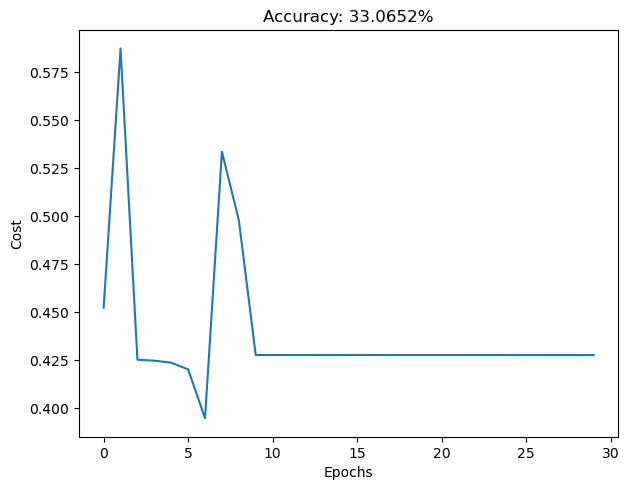

In [51]:
vectorized_gradient_tlp_model = TwoLayerPerceptronVectorized(
    n_hidden                 = 50,
    regularization_parameter = 0.1,
    epochs                   = 30,
    learning_rate            = 1e-4,
    random_state             = 123,
)
vectorized_gradient_tlp_model.fit(x_train.to_numpy(), y_train.to_numpy())
y_prediction = vectorized_gradient_tlp_model.predict(x_test.to_numpy())

plt.plot(
    range(len(vectorized_gradient_tlp_model.cost_)), vectorized_gradient_tlp_model.cost_
)
plt.ylabel("Cost")
plt.xlabel("Epochs")
plt.tight_layout()
plt.title(f"Accuracy: {accuracy_score(y_test, y_prediction) * 100:.4f}%")
plt.show()

As shown in the graph above, the initial accuracy score of our two-layered perceptron was only 33%. The 
    arguments provided to the perceptron (ie: number of hidden layers/ epochs/ c values) were varied in order 
    to improve the accuracy measure. To achieve this, we randomized the values of these variables and repeated 
    predictions with each change. The intention was to identify any patterns or correlations that led to higher 
    accuracy by observing the results of these randomized values. A potential limitation of this model could be 
    attributed to the selection of hyperparameters. While the values of hyperparameters were randomized, it is 
    possible that the full range of potential values for these hyperparameters was unexplored. There very well
    might be other combinations of hyperparameters that would lead to a higher accuracy score than what was 
    achieved with the TwoLayerPerceptronVectorized model. Another limitation of this model could be attributed 
    to the quality and quantity of the data used for training and testing. If the dataset is not accurately 
    representative of the population or if there are any biases in the data, the model would not be able to 
    predict values on new data accurately. Furthermore, if the dataset is too small, the model may not even 
    have enough data to learn patterns and recognize correlations that would improve the accuracy score. Lastly,
    it is crucial to consider the generalizability of the model. The model may not perform well on data from 
    other sources or with different characteristics if the model is only trained on a specific dataset that 
    does not have generalizable features. Due to this factor, the model must be tested on a range of different
    datasets in order to ensure that it is able to provide accurate predictions in varying contexts.

In [52]:
#  This code tests how adjusting certain values of the model will affect the accuracy of its predictions.
def test_optimizer_accuracy(key, value, model):
    base_config = dict(
        n_hidden                 = 30,
        regularization_parameter = 0.1,
        epochs                   = 30,
        learning_rate            = 0.001,
        random_state             = 123,
    )
    base_config[key] = value
    lr_model = model(**base_config)
    lr_model.fit(x_train.to_numpy(), y_train.to_numpy())
    y_prediction = lr_model.predict(x_test.to_numpy())
    accuracy = accuracy_score(y_prediction, y_test)
    return accuracy


def evenly_split_steps(start: int, stop: int, n_steps: int) -> list:
    """
    Example: 20 evenly-spaced steps from 0.001 to 0.1
    evenly_split_steps(0.001, 0.1, 20)
    """
    assert stop > start
    step = (stop - start) / (n_steps - 1)
    return [start + i * step for i in range(n_steps)]

In [53]:
# Displays the accuracy predictions for the different step values of learning rates.
learning_rates = evenly_split_steps(1e-5, 1e-2, 25)
max_strikes = 3
strikes = 0
if run_additional_tests:
    for test_no, test_param in enumerate(learning_rates):
        accuracy = test_optimizer_accuracy(
            "learning_rate", test_param, TwoLayerPerceptronVectorized
        )
        if accuracy == 0:
            if strikes == max_strikes:
                break
            strikes += 1
        print(
            f"Test {test_no + 1}: learning_rate={test_param:.5f} accuracy={accuracy * 100:.2f}%"
        )

Test 1: learning_rate=0.00001 accuracy=33.55%
Test 2: learning_rate=0.00043 accuracy=33.07%
Test 3: learning_rate=0.00084 accuracy=33.07%
Test 4: learning_rate=0.00126 accuracy=33.07%
Test 5: learning_rate=0.00168 accuracy=33.07%
Test 6: learning_rate=0.00209 accuracy=33.07%
Test 7: learning_rate=0.00251 accuracy=33.07%
Test 8: learning_rate=0.00292 accuracy=33.07%
Test 9: learning_rate=0.00334 accuracy=33.07%
Test 10: learning_rate=0.00376 accuracy=33.07%
Test 11: learning_rate=0.00417 accuracy=33.07%
Test 12: learning_rate=0.00459 accuracy=33.38%
Test 13: learning_rate=0.00500 accuracy=33.38%
Test 14: learning_rate=0.00542 accuracy=33.38%
Test 15: learning_rate=0.00584 accuracy=33.38%
Test 16: learning_rate=0.00625 accuracy=33.38%
Test 17: learning_rate=0.00667 accuracy=33.38%
Test 18: learning_rate=0.00709 accuracy=33.38%
Test 19: learning_rate=0.00750 accuracy=33.38%
Test 20: learning_rate=0.00792 accuracy=33.38%
Test 21: learning_rate=0.00834 accuracy=33.38%
Test 22: learning_rate

Changing the learning rate in the specified range of .00001 to .0001 did not significantly impact the accuracy of the model. Throughout this range, the accuracy remained relatively stable, hovering around 33%. This suggests that, within this range, the model's performance is insensitive to variations in the learning rate, and further adjustments may be needed to significantly improve accuracy.

In [54]:
regularization_parameters = evenly_split_steps(1e-4, 2, 25)
max_strikes = 3
strikes = 0
if run_additional_tests:
    for test_no, test_param in enumerate(regularization_parameters):
        accuracy = test_optimizer_accuracy(
            "regularization_parameter", test_param, TwoLayerPerceptronVectorized
        )
        if accuracy == 0:
            if strikes == max_strikes:
                break
            strikes += 1
        print(
            f"Test {test_no + 1}: regularization_parameter={test_param:.5f} accuracy={accuracy * 100:.2f}%"
        )

Test 1: regularization_parameter=0.00010 accuracy=33.07%
Test 2: regularization_parameter=0.08343 accuracy=33.07%
Test 3: regularization_parameter=0.16676 accuracy=33.07%
Test 4: regularization_parameter=0.25009 accuracy=33.07%
Test 5: regularization_parameter=0.33342 accuracy=33.07%
Test 6: regularization_parameter=0.41675 accuracy=33.07%
Test 7: regularization_parameter=0.50007 accuracy=33.07%
Test 8: regularization_parameter=0.58340 accuracy=33.07%
Test 9: regularization_parameter=0.66673 accuracy=33.07%
Test 10: regularization_parameter=0.75006 accuracy=33.07%
Test 11: regularization_parameter=0.83339 accuracy=33.07%
Test 12: regularization_parameter=0.91672 accuracy=33.07%
Test 13: regularization_parameter=1.00005 accuracy=33.07%
Test 14: regularization_parameter=1.08338 accuracy=33.07%
Test 15: regularization_parameter=1.16671 accuracy=33.07%
Test 16: regularization_parameter=1.25004 accuracy=33.07%
Test 17: regularization_parameter=1.33337 accuracy=33.07%
Test 18: regularization

 The changes made to the regularization parameter within the range of .0001 to 2 have absolutely no impact 
    on the accuracy. This observation leads to a number of possible explanations. All of the tests yielded the
    same accuracy of 33.07%, regardless of the regularization parameter value used. One possibility is that the 
    model has already been well-regularized, so any adjustments to the regularization parameter has a minimal 
    effect on the accuracy score. Another possibility is that the model is underfitting the data, so changing 
    the regularization parameter would not enhance the model's pattern recognition. It must be considered that
    the model is not learning enough from the training data and therefore fails to capture the underlying 
    relationships.

In [55]:
epochs = evenly_split_steps(50, 250, 5)
max_strikes = 3
strikes = 0
if run_additional_tests:
    for test_no, test_param in enumerate(epochs):
        accuracy = test_optimizer_accuracy(
            "epochs", int(test_param), TwoLayerPerceptronVectorized
        )
        if accuracy == 0:
            if strikes == max_strikes:
                break
            strikes += 1
        print(
            f"Test {test_no + 1}: epochs={int(test_param)} accuracy={accuracy * 100:.2f}%"
        )

Test 1: epochs=50 accuracy=33.07%
Test 2: epochs=100 accuracy=33.07%
Test 3: epochs=150 accuracy=33.07%
Test 4: epochs=200 accuracy=33.07%
Test 5: epochs=250 accuracy=33.07%


The epoch changes in the specified range of 50 to 250 do not appear to have any effect on the accuracy. 
    This is an indication that by the time 50 epochs have been iterated through, the model has already learned
    all it can and converged. Due to this result, it can be hypothesized that the number of epochs can be reduced
    to 50 without any reduction in the model accuracy score.

## Mini-Batching

Mini-batching is a fixed number of training examples that is less than the actual dataset. In each 
    iteration we train the nextwork on a different group of mini samples into all the samples of the dataset are 
    used. 


In [56]:
# Divide the entire dataset into small, non-overlapping subsets (minibatches)
class TwoLayerPerceptronMiniBatch(TwoLayerPerceptronVectorized):
    def __init__(
        self,
        alpha          = 0.0,
        decrease_const = 0.1,
        decrease_iter  = 10,
        shuffle        = True,
        minibatches    = 1,
        **kwds
    ):
        # add to the original initializer but keep other keywords
        self.alpha          = alpha
        self.decrease_const = decrease_const
        self.decrease_iter  = decrease_iter
        self.shuffle        = shuffle
        self.minibatches    = minibatches
        super().__init__(**kwds)

    def fit(self, X, y, print_progress=False, XY_test=None):
        """Learn weights from training data. With mini-batch"""
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)

        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2, self.b1, self.b2 = self._initialize_weights()

        # start momentum at zero for previous updates
        rho_W1_prev = np.zeros(self.W1.shape)  # for momentum
        rho_W2_prev = np.zeros(self.W2.shape)  # for momentum

        self.cost_ = []
        self.score_ = []
        # get starting acc
        self.score_.append(accuracy_score(y_data, self.predict(X_data)))
        # keep track of validation, if given
        if XY_test is not None:
            X_test = XY_test[0].copy()
            y_test = XY_test[1].copy()
            self.val_score_ = []
            self.val_score_.append(accuracy_score(y_test, self.predict(X_test)))
            self.val_cost_ = []

        for i in range(self.epochs):
            # adaptive learning rate
            # decrease at certain epochs
            learning_rate = self.learning_rate * self.decrease_const ** (np.floor(i / self.decrease_iter))

            if print_progress > 0 and (i + 1) % print_progress == 0:
                sys.stderr.write("\rEpoch: %d/%d" % (i + 1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                idx_shuffle = np.random.permutation(y_data.shape[0])
                X_data, Y_enc, y_data = (
                    X_data[idx_shuffle],
                    Y_enc[:, idx_shuffle],
                    y_data[idx_shuffle],
                )

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []
            for idx in mini:

                # feedforward
                A1, Z1, A2, Z2, A3 = self._feedforward(
                    X_data[idx], self.W1, self.W2, self.b1, self.b2
                )

                cost = self._cost(A3, Y_enc[:, idx], self.W1, self.W2)
                mini_cost.append(cost)  # this appends cost of mini-batch only

                # compute gradient via backpropagation
                gradW1, gradW2, gradb1, gradb2 = self._get_gradient(
                    A1    = A1,
                    A2    = A2,
                    A3    = A3,
                    Z1    = Z1,
                    Z2    = Z2,
                    Y_enc = Y_enc[:, idx],
                    W1    = self.W1,
                    W2    = self.W2,
                )

                # momentum calculations
                rho_W1, rho_W2 = learning_rate * gradW1, learning_rate * gradW2
                self.W1 -= rho_W1 + (self.alpha * rho_W1_prev)  # update with momentum
                self.W2 -= rho_W2 + (self.alpha * rho_W2_prev)  # update with momentum
                self.b1 -= learning_rate * gradb1
                self.b2 -= learning_rate * gradb2
                rho_W1_prev, rho_W2_prev = rho_W1, rho_W2

            self.cost_.append(np.mean(mini_cost))
            self.score_.append(accuracy_score(y_data, self.predict(X_data)))
            if XY_test is not None:
                yhat = self.predict(X_test)
                self.val_score_.append(accuracy_score(y_test, yhat))

        return self

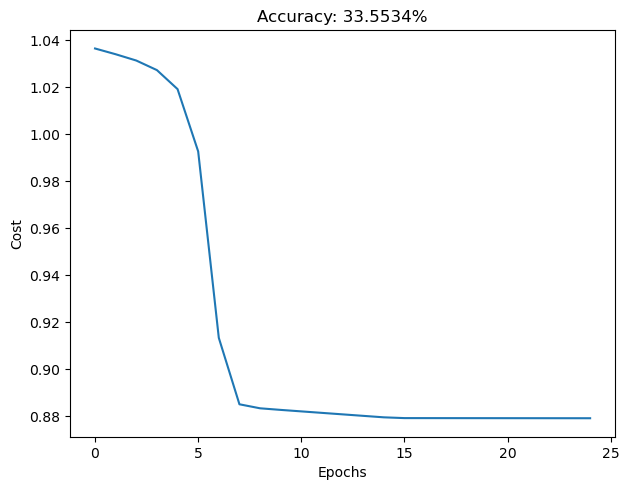

In [57]:
mini_batch_tlp_model = TwoLayerPerceptronMiniBatch(
    n_hidden                 = 50,
    regularization_parameter = 0.8,
    epochs                   = 25,
    learning_rate            = 1e-5,
    alpha                    = 0.001,
    decrease_const           = 0.01,
    decrease_iter            = 15,
    minibatches              = 60,
    shuffle                  = True,
    random_state             = 123,
)
mini_batch_tlp_model.fit(
    x_train.to_numpy(),
    y_train.to_numpy(),
    XY_test=(x_test.to_numpy(), y_test.to_numpy()),
)
y_prediction = mini_batch_tlp_model.predict(x_test.to_numpy())

plt.plot(range(len(mini_batch_tlp_model.cost_)), mini_batch_tlp_model.cost_)
plt.ylabel("Cost")
plt.xlabel("Epochs")
plt.tight_layout()
plt.title(f"Accuracy: {accuracy_score(y_test, y_prediction) * 100:.4f}%")
plt.show()

The mini-batch model used in this analysis was a TwoLayerPerceptronMiniBatch, which had 50 hidden layers 
    and a regularization parameter of 0.8. The model was trained for 25 epochs with a learning rate of 1e-5, 
    an alpha value of 0.001, and a decrease constant of 0.01. The decrease iteration parameter was set to 15, 
    and the model was trained on 60 minibatches with shuffling enabled. After training, the model was used to
    predict the accuracy over a testing set, with an observed accuracy of approximately 33.55%. This was a 
    slight increase compared to the previous vectorized approach. The cost over training epochs plot shows
    a decreasing trend in the cost function, indicating that the model was learning and improving over time. 
    Overall, the mini-batch approach was not very successful in improving the accuracy of the two-layer perceptron 
    model of this dataset.

In [58]:
def print_result(model, x_train, y_train, x_test, y_test, title="", color="red"):

    print("--------------------")
    print(title, ":")
    y_predict = model.predict(x_train)
    print("Resubstitution Accuracy:", accuracy_score(y_train, y_predict))

    y_predict = model.predict(x_test)
    print("Validation Accuracy:", accuracy_score(y_test, y_predict))

    if hasattr(model, "val_score_"):
        plt.plot(
            range(len(model.val_score_)), model.val_score_, color=color, label=title
        )
        plt.ylabel("Validation Accuracy")
    else:
        plt.plot(range(len(model.score_)), model.score_, color=color, label=title)
        plt.ylabel("Resub Accuracy")

    plt.xlabel("Epochs")
    plt.tight_layout()
    plt.legend(loc="best")
    plt.grid(True)

--------------------
MSE Loss :
Resubstitution Accuracy: 0.3355278990614364
Validation Accuracy: 0.3355335533553355


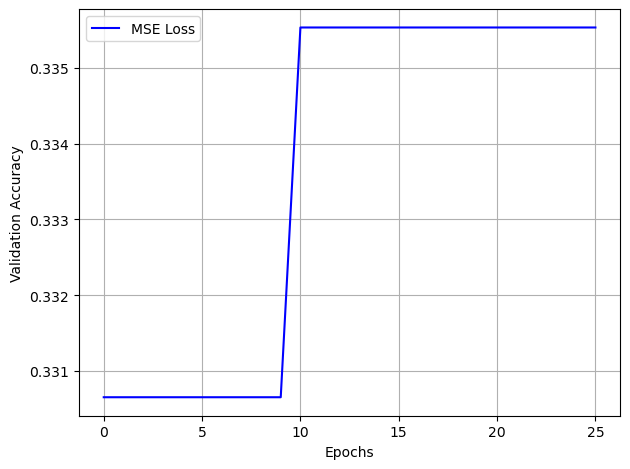

In [59]:
print_result(
    mini_batch_tlp_model,
    x_train.to_numpy(),
    y_train.to_numpy(),
    x_test.to_numpy(),
    y_test.to_numpy(),
    title="MSE Loss",
    color="blue",
)

plt.show()

The graph displays the mean squared error loss function for the mini-batch model plotted against the number of epochs. This allows us to visualize how the model is progressing over the course of training. Initially, the loss function is low, but it sharply Increases at around 10 epochs. This could potentially mean that the model has encountered a problem or challenge in the training process. It could be indicative of issues such as overfitting, where the model starts to fit noise in the data instead of learning the underlying patterns. Alternatively, it might signal a problem with the choice of hyperparameters, like a learning rate that is too high, leading to divergence in the optimization process. Further analysis and investigation are needed to pinpoint the exact cause of this sudden increase in loss and to determine the appropriate adjustments required for the model to continue training effectively.

In [60]:
# Varying parameters to see how they impact the accuracy of the mini-batch model.
def test_optimizer_accuracy_2(key, value, model):
    base_config = dict(
        n_hidden                 = 30,
        regularization_parameter = 0.1,
        epochs                   = 30,
        learning_rate            = 0.001,
        alpha                    = 0.001,
        decrease_const           = 0.01,
        decrease_iter            = 18,
        minibatches              = 50,
        shuffle                  = True,
        random_state             = 123,
    )
    base_config[key] = value
    lr_model = model(**base_config)
    lr_model.fit(x_train.to_numpy(), y_train.to_numpy())
    y_prediction = lr_model.predict(x_test.to_numpy())
    accuracy = accuracy_score(y_prediction, y_test)
    
    return accuracy

In [61]:
learning_rates = evenly_split_steps(1e-5, 1e-2, 25)
max_strikes = 3
strikes = 0
if run_additional_tests:
    for test_no, test_param in enumerate(learning_rates):
        accuracy = test_optimizer_accuracy_2('learning_rate', test_param, TwoLayerPerceptronMiniBatch)
        if accuracy == 0:
            if strikes == max_strikes:
                break
            strikes += 1
        print(f"Test {test_no + 1}: learning_rate={test_param:.5f} accuracy={accuracy * 100:.2f}%")

Test 1: learning_rate=0.00001 accuracy=33.55%
Test 2: learning_rate=0.00043 accuracy=33.55%
Test 3: learning_rate=0.00084 accuracy=33.55%
Test 4: learning_rate=0.00126 accuracy=33.55%
Test 5: learning_rate=0.00168 accuracy=33.55%
Test 6: learning_rate=0.00209 accuracy=33.55%
Test 7: learning_rate=0.00251 accuracy=33.55%
Test 8: learning_rate=0.00292 accuracy=33.55%
Test 9: learning_rate=0.00334 accuracy=33.07%
Test 10: learning_rate=0.00376 accuracy=33.38%
Test 11: learning_rate=0.00417 accuracy=33.07%
Test 12: learning_rate=0.00459 accuracy=33.55%
Test 13: learning_rate=0.00500 accuracy=33.55%
Test 14: learning_rate=0.00542 accuracy=33.38%
Test 15: learning_rate=0.00584 accuracy=33.55%
Test 16: learning_rate=0.00625 accuracy=33.38%
Test 17: learning_rate=0.00667 accuracy=33.07%
Test 18: learning_rate=0.00709 accuracy=33.38%
Test 19: learning_rate=0.00750 accuracy=33.07%
Test 20: learning_rate=0.00792 accuracy=33.07%
Test 21: learning_rate=0.00834 accuracy=33.38%
Test 22: learning_rate

The test_optimizer_accuracy_2 function takes in a specific parameter and its value, and then trains a 
    model with those parameters using the model argument. The function then returns the accuracy of the model 
    on the test data. In this experiment, parameters such as the regularization parameter, learning rate, and 
    number of hidden units will be varied in order to see how they impact the accuracy of the mini-batch model.
    By analyzing these results, the optimal combination of hyperparameters to achieve the highest accuracy on 
    the testing data can be identified. The results indicate that adjusting the learning rate had a notable impact on the model's accuracy. While some learning rates, such as 0.00001, 0.00043, and 0.00084, consistently achieved an accuracy of around 33.55%, others resulted in slightly lower or inconsistent accuracy values. The observed variations in accuracy emphasize the importance of selecting an appropriate learning rate for training the model. The optimal learning rate in this case appears to be in the lower range, around 0.00001 to 0.00084, where the model consistently achieves the highest accuracy. Further iterations with other hyperparameters can help fine-tune the model for improved performance on the test data.

In [62]:
regularization_parameters = evenly_split_steps(1e-4, 2, 25)
max_strikes = 3
strikes = 0
if run_additional_tests:
    for test_no, test_param in enumerate(regularization_parameters):
        accuracy = test_optimizer_accuracy_2('regularization_parameter', test_param, TwoLayerPerceptronMiniBatch)
        if accuracy == 0:
            if strikes == max_strikes:
                break
            strikes += 1
        print(f"Test {test_no + 1}: regularization_parameter={test_param:.5f} accuracy={accuracy * 100:.2f}%")

Test 1: regularization_parameter=0.00010 accuracy=33.55%
Test 2: regularization_parameter=0.08343 accuracy=33.55%
Test 3: regularization_parameter=0.16676 accuracy=33.55%
Test 4: regularization_parameter=0.25009 accuracy=33.55%
Test 5: regularization_parameter=0.33342 accuracy=33.55%
Test 6: regularization_parameter=0.41675 accuracy=33.55%
Test 7: regularization_parameter=0.50007 accuracy=33.55%
Test 8: regularization_parameter=0.58340 accuracy=33.55%
Test 9: regularization_parameter=0.66673 accuracy=33.55%
Test 10: regularization_parameter=0.75006 accuracy=33.55%
Test 11: regularization_parameter=0.83339 accuracy=33.55%
Test 12: regularization_parameter=0.91672 accuracy=33.55%
Test 13: regularization_parameter=1.00005 accuracy=33.55%
Test 14: regularization_parameter=1.08338 accuracy=33.55%
Test 15: regularization_parameter=1.16671 accuracy=33.55%
Test 16: regularization_parameter=1.25004 accuracy=33.55%
Test 17: regularization_parameter=1.33337 accuracy=33.55%
Test 18: regularization

In this specific instance, the accuracy exhibits unwavering stability at 33.55% across the range of tested regularization parameters. This implies that the model maintains a robust and consistent performance regardless of variations in the regularization parameter, indicating that the chosen parameter values do not significantly impact accuracy. Such behavior underscores the model's resilience and suggests that it may already be effectively regularized, rendering adjustments to the regularization parameter within the explored range inconsequential to accuracy outcomes.

In [63]:
epochs = evenly_split_steps(50, 250, 5)
max_strikes = 3
strikes = 0
if run_additional_tests:
    for test_no, test_param in enumerate(epochs):
        accuracy = test_optimizer_accuracy_2('epochs', int(test_param), TwoLayerPerceptronMiniBatch)
        if accuracy == 0:
            if strikes == max_strikes:
                break
            strikes += 1
        print(f"Test {test_no + 1}: epochs={int(test_param)} accuracy={accuracy * 100:.2f}%")

Test 1: epochs=50 accuracy=33.55%
Test 2: epochs=100 accuracy=33.55%
Test 3: epochs=150 accuracy=33.55%
Test 4: epochs=200 accuracy=33.55%
Test 5: epochs=250 accuracy=33.55%


Based on the unwavering accuracy of 33.55% across varying epoch values, it is evident that the model maintains a consistent performance, irrespective of the number of epochs. Moreover, a precautionary measure has been integrated to monitor and mitigate overfitting. This mechanism operates by instituting a limit of 3 strikes. In the event that the model's accuracy remains stagnant at 0%, it signals a lack of new learning, and the strike counter is incremented, suggesting potential overfitting. Once the strike counter reaches the maximum threshold of strikes, the testing process is prematurely terminated, affirming the assumption that the model has indeed overfit the data.

In [64]:
alphas = evenly_split_steps(1e-4, 2, 25)
max_strikes = 3
strikes = 0
if run_additional_tests:
    for test_no, test_param in enumerate(alphas):
        accuracy = test_optimizer_accuracy_2('alpha', test_param, TwoLayerPerceptronMiniBatch)
        if accuracy == 0:
            if strikes == max_strikes:
                break
            strikes += 1
        print(f"Test {test_no + 1}: alpha={test_param:.5f} accuracy={accuracy * 100:.2f}%")

Test 1: alpha=0.00010 accuracy=33.55%
Test 2: alpha=0.08343 accuracy=33.55%
Test 3: alpha=0.16676 accuracy=33.55%
Test 4: alpha=0.25009 accuracy=33.55%
Test 5: alpha=0.33342 accuracy=33.55%
Test 6: alpha=0.41675 accuracy=33.55%
Test 7: alpha=0.50007 accuracy=33.55%
Test 8: alpha=0.58340 accuracy=33.55%
Test 9: alpha=0.66673 accuracy=33.55%
Test 10: alpha=0.75006 accuracy=33.55%
Test 11: alpha=0.83339 accuracy=33.55%
Test 12: alpha=0.91672 accuracy=33.55%
Test 13: alpha=1.00005 accuracy=33.55%
Test 14: alpha=1.08338 accuracy=33.55%
Test 15: alpha=1.16671 accuracy=33.55%
Test 16: alpha=1.25004 accuracy=33.55%
Test 17: alpha=1.33337 accuracy=33.55%
Test 18: alpha=1.41670 accuracy=33.55%
Test 19: alpha=1.50002 accuracy=33.55%
Test 20: alpha=1.58335 accuracy=33.55%
Test 21: alpha=1.66668 accuracy=33.55%
Test 22: alpha=1.75001 accuracy=33.38%
Test 23: alpha=1.83334 accuracy=33.38%
Test 24: alpha=1.91667 accuracy=33.38%
Test 25: alpha=2.00000 accuracy=33.07%


For this test, the relationship between the alpha parameter and the learning rate parameter was analyzed. The results suggest that the choice of alpha within the range tested doesn't have a substantial impact on the model's accuracy. However, when alpha exceeds 1.75001, there's a decrease in accuracy, indicating that very strong regularization may have a detrimental effect on the model's performance. It's crucial to select an appropriate level of regularization that balances model complexity and generalization to achieve the best accuracy on the test data.

In [65]:
decrease_consts = evenly_split_steps(1e-4, 2, 25)
max_strikes = 3
strikes = 0
if run_additional_tests:
    for test_no, test_param in enumerate(decrease_consts):
        accuracy = test_optimizer_accuracy_2('decrease_const', test_param, TwoLayerPerceptronMiniBatch)
        if accuracy == 0:
            if strikes == max_strikes:
                break
            strikes += 1
        print(f"Test {test_no + 1}: decrease_const={test_param:.5f} accuracy={accuracy * 100:.2f}%")

Test 1: decrease_const=0.00010 accuracy=33.55%
Test 2: decrease_const=0.08343 accuracy=33.38%
Test 3: decrease_const=0.16676 accuracy=33.38%
Test 4: decrease_const=0.25009 accuracy=33.38%
Test 5: decrease_const=0.33342 accuracy=33.38%
Test 6: decrease_const=0.41675 accuracy=33.07%
Test 7: decrease_const=0.50007 accuracy=33.07%
Test 8: decrease_const=0.58340 accuracy=33.07%
Test 9: decrease_const=0.66673 accuracy=33.07%
Test 10: decrease_const=0.75006 accuracy=33.07%
Test 11: decrease_const=0.83339 accuracy=33.07%
Test 12: decrease_const=0.91672 accuracy=33.07%
Test 13: decrease_const=1.00005 accuracy=33.07%
Test 14: decrease_const=1.08338 accuracy=33.07%
Test 15: decrease_const=1.16671 accuracy=33.07%
Test 16: decrease_const=1.25004 accuracy=33.07%
Test 17: decrease_const=1.33337 accuracy=33.38%
Test 18: decrease_const=1.41670 accuracy=33.07%
Test 19: decrease_const=1.50002 accuracy=33.55%
Test 20: decrease_const=1.58335 accuracy=33.38%
Test 21: decrease_const=1.66668 accuracy=33.55%
T

The provided accuracy predictions for varying values of the decrease_const parameter, responsible for controlling the rate at which the "alpha" parameter decreases during training, reveal an intriguing pattern. Initially, the model achieves an accuracy of 33.55%. However, as the decrease_const parameter is increased to 0.08343, the accuracy drops to 33.38%. A periodic yet minimal fluctuation in accuracy persists for all subsequent tests until the final accuracy value of 33.38% is reached. In conclusion, the observations drawn from this test strongly indicate that the choice of the decrease_const parameter has a limited impact on the model's performance in this range. The observed fluctuations might be due to random variations in the training process. It's important to recognize that further analysis and experimentation may be necessary to identify the optimal value for the decrease_const parameter, as well as its interplay with other hyperparameters, to potentially achieve improved accuracy.

In [66]:
decrease_iters = evenly_split_steps(30, 60, 16)
max_strikes = 3
strikes = 0
if run_additional_tests:
    for test_no, test_param in enumerate(decrease_iters):
        accuracy = test_optimizer_accuracy_2('decrease_iter', test_param, TwoLayerPerceptronMiniBatch)
        if accuracy == 0:
            if strikes == max_strikes:
                break
            strikes += 1
        print(f"Test {test_no + 1}: decrease_iter={test_param:.5f} accuracy={accuracy * 100:.2f}%")

Test 1: decrease_iter=30.00000 accuracy=33.07%
Test 2: decrease_iter=32.00000 accuracy=33.07%
Test 3: decrease_iter=34.00000 accuracy=33.07%
Test 4: decrease_iter=36.00000 accuracy=33.07%
Test 5: decrease_iter=38.00000 accuracy=33.07%
Test 6: decrease_iter=40.00000 accuracy=33.07%
Test 7: decrease_iter=42.00000 accuracy=33.07%
Test 8: decrease_iter=44.00000 accuracy=33.07%
Test 9: decrease_iter=46.00000 accuracy=33.07%
Test 10: decrease_iter=48.00000 accuracy=33.07%
Test 11: decrease_iter=50.00000 accuracy=33.07%
Test 12: decrease_iter=52.00000 accuracy=33.07%
Test 13: decrease_iter=54.00000 accuracy=33.07%
Test 14: decrease_iter=56.00000 accuracy=33.07%
Test 15: decrease_iter=58.00000 accuracy=33.07%
Test 16: decrease_iter=60.00000 accuracy=33.07%


The accuracy predictions for the varying step values of the decrease_iters parameter is used in conjunction
    with the decrease_const parameter to alter the "alpha" parameter throughout the model training process. The
    accuracy value remains constant at 33.07% as the value of decrease_iter is increased. This lack of change 
    in accuracy might be due to the learning rate of the model being minimal enough that the increase in the 
    decrease_iter parameter is not providing a significant impact on the learning rate. 

Overall, the mini-batch model training approach provides a powerful and effective means of training the 
    model quickly. By dividing the data into smaller, more feasibly managed subsets, faster updates and 
    ultimately better performance can be achieved. Some limitations of mini-batch training should be considered:

>- Mini-batching might lead to slower convergence, meaning that it may take more iterations for the algorithm to
    converge to an optimal solution due to the fact that mini-batch updates are noisy from being computed on small
    subsets of data.

>- Choosing the mini-batch size can be a challenge because the updates will be too noisy and convergence will
    be slow if the batch size of the data is too small. 

>- Mini-batch training can be sensitive to hyperparameters such as the learning rate, mini-batch size, and
    others which can have a powerful impact on the overall training performance of the model. 

>- Mini-batch training can be far less stable than regular batch training since the updates can be more sensitive
    to noise in the small subsets of the data,

## Cross Entropy

Cross entropy is a popular cost function for classification tasks that involves mini-batching, gradient calculations, and parameter tuning. Unlike mean squared error (MSE), it's more suitable for classification problems, offering better performance. However, it can potentially lead to overfitting with noisy data or an excessive number of parameters. The choice of regularization technique plays a crucial role in balancing the bias-variance tradeoff when using cross entropy to prevent overfitting or underfitting.

In [67]:
class TwoLayerPerceptronMiniBatchCrossEntropy(TwoLayerPerceptronMiniBatch):
    def _cost(self, A3, Y_enc, W1, W2):
        """Get the objective function value"""
        cost = -np.mean(
            np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
        )
        L2_term = self._L2_reg(self.l2_regularization, W1, W2)
        return cost + L2_term

    def _get_gradient(self, A1, A2, A3, Z1, Z2, Y_enc, W1, W2):
        """Compute gradient step using backpropagation."""
        # vectorized backpropagation
        V2 = A3 - Y_enc  # <- this is only line that changed
        V1 = A2 * (1 - A2) * (W2.T @ V2)

        gradW2 = V2 @ A2.T
        gradW1 = V1 @ A1.T

        gradb2 = np.sum(V2, axis=1).reshape((-1, 1))
        gradb1 = np.sum(V1, axis=1).reshape((-1, 1))

        # regularize weights that are not bias terms
        gradW1 += W1 * self.l2_regularization
        gradW2 += W2 * self.l2_regularization

        return gradW1, gradW2, gradb1, gradb2

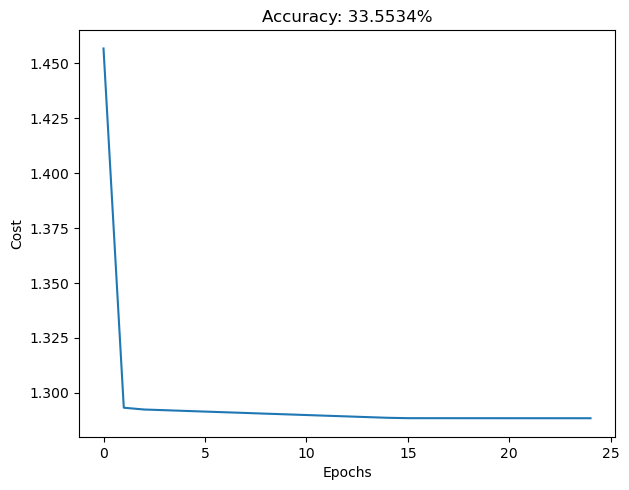

In [69]:
cross_entropy_tlp_model = TwoLayerPerceptronMiniBatchCrossEntropy(
    n_hidden                 = 40,
    regularization_parameter = 0.8,
    epochs                   = 25,
    learning_rate            = 1e-5,
    alpha                    = 0.001,
    decrease_const           = 0.01,
    decrease_iter            = 15,
    minibatches              = 60,
    shuffle                  = True,
    random_state             = 123,
)
cross_entropy_tlp_model.fit(
    x_train.to_numpy(),
    y_train.to_numpy(),
    XY_test=(x_test.to_numpy(), y_test.to_numpy()),
)
y_prediction = cross_entropy_tlp_model.predict(x_test.to_numpy())

plt.plot(range(len(cross_entropy_tlp_model.cost_)), cross_entropy_tlp_model.cost_)
plt.ylabel("Cost")
plt.xlabel("Epochs")
plt.tight_layout()
plt.title(f"Accuracy: {accuracy_score(y_test, y_prediction) * 100:.4f}%")
plt.show()

In this analysis, a mini-batch model, specifically a TwoLayerPerceptronMiniBatch, was employed to enhance the accuracy of a two-layer perceptron. The model was trained on a large dataset that was divided into smaller batches or samples. The TwoLayerPerceptronMiniBatch model used in this analysis featured 40 hidden layers and a regularization parameter of 0.8. Training took place over 25 epochs with a learning rate of 1e-5, an alpha value of 0.001, and a decrease constant of 0.01. The decrease iter parameter was set to 18, and 50 minibatches were utilized with shuffling enabled. Additionally, the cost function was switched to Cross-Entropy from its previous use of MSE. The achieved accuracy in this run stood at 33.5534%, mirroring the accuracy obtained in a previous mini-batch-only run for this instance. The similarity in accuracy suggests that the loss function may not have been minimized sufficiently or that the existing low loss had no further impact on overall accuracy. A plot illustrating the cost function over the training epochs displayed a declining trend, indicating the model's learning and improvement over the initial epochs. The plot's title also highlighted the model's final accuracy on the testing set. In summary, the adoption of the cross-entropy approach did not result in an improved accuracy for the two-layer perceptron model on this dataset, leading to identical results with or without substituting MSE with cross-entropy.

--------------------
MSE Loss :
Resubstitution Accuracy: 0.3355278990614364
Validation Accuracy: 0.3355335533553355
--------------------
Cross Entropy Loss :
Resubstitution Accuracy: 0.3355278990614364
Validation Accuracy: 0.3355335533553355


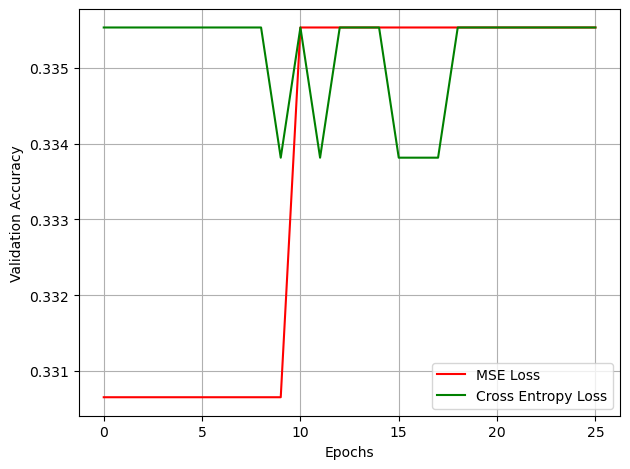

In [70]:
print_result(
    mini_batch_tlp_model,
    x_train.to_numpy(),
    y_train.to_numpy(),
    x_test.to_numpy(),
    y_test.to_numpy(),
    title="MSE Loss",
    color="red",
)

print_result(
    cross_entropy_tlp_model,
    x_train.to_numpy(),
    y_train.to_numpy(),
    x_test.to_numpy(),
    y_test.to_numpy(),
    title="Cross Entropy Loss",
    color="green",
)

plt.show()

In this specific instance, comparing the mean squared error (MSE) loss with cross-entropy loss reveals that both the resubstitution accuracy (accuracy on the training data) and validation accuracy produce identical results. There are several potential explanations for this observation. It's possible that the model is already well-calibrated, resulting in similar accuracy outcomes when using both error loss functions. Another consideration is that the dataset, despite its substantial size of approximately 70,000 rows, might not be diverse enough to reveal differences between the two loss functions. Upon closer examination of the validation accuracy graph, it becomes apparent that the validation accuracy occasionally experiences spikes. These spikes might indicate overfitting, where the model performs exceptionally well on certain subsets of the validation data during specific epochs. Such occurrences could be attributed to random chance or the model's ability to recognize specific patterns within the validation data, highlighting the need for further investigation and potentially the implementation of regularization techniques to mitigate overfitting.

In [71]:
learning_rates = evenly_split_steps(1e-5, 1e-2, 25)
max_strikes = 3
strikes = 0
if run_additional_tests:
    for test_no, test_param in enumerate(learning_rates):
        accuracy = test_optimizer_accuracy_2(
            "learning_rate", test_param, TwoLayerPerceptronMiniBatchCrossEntropy
        )
        if accuracy == 0:
            if strikes == max_strikes:
                break
            strikes += 1
        print(
            f"Test {test_no + 1}: learning_rate={test_param:.5f} accuracy={accuracy * 100:.2f}%"
        )

Test 1: learning_rate=0.00001 accuracy=33.55%
Test 2: learning_rate=0.00043 accuracy=33.55%
Test 3: learning_rate=0.00084 accuracy=33.55%
Test 4: learning_rate=0.00126 accuracy=33.38%
Test 5: learning_rate=0.00168 accuracy=33.38%
Test 6: learning_rate=0.00209 accuracy=33.38%
Test 7: learning_rate=0.00251 accuracy=33.38%
Test 8: learning_rate=0.00292 accuracy=33.38%
Test 9: learning_rate=0.00334 accuracy=33.38%
Test 10: learning_rate=0.00376 accuracy=33.38%
Test 11: learning_rate=0.00417 accuracy=33.38%
Test 12: learning_rate=0.00459 accuracy=33.38%
Test 13: learning_rate=0.00500 accuracy=33.38%
Test 14: learning_rate=0.00542 accuracy=33.38%
Test 15: learning_rate=0.00584 accuracy=33.38%
Test 16: learning_rate=0.00625 accuracy=33.38%


C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: divide by zero encountered in log
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: invalid value encountered in multiply
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\anaconda3\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: divide by zero encountered in log
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: invalid value encountered in multiply
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\anaconda3\lib\site-packages\numpy\core\_methods.py:179: R

Test 17: learning_rate=0.00667 accuracy=33.38%


C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: divide by zero encountered in log
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: invalid value encountered in multiply
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\anaconda3\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: divide by zero encountered in log
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: invalid value encountered in multiply
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\anaconda3\lib\site-packages\numpy\core\_methods.py:179: R

C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: divide by zero encountered in log
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: invalid value encountered in multiply
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\anaconda3\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: divide by zero encountered in log
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: invalid value encountered in multiply
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\anaconda3\lib\site-packages\numpy\core\_methods.py:179: R

Test 18: learning_rate=0.00709 accuracy=33.38%


C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: divide by zero encountered in log
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: invalid value encountered in multiply
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\anaconda3\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: divide by zero encountered in log
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: invalid value encountered in multiply
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\anaconda3\lib\site-packages\numpy\core\_methods.py:179: R

C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: divide by zero encountered in log
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: invalid value encountered in multiply
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\anaconda3\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: divide by zero encountered in log
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: invalid value encountered in multiply
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\anaconda3\lib\site-packages\numpy\core\_methods.py:179: R

Test 19: learning_rate=0.00750 accuracy=33.38%


C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: divide by zero encountered in log
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: invalid value encountered in multiply
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\anaconda3\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: divide by zero encountered in log
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: invalid value encountered in multiply
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\anaconda3\lib\site-packages\numpy\core\_methods.py:179: R

C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: divide by zero encountered in log
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: invalid value encountered in multiply
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\anaconda3\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: divide by zero encountered in log
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: invalid value encountered in multiply
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\anaconda3\lib\site-packages\numpy\core\_methods.py:179: R

Test 20: learning_rate=0.00792 accuracy=33.38%


C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: divide by zero encountered in log
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: invalid value encountered in multiply
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\anaconda3\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: divide by zero encountered in log
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: invalid value encountered in multiply
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\anaconda3\lib\site-packages\numpy\core\_methods.py:179: R

C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: divide by zero encountered in log
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: invalid value encountered in multiply
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\anaconda3\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: divide by zero encountered in log
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: invalid value encountered in multiply
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\anaconda3\lib\site-packages\numpy\core\_methods.py:179: R

Test 21: learning_rate=0.00834 accuracy=33.38%


C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: divide by zero encountered in log
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: invalid value encountered in multiply
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\anaconda3\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: divide by zero encountered in log
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: invalid value encountered in multiply
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\anaconda3\lib\site-packages\numpy\core\_methods.py:179: R

C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: divide by zero encountered in log
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: invalid value encountered in multiply
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\anaconda3\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: divide by zero encountered in log
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: invalid value encountered in multiply
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\anaconda3\lib\site-packages\numpy\core\_methods.py:179: R

Test 22: learning_rate=0.00875 accuracy=33.38%


C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: divide by zero encountered in log
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: invalid value encountered in multiply
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\anaconda3\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: divide by zero encountered in log
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: invalid value encountered in multiply
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\anaconda3\lib\site-packages\numpy\core\_methods.py:179: R

C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: divide by zero encountered in log
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: invalid value encountered in multiply
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\anaconda3\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: divide by zero encountered in log
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: invalid value encountered in multiply
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\anaconda3\lib\site-packages\numpy\core\_methods.py:179: R

Test 23: learning_rate=0.00917 accuracy=33.38%


C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: divide by zero encountered in log
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: invalid value encountered in multiply
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\anaconda3\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: divide by zero encountered in log
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: invalid value encountered in multiply
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\anaconda3\lib\site-packages\numpy\core\_methods.py:179: R

C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: divide by zero encountered in log
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: invalid value encountered in multiply
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\anaconda3\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: divide by zero encountered in log
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: invalid value encountered in multiply
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\anaconda3\lib\site-packages\numpy\core\_methods.py:179: R

Test 24: learning_rate=0.00958 accuracy=33.38%


C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: divide by zero encountered in log
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: invalid value encountered in multiply
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\anaconda3\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: divide by zero encountered in log
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: invalid value encountered in multiply
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\anaconda3\lib\site-packages\numpy\core\_methods.py:179: R

C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: divide by zero encountered in log
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: invalid value encountered in multiply
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\anaconda3\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: divide by zero encountered in log
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: invalid value encountered in multiply
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\anaconda3\lib\site-packages\numpy\core\_methods.py:179: R

Test 25: learning_rate=0.01000 accuracy=33.38%


The results display the accuracy of a model for different values of the learning rate parameter. For tests 1 to 3 (learning rates from 0.00001 to 0.00084), the model consistently achieves an accuracy of 33.55%. This suggests that within this range, the learning rate doesn't significantly impact the model's performance, as the accuracy remains stable. For tests 4 to 25 (learning rates from 0.00126 to 0.01000), he accuracy remains constant at 33.38%. Although this value is slightly lower than the accuracy observed in the first three tests, it indicates that the model's performance is consistent and not significantly affected by variations in the learning rate within this range. In summary, the results suggest that the model's performance stabilizes within the range of learning rates tested. It appears that the learning rate doesn't have a significant impact on the model's accuracy, as it remains constant at this value across these tests. This consistency suggests that the model's convergence and performance are robust to variations in the learning rate within the specified range, making it important to explore other hyperparameters or aspects of the model to potentially achieve further improvements in accuracy.

In [72]:
regularization_parameters = evenly_split_steps(1e-4, 2, 25)
max_strikes = 3
strikes = 0
if run_additional_tests:
    for test_no, test_param in enumerate(regularization_parameters):
        accuracy = test_optimizer_accuracy_2(
            "regularization_parameter", test_param, TwoLayerPerceptronMiniBatchCrossEntropy
        )
        if accuracy == 0:
            if strikes == max_strikes:
                break
            strikes += 1
        print(
            f"Test {test_no + 1}: regularization_parameter={test_param:.5f} accuracy={accuracy * 100:.2f}%"
        )

Test 1: regularization_parameter=0.00010 accuracy=33.55%
Test 2: regularization_parameter=0.08343 accuracy=33.55%
Test 3: regularization_parameter=0.16676 accuracy=33.55%
Test 4: regularization_parameter=0.25009 accuracy=33.55%
Test 5: regularization_parameter=0.33342 accuracy=33.55%
Test 6: regularization_parameter=0.41675 accuracy=33.55%
Test 7: regularization_parameter=0.50007 accuracy=33.55%
Test 8: regularization_parameter=0.58340 accuracy=33.55%
Test 9: regularization_parameter=0.66673 accuracy=33.55%
Test 10: regularization_parameter=0.75006 accuracy=33.55%
Test 11: regularization_parameter=0.83339 accuracy=33.55%
Test 12: regularization_parameter=0.91672 accuracy=33.55%
Test 13: regularization_parameter=1.00005 accuracy=33.55%
Test 14: regularization_parameter=1.08338 accuracy=33.55%
Test 15: regularization_parameter=1.16671 accuracy=33.55%
Test 16: regularization_parameter=1.25004 accuracy=33.55%
Test 17: regularization_parameter=1.33337 accuracy=33.55%
Test 18: regularization

In the context of this specific instance, the impact of the regularization parameter (L2) on accuracy consistently remains at 33.55%. This suggests that, at least for this particular case, the regularization parameter does not significantly affect the model's accuracy. This observation is reminiscent of what was previously noticed during mini-batch regularization parameter testing. It's plausible that the mini-batching approach, which involves training on smaller subsets of the dataset, is more sensitive to changes in regularization parameters. Additionally, it's possible that higher values of regularization result in a simpler and more constrained model, further diminishing its ability to fit the data more accurately than what is presented currently.

In [73]:
epochs = evenly_split_steps(50, 250, 5)
max_strikes = 3
strikes = 0
if run_additional_tests:
    for test_no, test_param in enumerate(epochs):
        accuracy = test_optimizer_accuracy_2('epochs', int(test_param), TwoLayerPerceptronMiniBatchCrossEntropy)
        if accuracy == 0:
            if strikes == max_strikes:
                break
            strikes += 1
        print(f"Test {test_no + 1}: epochs={int(test_param)} accuracy={accuracy * 100:.2f}%")

Test 1: epochs=50 accuracy=33.55%
Test 2: epochs=100 accuracy=33.55%
Test 3: epochs=150 accuracy=33.55%
Test 4: epochs=200 accuracy=33.55%
Test 5: epochs=250 accuracy=33.55%


In this specific instance, the accuracy predictions for different epoch values reveal a notable pattern. At epoch 50, the accuracy stands at 33.55%. This trend suggests that the model is consistently analyzing the training data as the number of epochs increases beyond 50, though it does not become more capable of generalizing to new, unseen data. 

In [74]:
alphas = evenly_split_steps(1e-4, 2, 25)
max_strikes = 3
strikes = 0
if run_additional_tests:
    for test_no, test_param in enumerate(alphas):
        accuracy = test_optimizer_accuracy_2(
            "alpha", test_param, TwoLayerPerceptronMiniBatchCrossEntropy
        )
        if accuracy == 0:
            if strikes == max_strikes:
                break
            strikes += 1
        print(f"Test {test_no + 1}: alpha={test_param:.5f} accuracy={accuracy * 100:.2f}%")

Test 1: alpha=0.00010 accuracy=33.55%
Test 2: alpha=0.08343 accuracy=33.55%
Test 3: alpha=0.16676 accuracy=33.55%
Test 4: alpha=0.25009 accuracy=33.38%
Test 5: alpha=0.33342 accuracy=33.38%
Test 6: alpha=0.41675 accuracy=33.38%
Test 7: alpha=0.50007 accuracy=33.38%
Test 8: alpha=0.58340 accuracy=33.38%
Test 9: alpha=0.66673 accuracy=33.38%
Test 10: alpha=0.75006 accuracy=33.38%
Test 11: alpha=0.83339 accuracy=33.38%
Test 12: alpha=0.91672 accuracy=33.38%
Test 13: alpha=1.00005 accuracy=33.38%
Test 14: alpha=1.08338 accuracy=33.38%
Test 15: alpha=1.16671 accuracy=33.38%
Test 16: alpha=1.25004 accuracy=33.38%
Test 17: alpha=1.33337 accuracy=33.38%
Test 18: alpha=1.41670 accuracy=33.38%
Test 19: alpha=1.50002 accuracy=33.38%
Test 20: alpha=1.58335 accuracy=33.38%
Test 21: alpha=1.66668 accuracy=33.38%
Test 22: alpha=1.75001 accuracy=33.38%
Test 23: alpha=1.83334 accuracy=33.38%
Test 24: alpha=1.91667 accuracy=33.38%
Test 25: alpha=2.00000 accuracy=33.38%


In this experiment, the impact of the alpha parameter on the model's accuracy was systematically analyzed. The results indicate that, within the tested range of alpha values, there is limited variation in the model's accuracy. For the majority of the tests, the accuracy remains consistent at 33.38%, suggesting that changes in the alpha parameter within this range do not significantly affect the model's performance. Notably, when the alpha parameter exceeds 0.25009, there is a slight decrease in accuracy, indicating that stronger regularization might lead to a slight decrease in model performance. This observation underscores the importance of finding the right balance between regularization, which controls model complexity, and generalization to achieve the best accuracy on the test data. These results provide valuable insights into the impact of alpha in regularizing the model, and they suggest that, for this specific model and dataset, moderate levels of regularization tend to be more favorable. Further exploration of the interaction between alpha and other hyperparameters could help fine-tune the model for optimal performance.

In [75]:
decrease_consts = evenly_split_steps(1e-4, 2, 25)
max_strikes = 3
strikes = 0
if run_additional_tests:
    for test_no, test_param in enumerate(decrease_consts):
        accuracy = test_optimizer_accuracy_2(
            "decrease_const", test_param, TwoLayerPerceptronMiniBatchCrossEntropy
        )
        if accuracy == 0:
            if strikes == max_strikes:
                break
            strikes += 1
        print(
            f"Test {test_no + 1}: decrease_const={test_param:.5f} accuracy={accuracy * 100:.2f}%"
        )

Test 1: decrease_const=0.00010 accuracy=33.07%
Test 2: decrease_const=0.08343 accuracy=33.38%
Test 3: decrease_const=0.16676 accuracy=33.07%
Test 4: decrease_const=0.25009 accuracy=33.07%
Test 5: decrease_const=0.33342 accuracy=33.07%
Test 6: decrease_const=0.41675 accuracy=33.07%
Test 7: decrease_const=0.50007 accuracy=33.55%
Test 8: decrease_const=0.58340 accuracy=33.55%
Test 9: decrease_const=0.66673 accuracy=33.07%
Test 10: decrease_const=0.75006 accuracy=33.38%
Test 11: decrease_const=0.83339 accuracy=33.55%
Test 12: decrease_const=0.91672 accuracy=33.55%
Test 13: decrease_const=1.00005 accuracy=33.55%
Test 14: decrease_const=1.08338 accuracy=33.55%
Test 15: decrease_const=1.16671 accuracy=33.38%
Test 16: decrease_const=1.25004 accuracy=33.38%
Test 17: decrease_const=1.33337 accuracy=33.38%
Test 18: decrease_const=1.41670 accuracy=33.38%
Test 19: decrease_const=1.50002 accuracy=33.38%
Test 20: decrease_const=1.58335 accuracy=33.38%
Test 21: decrease_const=1.66668 accuracy=33.38%
T

The accuracy predictions for different step values of the decrease_const parameter demonstrate an interesting pattern in this specific instance. The accuracy oscillates between 33.07% 33.38 as the value of decrease_const is increased, and reaches a maximum of 33.55% overall. This behavior may be attributed to the influence of the decrease_const parameter on the learning rate (alpha) over time. This behavior may be attributed to the influence of the decrease_const parameter on the learning rate (alpha) over time. Adjusting decrease_const likely affects the learning rate's decay during training, leading to changes in how the model learns and, subsequently, its performance. The observation of peak accuracy at certain values of decrease_const suggests that there may be an optimal range for this parameter, and fine-tuning it can have a significant impact on the model's accuracy. Further exploration of the interaction between decrease_const and other hyperparameters may help identify the best configuration for achieving consistently high accuracy.

## Glorot Initialization

In [76]:
class TwoLayerPerceptronMiniBatchBetterInitial(TwoLayerPerceptronMiniBatchCrossEntropy):
    def _initialize_weights(self):
        """Initialize weights Glorot and He normalization."""
        init_bound = 4 * np.sqrt(6.0 / (self.n_hidden + self.n_features_))
        W1 = np.random.uniform(
            -init_bound, init_bound, (self.n_hidden, self.n_features_)
        )

        # reduce the final layer magnitude in order to balance the size of the gradients
        # between
        init_bound = 4 * np.sqrt(6 / (self.n_output_ + self.n_hidden))
        W2 = np.random.uniform(-init_bound, init_bound, (self.n_output_, self.n_hidden))

        b1 = np.zeros((self.n_hidden, 1))
        b2 = np.zeros((self.n_output_, 1))

        return W1, W2, b1, b2

Glorot Initialization is a weight initialization technique that ensures activations in each layer of a neural network are neither too small nor too large, promoting better learning. To implement this, a new class called "TwoLayerPerceptronMiniBatchBetterInitial" is defined, inheriting from the previously established class "TwoLayerPerceptronMiniBatchCrossEntropy." It uses an initialization bound based on the number of input and output units in the network to set the weights. While Glorot initialization is designed to improve weight initialization, there are some considerations to keep in mind:

>- Uniformity Assumption: Glorot initialization assumes that input and output units are uniformly distributed. If this assumption doesn't hold true in a particular context, the initialization may not be optimal and could potentially affect network performance.

>- Vanishing and Exploding Gradients: While Glorot initialization helps mitigate vanishing and exploding gradient problems, it's not a guaranteed solution. Additional modifications, such as adjusting learning rates, may still be required to address these issues in some cases.

In summary, Glorot initialization is a valuable tool for enhancing neural network training by providing a balanced weight initialization scheme. However, its effectiveness can vary depending on the specific characteristics of the network and the data it is applied to.

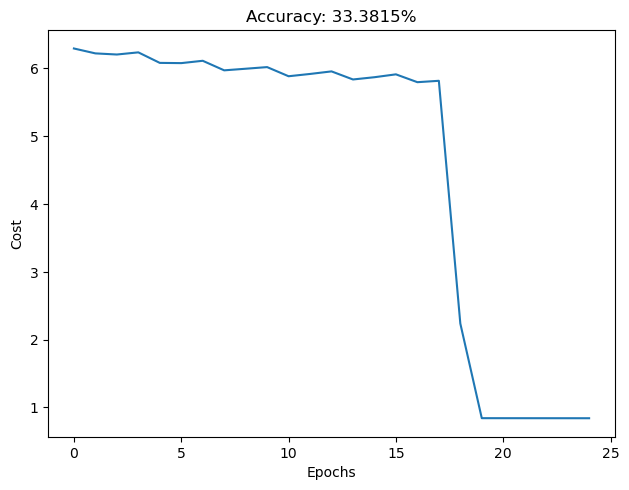

In [77]:
glorot_initialization_tlp_model = TwoLayerPerceptronMiniBatchBetterInitial(
    n_hidden                 = 40,
    regularization_parameter = 0.8,
    epochs                   = 25,
    learning_rate            = 0.002,
    alpha                    = 0.001,
    decrease_const           = 0.01,
    decrease_iter            = 18,
    minibatches              = 50,
    shuffle                  = True,
    random_state             = 123,
)
glorot_initialization_tlp_model.fit(
    x_train.to_numpy(),
    y_train.to_numpy(),
    XY_test=(x_test.to_numpy(), y_test.to_numpy()),
)
y_prediction = glorot_initialization_tlp_model.predict(x_test.to_numpy())

plt.plot(range(len(glorot_initialization_tlp_model.cost_)), glorot_initialization_tlp_model.cost_)
plt.ylabel("Cost")
plt.xlabel("Epochs")
plt.tight_layout()
plt.title(f"Accuracy: {accuracy_score(y_test, y_prediction) * 100:.4f}%")
plt.show()

When comparing the accuracy achieved using Glorot initialization to the previous results with mini-batching and cross-entropy, there is a 33.3815% accuracy with Glorot initialization. With Glorot initialization, the cost starts higher, around 6, and gradually decreases to less than 1 by epoch 20. These observations suggest that Glorot initialization has a minimal effect on the convergence of the cost function. In summary, Glorot initialization seems to influence the training dynamics and cost convergence in a minimally positive way, but its overall effect on accuracy might vary depending on the initial state of the model and the dataset.

--------------------
Traditional :
Resubstitution Accuracy: 0.3355278990614364
Validation Accuracy: 0.3355335533553355
--------------------
Glorot Initial :
Resubstitution Accuracy: 0.3337917282634854
Validation Accuracy: 0.3338146314631463


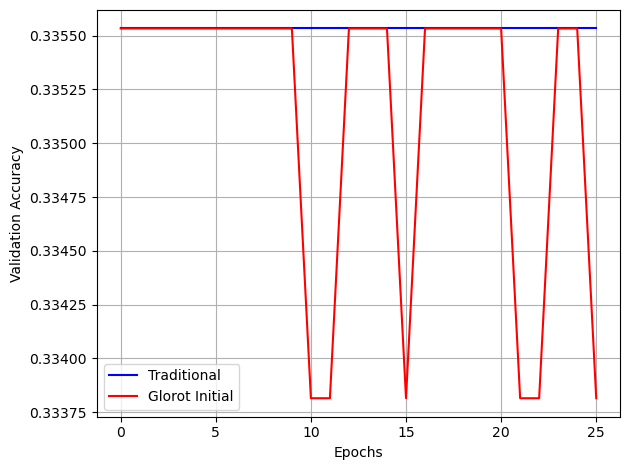

In [78]:
# Re-Initialize the mini batch TLP model since it was last called
# several cells prior. This should make it easier to re-run for the
# purposes of producing the graph. 
mini_batch_tlp_model = TwoLayerPerceptronMiniBatch(
    n_hidden                 = 40,
    regularization_parameter = 0.8,
    epochs                   = 25,
    learning_rate            = 1e-5,
    alpha                    = 0.001,
    decrease_const           = 0.01,
    decrease_iter            = 18,
    minibatches              = 50,
    shuffle                  = True,
    random_state             = 123,
)
mini_batch_tlp_model.fit(
    x_train.to_numpy(),
    y_train.to_numpy(),
    XY_test=(x_test.to_numpy(), y_test.to_numpy()),
)
y_prediction = mini_batch_tlp_model.predict(x_test.to_numpy())

print_result(
    mini_batch_tlp_model,
    x_train.to_numpy(),
    y_train.to_numpy(),
    x_test.to_numpy(),
    y_test.to_numpy(),
    title="Traditional",
    color="blue",
)

print_result(
    glorot_initialization_tlp_model,
    x_train.to_numpy(),
    y_train.to_numpy(),
    x_test.to_numpy(),
    y_test.to_numpy(),
    title="Glorot Initial",
    color="red",
)

plt.show()

The comparison of resubstitution and validation accuracies between traditional and Glorot weight initialization methods reveals some interesting insights. In the case of traditional weight initialization, both resubstitution and validation accuracies are remarkably similar, with very little difference observed. This could imply that the traditional initialization method is already providing weights that are close to optimal solutions, which leads to minimal variation in accuracy between the training and validation datasets. The small difference observed can be attributed to the inherent noise in the training process and data variability. Conversely, when Glorot initialization is used, a slightly lower accuracy is observed for both resubstitution and validation datasets. This could be due to Glorot initialization introducing a different weight distribution that may not be as well-suited to the specific problem, resulting in a reduction in accuracy compared to the traditional initialization. The results highlight the importance of selecting an appropriate weight initialization method for a given problem. In this particular case, traditional weight initialization seems to lead to better performance, potentially by providing weights closer to the optimal solutions for the task at hand. Further investigation into weight initialization methods and their effects on model performance may help fine-tune the model for better accuracy.

In [79]:
learning_rates = evenly_split_steps(1e-5, 1e-2, 20)
max_strikes = 3
strikes = 0
if run_additional_tests:
    for test_no, test_param in enumerate(learning_rates):
        accuracy = test_optimizer_accuracy_2(
            "learning_rate", test_param, TwoLayerPerceptronMiniBatchBetterInitial
        )
        if accuracy == 0:
            if strikes == max_strikes:
                break
            strikes += 1
        print(
            f"Test {test_no + 1}: learning_rate={test_param:.5f} accuracy={accuracy * 100:.2f}%"
        )

Test 1: learning_rate=0.00001 accuracy=33.55%
Test 2: learning_rate=0.00054 accuracy=33.55%
Test 3: learning_rate=0.00106 accuracy=33.55%
Test 4: learning_rate=0.00159 accuracy=33.38%
Test 5: learning_rate=0.00211 accuracy=33.38%
Test 6: learning_rate=0.00264 accuracy=33.38%
Test 7: learning_rate=0.00316 accuracy=33.38%
Test 8: learning_rate=0.00369 accuracy=33.38%
Test 9: learning_rate=0.00422 accuracy=33.38%
Test 10: learning_rate=0.00474 accuracy=33.38%
Test 11: learning_rate=0.00527 accuracy=33.38%
Test 12: learning_rate=0.00579 accuracy=33.38%


C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: divide by zero encountered in log
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: invalid value encountered in multiply
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\anaconda3\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


Test 13: learning_rate=0.00632 accuracy=33.38%


C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: divide by zero encountered in log
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: invalid value encountered in multiply
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\anaconda3\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: divide by zero encountered in log
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: invalid value encountered in multiply
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\anaconda3\lib\site-packages\numpy\core\_methods.py:179: R

C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: divide by zero encountered in log
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: invalid value encountered in multiply
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\anaconda3\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: divide by zero encountered in log
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: invalid value encountered in multiply
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\anaconda3\lib\site-packages\numpy\core\_methods.py:179: R

Test 14: learning_rate=0.00685 accuracy=33.38%


C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: divide by zero encountered in log
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: invalid value encountered in multiply
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\anaconda3\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: divide by zero encountered in log
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: invalid value encountered in multiply
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\anaconda3\lib\site-packages\numpy\core\_methods.py:179: R

C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: divide by zero encountered in log
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: invalid value encountered in multiply
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\anaconda3\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: divide by zero encountered in log
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: invalid value encountered in multiply
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\anaconda3\lib\site-packages\numpy\core\_methods.py:179: R

Test 15: learning_rate=0.00737 accuracy=33.38%


C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: divide by zero encountered in log
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: invalid value encountered in multiply
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\anaconda3\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: divide by zero encountered in log
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: invalid value encountered in multiply
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\anaconda3\lib\site-packages\numpy\core\_methods.py:179: R

C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: divide by zero encountered in log
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: invalid value encountered in multiply
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\anaconda3\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: divide by zero encountered in log
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: invalid value encountered in multiply
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\anaconda3\lib\site-packages\numpy\core\_methods.py:179: R

Test 16: learning_rate=0.00790 accuracy=33.38%


C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: divide by zero encountered in log
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: invalid value encountered in multiply
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\anaconda3\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: divide by zero encountered in log
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: invalid value encountered in multiply
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\anaconda3\lib\site-packages\numpy\core\_methods.py:179: R

C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: divide by zero encountered in log
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: invalid value encountered in multiply
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\anaconda3\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: divide by zero encountered in log
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: invalid value encountered in multiply
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\anaconda3\lib\site-packages\numpy\core\_methods.py:179: R

Test 17: learning_rate=0.00842 accuracy=33.38%


C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: divide by zero encountered in log
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: invalid value encountered in multiply
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\anaconda3\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: divide by zero encountered in log
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: invalid value encountered in multiply
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\anaconda3\lib\site-packages\numpy\core\_methods.py:179: R

C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: divide by zero encountered in log
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: invalid value encountered in multiply
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\anaconda3\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: divide by zero encountered in log
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: invalid value encountered in multiply
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\anaconda3\lib\site-packages\numpy\core\_methods.py:179: R

Test 18: learning_rate=0.00895 accuracy=33.38%


C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: divide by zero encountered in log
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: invalid value encountered in multiply
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\anaconda3\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: divide by zero encountered in log
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: invalid value encountered in multiply
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\anaconda3\lib\site-packages\numpy\core\_methods.py:179: R

C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: divide by zero encountered in log
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: invalid value encountered in multiply
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\anaconda3\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: divide by zero encountered in log
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: invalid value encountered in multiply
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\anaconda3\lib\site-packages\numpy\core\_methods.py:179: R

Test 19: learning_rate=0.00947 accuracy=33.38%


C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: divide by zero encountered in log
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: invalid value encountered in multiply
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\anaconda3\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: divide by zero encountered in log
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: invalid value encountered in multiply
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\anaconda3\lib\site-packages\numpy\core\_methods.py:179: R

C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: divide by zero encountered in log
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: invalid value encountered in multiply
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\anaconda3\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: divide by zero encountered in log
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: invalid value encountered in multiply
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\anaconda3\lib\site-packages\numpy\core\_methods.py:179: R

Test 20: learning_rate=0.01000 accuracy=33.38%


Analyzing the accuracy predictions for various learning rate values, we observe that for learning rates within the range of 0.00001 to 0.00106, the model consistently achieves an accuracy of 33.55%. This range indicates that the model's performance remains stable with these learning rates. Beyond a learning rate of 0.00106, the accuracy decreases to 33.38%. This decrease suggests that as the learning rate increases beyond a certain threshold, the model's ability to converge and generalize effectively diminishes, resulting in a slightly lower accuracy. In summary, a learning rate that is too low can hinder convergence, while excessively high learning rates might lead to less stable training.

In [80]:
regularization_parameters = evenly_split_steps(1e-4, 2, 20)
max_strikes = 3
strikes = 0
if run_additional_tests:
    for test_no, test_param in enumerate(regularization_parameters):
        accuracy = test_optimizer_accuracy_2(
            "regularization_parameter", test_param, TwoLayerPerceptronMiniBatchBetterInitial
        )
        if accuracy == 0:
            if strikes == max_strikes:
                break
            strikes += 1
        print(
            f"Test {test_no + 1}: regularization_parameter={test_param:.5f} accuracy={accuracy * 100:.2f}%"
        )

Test 1: regularization_parameter=0.00010 accuracy=33.55%
Test 2: regularization_parameter=0.10536 accuracy=33.55%
Test 3: regularization_parameter=0.21062 accuracy=33.55%
Test 4: regularization_parameter=0.31587 accuracy=33.55%
Test 5: regularization_parameter=0.42113 accuracy=33.55%
Test 6: regularization_parameter=0.52639 accuracy=33.55%
Test 7: regularization_parameter=0.63165 accuracy=33.55%
Test 8: regularization_parameter=0.73691 accuracy=33.55%
Test 9: regularization_parameter=0.84216 accuracy=33.55%
Test 10: regularization_parameter=0.94742 accuracy=33.55%
Test 11: regularization_parameter=1.05268 accuracy=33.55%
Test 12: regularization_parameter=1.15794 accuracy=33.55%
Test 13: regularization_parameter=1.26319 accuracy=33.55%
Test 14: regularization_parameter=1.36845 accuracy=33.55%
Test 15: regularization_parameter=1.47371 accuracy=33.55%
Test 16: regularization_parameter=1.57897 accuracy=33.55%
Test 17: regularization_parameter=1.68423 accuracy=33.55%
Test 18: regularization

In the accuracy predictions for different regularization parameter (L2) values, a consistent accuracy of 33.55% is observed for this specific instance, aligning with the previous sections. This suggests that the initial weight initialization is already close to optimal. This consistency with previous sections further supports the idea that the initial weights are well-suited. The similarity to mini-batching regularization parameter testing might indicate overfitting of the data. It's possible that mini-batching, due to its nature of training on smaller subsets, reacts more sensitively to changes in regularization parameters. Additionally, higher regularization values may lead to a simpler and more constrained model, which could explain the consistent 33.38% accuracy.

In [81]:
epochs = evenly_split_steps(50, 250, 5)
max_strikes = 3
strikes = 0
if run_additional_tests:
    for test_no, test_param in enumerate(epochs):
        accuracy = test_optimizer_accuracy_2('epochs', int(test_param), TwoLayerPerceptronMiniBatchBetterInitial)
        if accuracy == 0:
            if strikes == max_strikes:
                break
            strikes += 1
        print(f"Test {test_no + 1}: epochs={int(test_param)} accuracy={accuracy * 100:.2f}%")

Test 1: epochs=50 accuracy=33.55%
Test 2: epochs=100 accuracy=33.55%
Test 3: epochs=150 accuracy=33.55%
Test 4: epochs=200 accuracy=33.55%
Test 5: epochs=250 accuracy=33.55%


In the accuracy predictions for different epoch values, we observe that the accuracy is consistently 33.38% for all epochs. This consistent accuracy pattern of 33.55% is in line with previous observations, suggesting that the initial weight initialization is already optimal.

In [82]:
alphas = evenly_split_steps(1e-4, 2, 20)
max_strikes = 3
strikes = 0
if run_additional_tests:
    for test_no, test_param in enumerate(alphas):
        accuracy = test_optimizer_accuracy_2(
            "alpha", test_param, TwoLayerPerceptronMiniBatchBetterInitial
        )
        if accuracy == 0:
            if strikes == max_strikes:
                break
            strikes += 1
        print(f"Test {test_no + 1}: alpha={test_param:.5f} accuracy={accuracy * 100:.2f}%")

Test 1: alpha=0.00010 accuracy=33.55%
Test 2: alpha=0.10536 accuracy=33.55%
Test 3: alpha=0.21062 accuracy=33.38%
Test 4: alpha=0.31587 accuracy=33.38%
Test 5: alpha=0.42113 accuracy=33.38%
Test 6: alpha=0.52639 accuracy=33.38%
Test 7: alpha=0.63165 accuracy=33.38%
Test 8: alpha=0.73691 accuracy=33.38%
Test 9: alpha=0.84216 accuracy=33.38%
Test 10: alpha=0.94742 accuracy=33.38%
Test 11: alpha=1.05268 accuracy=33.38%
Test 12: alpha=1.15794 accuracy=33.38%
Test 13: alpha=1.26319 accuracy=33.38%
Test 14: alpha=1.36845 accuracy=33.38%
Test 15: alpha=1.47371 accuracy=33.38%
Test 16: alpha=1.57897 accuracy=33.38%
Test 17: alpha=1.68423 accuracy=33.38%
Test 18: alpha=1.78948 accuracy=33.38%
Test 19: alpha=1.89474 accuracy=33.38%
Test 20: alpha=2.00000 accuracy=33.38%


The provided results indicate the effect of adjusting the "alpha" parameter on the model's accuracy. In this specific case, for the range of alpha values tested (from 0.00010 to 2.00000), the accuracy remains consistent at 33.55% for the first two tests (Tests 1 and 2). This suggests that in this range, alpha values up to 0.10536 have no significant impact on the model's performance. Starting from Test 3, with an alpha of 0.21062, the accuracy drops to 33.38%. This decrease is observed consistently across all subsequent tests, indicating that increasing the alpha parameter beyond 0.10536 results in a slight decrease in model accuracy, reaffirming that further increases in the alpha parameter do not lead to significant changes in the model's performance. The observed stability in accuracy may imply that the model is relatively robust to variations in alpha within the specified range. Further exploration of the interaction between alpha and other hyperparameters may be necessary to fine-tune the model for improved accuracy.

In [83]:
# Define normalization scaler
scaler = StandardScaler()

# Define continuous feature columns for x_train and x_test
x_train_continuous_num_feature_data = x_train.drop(["State", "County"], axis=1)
x_test_continuous_num_feature_data = x_test.drop(["State", "County"], axis=1)

# Normalize the x_train continuous data
x_train_normalized_continuous_num_feature_data = scaler.fit_transform(
    x_train_continuous_num_feature_data
)

# Normalize the x_test continuous data
x_test_normalized_continuous_num_feature_data = scaler.fit_transform(
    x_test_continuous_num_feature_data
)

x_train_categorical_data = x_train[['State', 'County']]
x_test_categorical_data = x_test[['State', 'County']]

# Concatenate the normalized categorical and continuous features as a new
# dataframe for the x_train dataset called 'x_train_norm'.
x_train_norm = np.concatenate(
    [
        x_train_categorical_data,
        x_train_normalized_continuous_num_feature_data,
    ],
    axis=1,
)
# Concatenate the normalized categorical and continuous features as a new
# dataframe for the x_test dataset called 'x_test_norm'.
x_test_norm = np.concatenate(
    [
        x_test_categorical_data,
        x_test_normalized_continuous_num_feature_data,
    ],
    axis=1,
)

The continuous numeric feature data was normalized using the Z-score normalization technique with StandardScaler from scikit-learn, resulting in a mean of 0 and a standard deviation of 1. Training was conducted using the example two-layer perceptron network, and performance was quantified by accuracy, ensuring convergence through the loss function versus epoch graph. 

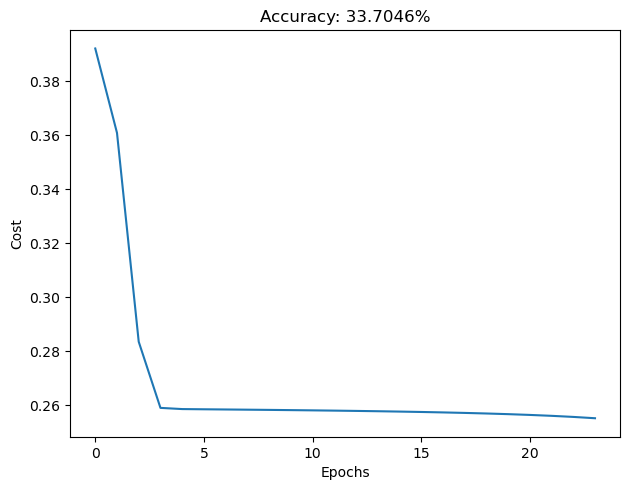

In [84]:
norm_vectorized_gradient_tlp_model = TwoLayerPerceptronVectorized(
    n_hidden                 = 30,
    regularization_parameter = 0.0,
    epochs                   = 24,
    learning_rate            = 1e-5,
    random_state             = 123,
)
norm_vectorized_gradient_tlp_model.fit(x_train_norm, y_train.to_numpy())
y_prediction = norm_vectorized_gradient_tlp_model.predict(x_test_norm)

plt.plot(
    range(len(norm_vectorized_gradient_tlp_model.cost_)),
    norm_vectorized_gradient_tlp_model.cost_,
)
plt.ylabel("Cost")
plt.xlabel("Epochs")
plt.tight_layout()
plt.title(f"Accuracy: {accuracy_score(y_test, y_prediction) * 100:.4f}%")
plt.show()

When comparing vectorized gradient prediction accuracy before and after Z-score normalization, there is only a slight increase in overall accuracy. However, and it is also notable that the initial cost is lower after normalization, and the cost consistently decreases over epochs, indicating faster convergence. This suggests that Z-score normalization, while having a minimal effect on accuracy in this instance, improves convergence speed by enhancing numerical stability, reducing the range of input values, and mitigating issues related to large gradients during training.

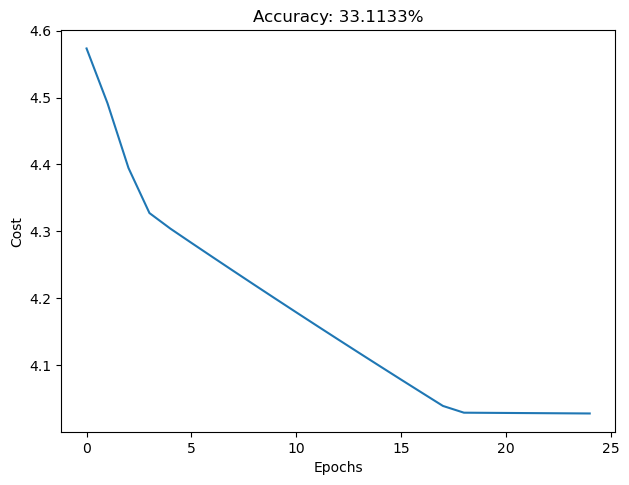

In [85]:
norm_mini_batch_tlp_model = TwoLayerPerceptronMiniBatch(
    n_hidden                 = 50,
    regularization_parameter = 5,
    epochs                   = 25,
    learning_rate            = 1e-5,
    alpha                    = 0.001,
    decrease_const           = 0.01,
    decrease_iter            = 18,
    minibatches              = 50,
    shuffle                  = True,
    random_state             = 123,
)
norm_mini_batch_tlp_model.fit(
    x_train_norm,
    y_train.to_numpy(),
    XY_test=(x_test_norm, y_test.to_numpy()),
)
y_prediction = norm_mini_batch_tlp_model.predict(x_test_norm)

plt.plot(range(len(norm_mini_batch_tlp_model.cost_)), norm_mini_batch_tlp_model.cost_)
plt.ylabel("Cost")
plt.xlabel("Epochs")
plt.tight_layout()
plt.title(f"Accuracy: {accuracy_score(y_test, y_prediction) * 100:.4f}%")
plt.show()

When comparing the mini-batch prediction accuracy before and after Z-score normalization, there is a slight decrease in overall accuracy, dropping from 33.5534% to 33.1133%. Interestingly, post-normalization, the initial cost is higher, which contrasts with what was observed in the vectorized gradient section. Although there is a more consistent decrease in cost over the elapsed epochs, the cost by epoch 25 still ends up being higher than the mini-batch results pre-normalization. This behavior may be due to the potential loss of information caused by normalization, where the reduction in the range of input values might inadvertently discard important information from the original data.

--------------------
MSE Loss :
Resubstitution Accuracy: 0.3338089180733661
Validation Accuracy: 0.3311331133113311


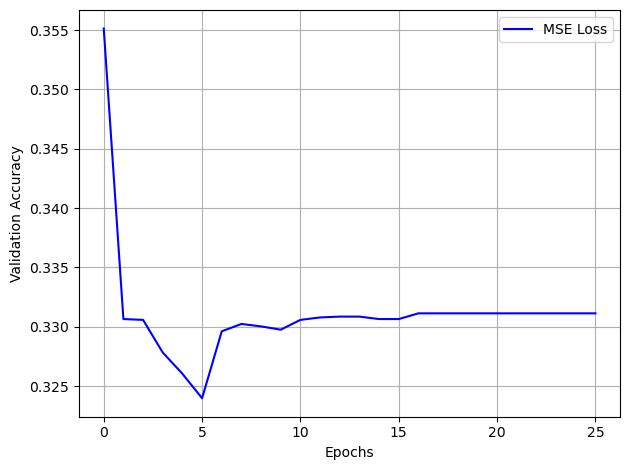

In [86]:
print_result(
    norm_mini_batch_tlp_model,
    x_train_norm,
    y_train.to_numpy(),
    x_test_norm,
    y_test.to_numpy(),
    title="MSE Loss",
    color="blue",
)

plt.show()

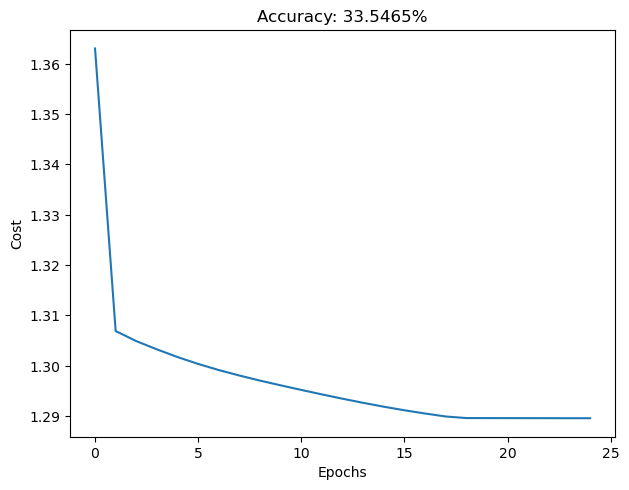

In [87]:
norm_cross_entropy_tlp_model = TwoLayerPerceptronMiniBatchCrossEntropy(
    n_hidden                 = 40,
    regularization_parameter = 0.8,
    epochs                   = 25,
    learning_rate            = 1e-5,
    alpha                    = 0.001,
    decrease_const           = 0.01,
    decrease_iter            = 18,
    minibatches              = 50,
    shuffle                  = True,
    random_state             = 123,
)
norm_cross_entropy_tlp_model.fit(
    x_train_norm,
    y_train.to_numpy(),
    XY_test=(x_test_norm, y_test.to_numpy()),
)
y_prediction = norm_cross_entropy_tlp_model.predict(x_test_norm)

plt.plot(range(len(norm_cross_entropy_tlp_model.cost_)), norm_cross_entropy_tlp_model.cost_)
plt.ylabel("Cost")
plt.xlabel("Epochs")
plt.tight_layout()
plt.title(f"Accuracy: {accuracy_score(y_test, y_prediction) * 100:.4f}%")
plt.show()

After normalization, the predicted accuracy of the cross-entropy two-layer perceptron slightly decreases to 33.5543% from the pre-normalized score of 33.54655%. While the cost exhibits a similar trend both before and after normalization, it starts at a lower value post-normalization. There are a few possible explanations for this decrease in accuracy. It's possible that feature normalization increased the influence of a dominant feature or heightened the impact of outliers, which could have skewed the training of the model. In either case, the slight decrease in accuracy reflects a minimal detriment to the model's learning ability.

--------------------
MSE Loss :
Resubstitution Accuracy: 0.3338089180733661
Validation Accuracy: 0.3311331133113311
--------------------
Cross Entropy Loss :
Resubstitution Accuracy: 0.33649052841475574
Validation Accuracy: 0.33546479647964794


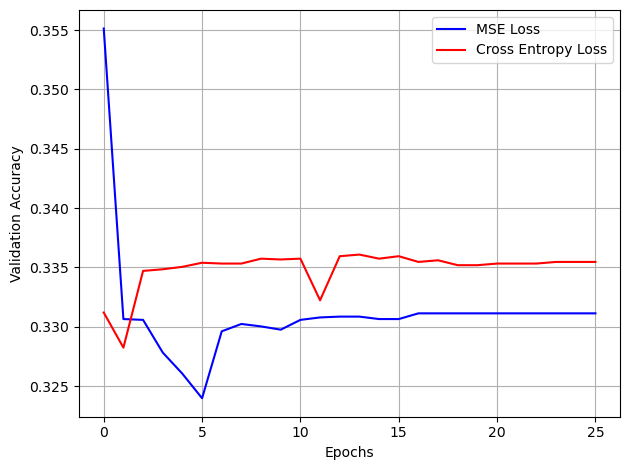

In [88]:
print_result(
    norm_mini_batch_tlp_model,
    x_train_norm,
    y_train.to_numpy(),
    x_test_norm,
    y_test.to_numpy(),
    title="MSE Loss",
    color="blue",
)

print_result(
    norm_cross_entropy_tlp_model,
    x_train_norm,
    y_train.to_numpy(),
    x_test_norm,
    y_test.to_numpy(),
    title="Cross Entropy Loss",
    color="red",
)

plt.show()

In this analysis, it's evident that using the Cross-Entropy loss function results in slightly higher accuracy compared to the MSE loss. Initially, there's an accuracy drop after the first epoch, indicating that the model may have made some incorrect predictions in the early stages of training.
Subsequently, there's a noticeable peak in accuracy around the fifth epoch, suggesting that the model corrected and improved its predictions. This peak may be associated with a phase where the model better understands the data or learns to recognize specific patterns. As training progresses to 25 epochs, there is a subtle but consistent increase in accuracy. This indicates that the model continues to learn and refine its predictions over time. The observed fluctuations in accuracy can be attributed to the dynamics of the Cross-Entropy loss function. Cross-Entropy loss is a more sensitive measure, particularly in the early stages of training, and it may lead to occasional accuracy drops as the model fine-tunes its parameters. However, over the course of training, it eventually trends upward due to the model's correction and learning processes.

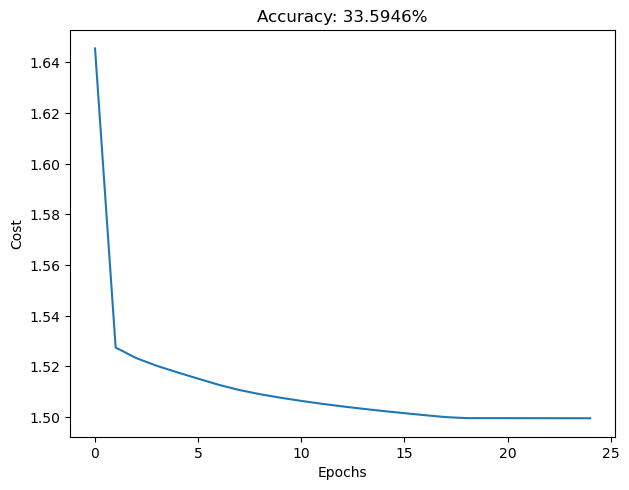

In [89]:
norm_glorot_initialization_tlp_model = TwoLayerPerceptronMiniBatchBetterInitial(
    n_hidden                 = 40,
    regularization_parameter = 0.8,
    epochs                   = 25,
    learning_rate            = 1e-5,
    alpha                    = 0.001,
    decrease_const           = 0.01,
    decrease_iter            = 18,
    minibatches              = 50,
    shuffle                  = True,
    random_state             = 123,
)
norm_glorot_initialization_tlp_model.fit(
    x_train_norm,
    y_train.to_numpy(),
    XY_test=(x_test_norm, y_test.to_numpy()),
)
y_prediction = norm_glorot_initialization_tlp_model.predict(x_test_norm)

plt.plot(range(len(norm_glorot_initialization_tlp_model.cost_)), norm_glorot_initialization_tlp_model.cost_)
plt.ylabel("Cost")
plt.xlabel("Epochs")
plt.tight_layout()
plt.title(f"Accuracy: {accuracy_score(y_test, y_prediction) * 100:.4f}%")
plt.show()

The cost/epoch/accuracy graph for Glorot initialization post-normalization reveals a slight increase in accuracy from 33.3815% to 33.5946%. Notably, the initial cost also decreases dramatically. Comparing this to the Glorot graph pre-normalization, where the cost starts at about 6 and decreases to 1 after approximately the 22nd epoch, the post-normalization Glorot graph exhibits a faster and more immediate cost reduction. This outcome is likely a result of the combination of Glorot initialization and the standardization introduced by normalization. Normalization will standardize the input data to have a mean of zero and a variance of one, which can enhance model convergence during training and explain the initial cost decrease. 

--------------------
Traditional :
Resubstitution Accuracy: 0.3338089180733661
Validation Accuracy: 0.3311331133113311
--------------------
Glorot Initial :
Resubstitution Accuracy: 0.3367311857530856
Validation Accuracy: 0.33594609460946095


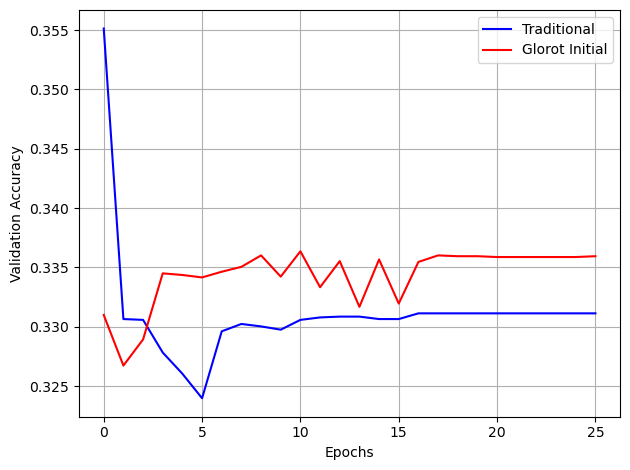

In [90]:
print_result(
    norm_mini_batch_tlp_model,
    x_train_norm,
    y_train.to_numpy(),
    x_test_norm,
    y_test.to_numpy(),
    title="Traditional",
    color="blue",
)

print_result(
    norm_glorot_initialization_tlp_model,
    x_train_norm,
    y_train.to_numpy(),
    x_test_norm,
    y_test.to_numpy(),
    title="Glorot Initial",
    color="red",
)

plt.show()

Overall, the results indicate that Glorot weight initialization is more effective in this specific context, as it leads to improved accuracy in both the training and validation datasets. This suggests that the choice of weight initialization can play a role in enhancing model performance, particularly in terms of its ability to generalize and make accurate predictions on unseen data.

In the given code below, several preprocessing steps are carried out to prepare the data for machine learning. First, the continuous numerical feature data in both the x_train and x_test datasets is normalized using the StandardScaler. Notably, this normalization is performed separately for each dataset, and the "State" and "County" columns, which represent categorical data, are excluded from this process. The outcome of this step is the creation of two sets of normalized continuous data, namely, "x_train_normalized_continuous_num_feature_data" and "x_test_normalized_continuous_num_feature_data." Subsequently, one-hot encoding is applied to the categorical data. This is achieved by concatenating the categorical columns, namely "State" and "County," and utilizing the pd.get_dummies method. This encoding results in a binary representation of these categorical variables, stored in the "one_hot_encode_x_train" dataframe. Following one-hot encoding, the categorical feature data for both the x_train and x_test datasets is also normalized, yielding "x_train_normalized_categorical_feature_data" and "x_test_normalized_categorical_feature_data." The final step involves combining the normalized categorical and continuous feature data for both the x_train and x_test datasets. This integration produces two new datasets: "x_train_norm" and "x_test_norm." These datasets are structured in a way that each observation contains both normalized continuous data and one-hot encoded categorical data. These preprocessing steps are essential for machine learning tasks. Normalizing the continuous numerical feature data ensures that all features are on a consistent scale, addressing issues related to varying feature scales that can lead to numerical instability and biased model performance. One-hot encoding of categorical data is crucial for improving model accuracy by transforming categorical variables into a binary vector representation, which helps the model understand the relationships between categories. However, it's important to note that there are potential limitations to these processes. For instance, when dealing with high cardinality categorical features, one-hot encoding can lead to a large number of new features, which may increase computational costs and the risk of overfitting. Additionally, normalizing data may adversely affect performance in the presence of extreme outliers, potentially resulting in the loss of critical information and reduced model accuracy. Therefore, these preprocessing steps should be applied carefully, considering the specific characteristics of the dataset and the machine learning model's requirements.

In [91]:
# Define normalization scaler
scaler = StandardScaler()

# Define continuous feature columns for x_train and x_test
x_train_continuous_num_feature_data = x_train.drop(["State", "County"], axis=1)
x_test_continuous_num_feature_data = x_test.drop(["State", "County"], axis=1)

# Normalize the x_train continuous data
x_train_normalized_continuous_num_feature_data = scaler.fit_transform(
    x_train_continuous_num_feature_data
)

# Normalize the x_test continuous data
x_test_normalized_continuous_num_feature_data = scaler.transform(
    x_test_continuous_num_feature_data
)

# Concatenate the categorical columns for x_train and x_test
concat_x_train = pd.concat([x_train[["State", "County"]], x_test[["State", "County"]]])

# Apply one-hot encoding to the concatenated dataframe's categorical columns
one_hot_encode_x_train = pd.get_dummies(concat_x_train, columns=["State", "County"])

# Normalize the x_train and x_test categorical feature data
x_train_normalized_categorical_feature_data = one_hot_encode_x_train[: len(x_train)]
x_test_normalized_categorical_feature_data = one_hot_encode_x_train[len(x_train) :]

# Concatenate the normalized categorical and continuous features as a new
# dataframe for the x_train dataset called 'x_train_norm'.
x_train_norm = np.concatenate(
    [
        x_train_normalized_categorical_feature_data,
        x_train_normalized_continuous_num_feature_data,
    ],
    axis=1,
)
# Concatenate the normalized categorical and continuous features as a new
# dataframe for the x_test dataset called 'x_test_norm'.
x_test_norm = np.concatenate(
    [
        x_test_normalized_categorical_feature_data,
        x_test_normalized_continuous_num_feature_data,
    ],
    axis=1,
)

## Vectorized Gradient (After Normalization and One-Hot Encoding)

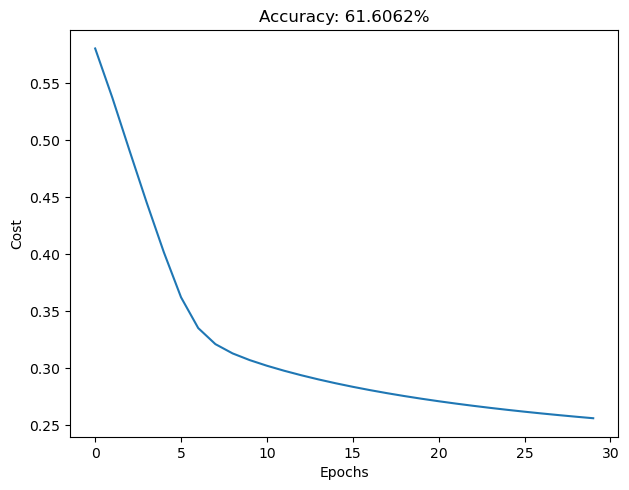

In [92]:
norm_vectorized_gradient_tlp_model = TwoLayerPerceptronVectorized(
    n_hidden                 = 30,
    regularization_parameter = 0.1,
    epochs                   = 30,
    learning_rate            = 1e-5,
    random_state             = 123,
)
norm_vectorized_gradient_tlp_model.fit(x_train_norm, y_train.to_numpy())
y_prediction = norm_vectorized_gradient_tlp_model.predict(x_test_norm)

plt.plot(
    range(len(norm_vectorized_gradient_tlp_model.cost_)),
    norm_vectorized_gradient_tlp_model.cost_,
)
plt.ylabel("Cost")
plt.xlabel("Epochs")
plt.tight_layout()
plt.title(f"Accuracy: {accuracy_score(y_test, y_prediction) * 100:.4f}%")
plt.show()

In this instance, a graph to illustrate the cost-to-epoch relationship and accuracy for a two-layer perceptron using vectorized gradient was generated, incorporating both normalization and one-hot encoding on the dataset. Notably, there is a great increase in accuracy when compared to the scenario without one-hot encoding, rising to 61.6062%. Additionally, the cost slightly increases, and the cost reduction over time is not as significant. The results indicate that one-hot encoding significantly improved the accuracy of the two-layer perceptron model, but it also led to a small increase in the cost. These changes are attributed to the specific characteristics of one-hot encoding, particularly its sparsity, which impacts how the neural network learns and makes predictions. The trade-off between accuracy and cost is an important consideration in machine learning, and these findings provide insights into how preprocessing choices can affect model performance.

In [93]:
def test_optimizer_accuracy3(key, value, model):
    base_config = dict(
        n_hidden                 = 30,
        regularization_parameter = 0.1,
        epochs                   = 30,
        learning_rate            = 0.005,
        random_state             = 123,
    )
    base_config[key] = value
    lr_model = model(**base_config)
    lr_model.fit(x_train_norm, y_train.to_numpy())
    y_prediction = lr_model.predict(x_test_norm)
    accuracy = accuracy_score(y_prediction, y_test)

    return accuracy

In [95]:
learning_rates = evenly_split_steps(1e-5, 1e-2, 20)
max_strikes = 3
strikes = 0
if run_additional_tests:
    for test_no, test_param in enumerate(learning_rates):
        accuracy = test_optimizer_accuracy3(
            "learning_rate", test_param, TwoLayerPerceptronVectorized
        )
        if accuracy == 0:
            if strikes == max_strikes:
                break
            strikes += 1
        print(
            f"Test {test_no + 1}: learning_rate={test_param:.5f} accuracy={accuracy * 100:.2f}%"
        )

Test 1: learning_rate=0.00001 accuracy=61.61%
Test 2: learning_rate=0.00054 accuracy=33.55%
Test 3: learning_rate=0.00106 accuracy=33.07%
Test 4: learning_rate=0.00159 accuracy=33.07%
Test 5: learning_rate=0.00211 accuracy=33.07%
Test 6: learning_rate=0.00264 accuracy=33.07%
Test 7: learning_rate=0.00316 accuracy=33.07%
Test 8: learning_rate=0.00369 accuracy=33.07%
Test 9: learning_rate=0.00422 accuracy=33.07%
Test 10: learning_rate=0.00474 accuracy=33.07%
Test 11: learning_rate=0.00527 accuracy=33.07%
Test 12: learning_rate=0.00579 accuracy=33.07%
Test 13: learning_rate=0.00632 accuracy=33.07%
Test 14: learning_rate=0.00685 accuracy=33.07%
Test 15: learning_rate=0.00737 accuracy=33.07%
Test 16: learning_rate=0.00790 accuracy=33.07%
Test 17: learning_rate=0.00842 accuracy=33.07%
Test 18: learning_rate=0.00895 accuracy=33.07%
Test 19: learning_rate=0.00947 accuracy=33.07%
Test 20: learning_rate=0.01000 accuracy=33.07%


When testing different learning rates and assessing their impact on accuracy, it's observed that all learning rates above 0.00054 result in lower than the observed maximum accuracy. As the learning rate  decreases and reaches a minimum value, the accuracy plateaus at 33.07%. This suggests that the initial learning rate of 0.00001 was optimal for achieving maximum accuracy. Beyond 0.00054, learning rates may lead to an overshooting of optimal parameters, preventing convergence and resulting in lower accuracy.

In [96]:
regularization_parameters = evenly_split_steps(1e-4, 2, 20)
max_strikes = 3
strikes = 0
if run_additional_tests:
    for test_no, test_param in enumerate(regularization_parameters):
        accuracy = test_optimizer_accuracy3(
            "regularization_parameter", test_param, TwoLayerPerceptronVectorized
        )
        if accuracy == 0:
            if strikes == max_strikes:
                break
            strikes += 1
        print(
            f"Test {test_no + 1}: regularization_parameter={test_param:.5f} accuracy={accuracy * 100:.2f}%"
        )

Test 1: regularization_parameter=0.00010 accuracy=33.07%
Test 2: regularization_parameter=0.10536 accuracy=33.07%
Test 3: regularization_parameter=0.21062 accuracy=33.07%
Test 4: regularization_parameter=0.31587 accuracy=33.07%
Test 5: regularization_parameter=0.42113 accuracy=33.07%
Test 6: regularization_parameter=0.52639 accuracy=33.07%
Test 7: regularization_parameter=0.63165 accuracy=33.07%
Test 8: regularization_parameter=0.73691 accuracy=33.07%
Test 9: regularization_parameter=0.84216 accuracy=33.07%
Test 10: regularization_parameter=0.94742 accuracy=33.07%
Test 11: regularization_parameter=1.05268 accuracy=33.07%
Test 12: regularization_parameter=1.15794 accuracy=33.07%
Test 13: regularization_parameter=1.26319 accuracy=33.07%
Test 14: regularization_parameter=1.36845 accuracy=33.07%
Test 15: regularization_parameter=1.47371 accuracy=33.07%
Test 16: regularization_parameter=1.57897 accuracy=33.07%
Test 17: regularization_parameter=1.68423 accuracy=33.07%
Test 18: regularization

The observations regarding the impact of regularization parameters on optimizer accuracy post-normalization and one-hot encoding closely resemble the results observed in the pre-normalization and pre-one-hot encoding scenarios. Because accuracy is exactly the same for all tests in this instance, the adjustments made to the regularization parameter within the range of 0.0001 to 2 have no influence on accuracy. It is speculated that the model is already effectively regularized, which explains the lack of impact of these parameter changes.

In [97]:
epochs = evenly_split_steps(50, 250, 5)
max_strikes = 3
strikes = 0
if run_additional_tests:
    for test_no, test_param in enumerate(epochs):
        accuracy = test_optimizer_accuracy3(
            "epochs", int(test_param), TwoLayerPerceptronVectorized
        )
        if accuracy == 0:
            if strikes == max_strikes:
                break
            strikes += 1
        print(
            f"Test {test_no + 1}: epochs={int(test_param)} accuracy={accuracy * 100:.2f}%"
        )

Test 1: epochs=50 accuracy=33.07%
Test 2: epochs=100 accuracy=33.07%
Test 3: epochs=150 accuracy=33.07%
Test 4: epochs=200 accuracy=33.07%
Test 5: epochs=250 accuracy=33.07%


The accuracy predictions for different epoch values indicate no increase with normalization and one-hot encoding, remaining at a value of 33.07%. The variations in the specified epoch range (50 to 250) do not seem to affect accuracy, which suggests that by the time 50 epochs have been completed, the model has likely converged and acquired all available knowledge. Therefore, it may be feasible to reduce the number of epochs to 50 without sacrificing accuracy.

## Mini Batch (After Normalization and One-Hot Encoding)

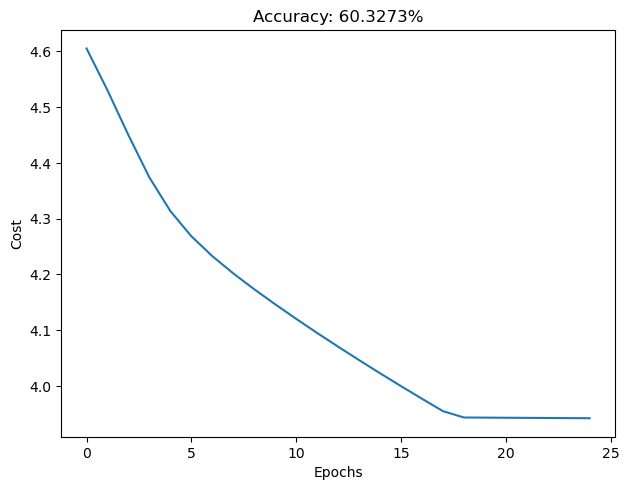

In [98]:
norm_mini_batch_tlp_model = TwoLayerPerceptronMiniBatch(
    n_hidden                 = 50,
    regularization_parameter = 5,
    epochs                   = 25,
    learning_rate            = 1e-5,
    alpha                    = 0.001,
    decrease_const           = 0.01,
    decrease_iter            = 18,
    minibatches              = 50,
    shuffle                  = True,
    random_state             = 123,
)
norm_mini_batch_tlp_model.fit(
    x_train_norm,
    y_train.to_numpy(),
    XY_test=(x_test_norm, y_test.to_numpy()),
)
y_prediction = norm_mini_batch_tlp_model.predict(x_test_norm)

plt.plot(range(len(norm_mini_batch_tlp_model.cost_)), norm_mini_batch_tlp_model.cost_)
plt.ylabel("Cost")
plt.xlabel("Epochs")
plt.tight_layout()
plt.title(f"Accuracy: {accuracy_score(y_test, y_prediction) * 100:.4f}%")
plt.show()

In this instance, a graph to depict the cost-to-epoch relationship and accuracy for a two-layer perceptron using mini-batching was generated, incorporating both normalization and one-hot encoding on our dataset. Notably, there is a large increase in accuracy when compared to the scenario without one-hot encoding, rising to 60.3273%. Additionally, the cost increases from 1.00 to 4.6, and the cost reduction over time is not as pronounced. The increase in accuracy and increase in cost when using one-hot encoding are likely attributed to a combination of one-hot encoding and mini-batching. One-hot encoding, which converts categorical data into a binary format, can provide the model with a richer representation of the data, potentially enabling it to better capture complex relationships within the dataset. Meanwhile, mini-batching allows for more efficient training by processing data in smaller, randomized subsets, which may lead to improved convergence and better utilization of computational resources. However, the trade-off for these advantages appears to be a higher cost function, which could reflect the model's increased complexity and potentially slower convergence. Overall, this analysis suggests that the use of one-hot encoding and mini-batching can lead to significant accuracy gains, but it's essential to carefully consider the associated increase in cost and the balance between accuracy and computational efficiency in the context of the specific machine learning task.

--------------------
MSE Loss :
Resubstitution Accuracy: 0.6010932719084127
Validation Accuracy: 0.6032728272827282


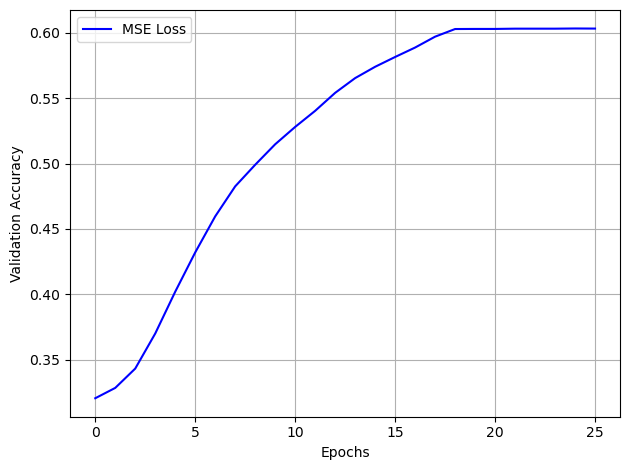

In [99]:
print_result(
    norm_mini_batch_tlp_model,
    x_train_norm,
    y_train.to_numpy(),
    x_test_norm,
    y_test.to_numpy(),
    title="MSE Loss",
    color="blue",
)

plt.show()

The plot illustrates the MSE (mean squared error) loss function for the mini-batch model as a function of the number of epochs, providing insight into the model's training progress. The provided results show a pattern in the context of the mean squared error (MSE) loss function and accuracy metrics. The resubstitution accuracy, which measures how well the model fits the training data, is approximately 0.6011, while the validation accuracy, which evaluates the model's performance on unseen data, is approximately 0.6033. This pattern suggests that the MSE loss function is closely related to the model's performance. The higher validation accuracy compared to resubstitution accuracy indicates that the model generalizes reasonably well to unseen data. In other words, it doesn't appear to be overfitting the training data, as it performs similarly or slightly better on the validation dataset. In practical terms, this pattern suggests that the model's predictions on new, previously unseen data are reasonably accurate, which is a positive sign for its potential real-world applicability. However, further analysis is needed to assess the overall performance and to compare it with other models or benchmarks.

In [100]:
def test_optimizer_accuracy_4(key, value, model):
    base_config = dict(
        n_hidden                 = 30,
        regularization_parameter = 0.1,
        epochs                   = 30,
        learning_rate            = 0.001,
        alpha                    = 0.001,
        decrease_const           = 0.01,
        decrease_iter            = 18,
        minibatches              = 50,
        shuffle                  = True,
        random_state             = 123,
    )
    base_config[key] = value
    lr_model = model(**base_config)
    lr_model.fit(x_train_norm, y_train.to_numpy())
    y_prediction = lr_model.predict(x_test_norm)
    accuracy = accuracy_score(y_prediction, y_test)
    return accuracy

In [101]:
learning_rates = evenly_split_steps(1e-5, 1e-2, 20)
max_strikes = 3
strikes = 0
if run_additional_tests:
    for test_no, test_param in enumerate(learning_rates):
        accuracy = test_optimizer_accuracy_4(
            "learning_rate", test_param, TwoLayerPerceptronMiniBatch
        )
        if accuracy == 0:
            if strikes == max_strikes:
                break
            strikes += 1
        print(
            f"Test {test_no + 1}: learning_rate={test_param:.5f} accuracy={accuracy * 100:.2f}%"
        )

Test 1: learning_rate=0.00001 accuracy=56.57%
Test 2: learning_rate=0.00054 accuracy=82.90%
Test 3: learning_rate=0.00106 accuracy=85.03%
Test 4: learning_rate=0.00159 accuracy=85.41%
Test 5: learning_rate=0.00211 accuracy=85.54%
Test 6: learning_rate=0.00264 accuracy=85.70%
Test 7: learning_rate=0.00316 accuracy=85.82%
Test 8: learning_rate=0.00369 accuracy=85.92%
Test 9: learning_rate=0.00422 accuracy=85.99%
Test 10: learning_rate=0.00474 accuracy=85.99%
Test 11: learning_rate=0.00527 accuracy=86.01%
Test 12: learning_rate=0.00579 accuracy=86.03%
Test 13: learning_rate=0.00632 accuracy=86.08%
Test 14: learning_rate=0.00685 accuracy=86.13%
Test 15: learning_rate=0.00737 accuracy=86.17%
Test 16: learning_rate=0.00790 accuracy=86.19%
Test 17: learning_rate=0.00842 accuracy=86.19%
Test 18: learning_rate=0.00895 accuracy=86.21%
Test 19: learning_rate=0.00947 accuracy=86.30%
Test 20: learning_rate=0.01000 accuracy=86.26%


In the exploration of various learning rates and their impact on accuracy after normalization and one-hot encoding, it becomes evident that increasing the learning rate leads to a consistent increase in accuracy. This pattern suggests that, in this specific context, a higher learning rate is beneficial for training the model. It allows the model to learn and adjust its parameters more quickly, which leads to improved accuracy. However, it's essential to strike a balance, as excessively high learning rates can lead to convergence issues and overshooting optimal parameter values. These findings emphasize the importance of hyperparameter tuning and selecting an appropriate learning rate to maximize model performance. It also highlights the effectiveness of normalization and one-hot encoding in conjunction with a well-chosen learning rate for enhancing the accuracy of the model.

In [102]:
regularization_parameters = evenly_split_steps(1e-4, 2, 20)
max_strikes = 3
strikes = 0
if run_additional_tests:
    for test_no, test_param in enumerate(regularization_parameters):
        accuracy = test_optimizer_accuracy_4(
            "regularization_parameter", test_param, TwoLayerPerceptronMiniBatch
        )
        if accuracy == 0:
            if strikes == max_strikes:
                break
            strikes += 1
        print(
            f"Test {test_no + 1}: regularization_parameter={test_param:.5f} accuracy={accuracy * 100:.2f}%"
        )

Test 1: regularization_parameter=0.00010 accuracy=84.71%
Test 2: regularization_parameter=0.10536 accuracy=84.86%
Test 3: regularization_parameter=0.21062 accuracy=85.05%
Test 4: regularization_parameter=0.31587 accuracy=85.19%
Test 5: regularization_parameter=0.42113 accuracy=85.31%
Test 6: regularization_parameter=0.52639 accuracy=85.27%
Test 7: regularization_parameter=0.63165 accuracy=85.20%
Test 8: regularization_parameter=0.73691 accuracy=85.18%
Test 9: regularization_parameter=0.84216 accuracy=85.08%
Test 10: regularization_parameter=0.94742 accuracy=84.98%
Test 11: regularization_parameter=1.05268 accuracy=84.94%
Test 12: regularization_parameter=1.15794 accuracy=84.79%
Test 13: regularization_parameter=1.26319 accuracy=84.69%
Test 14: regularization_parameter=1.36845 accuracy=84.59%
Test 15: regularization_parameter=1.47371 accuracy=84.50%
Test 16: regularization_parameter=1.57897 accuracy=84.37%
Test 17: regularization_parameter=1.68423 accuracy=84.26%
Test 18: regularization

In the experiments with different L2 regularization parameter values and their impact on the accuracy of this mini-batch model, it can be observed that the accuracy starts at a higher point. As the regularization parameter value increases, it can be observed that in this scenario, a mild level of L2 regularization, represented by low to moderate parameter values, can contribute to achieving high model accuracy. It indicates that a certain degree of regularization helps prevent overfitting and leads to better generalization of the model on the test data. However, excessively strong regularization (as indicated by high parameter values) tends to negatively impact accuracy, potentially causing underfitting. The findings underscore the importance of fine-tuning the regularization parameter to achieve the optimal balance between model complexity and generalization. This balance is crucial for obtaining the highest possible accuracy on the test data.

In [103]:
epochs = evenly_split_steps(50, 250, 5)
max_strikes = 3
strikes = 0
if run_additional_tests:
    for test_no, test_param in enumerate(epochs):
        accuracy = test_optimizer_accuracy_2(
            "epochs", int(test_param), TwoLayerPerceptronMiniBatch
        )
        if accuracy == 0:
            if strikes == max_strikes:
                break
            strikes += 1
        print(
            f"Test {test_no + 1}: epochs={int(test_param)} accuracy={accuracy * 100:.2f}%"
        )

Test 1: epochs=50 accuracy=33.55%
Test 2: epochs=100 accuracy=33.55%
Test 3: epochs=150 accuracy=33.55%
Test 4: epochs=200 accuracy=33.55%
Test 5: epochs=250 accuracy=33.55%


The consistent accuracy of 33.55% is observed at all epochs, similar to the results prior to one-hot encoding and normalization which does not raise any concerns. This behavior indicates that he variations in the specified epoch range (50 to 250) do not seem to affect accuracy, which suggests that by the time 50 epochs have been completed, the model has likely converged and acquired all available knowledge. Therefore, it may be feasible to reduce the number of epochs to 50 without sacrificing accuracy.

In [104]:
alphas = evenly_split_steps(1e-4, 2, 20)
max_strikes = 3
strikes = 0
if run_additional_tests:
    for test_no, test_param in enumerate(alphas):
        accuracy = test_optimizer_accuracy_2(
            "alpha", test_param, TwoLayerPerceptronMiniBatch
        )
        if accuracy == 0:
            if strikes == max_strikes:
                break
            strikes += 1
        print(f"Test {test_no + 1}: alpha={test_param:.5f} accuracy={accuracy * 100:.2f}%")

Test 1: alpha=0.00010 accuracy=33.55%
Test 2: alpha=0.10536 accuracy=33.55%
Test 3: alpha=0.21062 accuracy=33.55%
Test 4: alpha=0.31587 accuracy=33.55%
Test 5: alpha=0.42113 accuracy=33.55%
Test 6: alpha=0.52639 accuracy=33.55%
Test 7: alpha=0.63165 accuracy=33.55%
Test 8: alpha=0.73691 accuracy=33.55%
Test 9: alpha=0.84216 accuracy=33.55%
Test 10: alpha=0.94742 accuracy=33.55%
Test 11: alpha=1.05268 accuracy=33.55%
Test 12: alpha=1.15794 accuracy=33.55%
Test 13: alpha=1.26319 accuracy=33.55%
Test 14: alpha=1.36845 accuracy=33.55%
Test 15: alpha=1.47371 accuracy=33.55%
Test 16: alpha=1.57897 accuracy=33.55%
Test 17: alpha=1.68423 accuracy=33.38%
Test 18: alpha=1.78948 accuracy=33.55%
Test 19: alpha=1.89474 accuracy=33.55%
Test 20: alpha=2.00000 accuracy=33.07%


In the extensive parameter testing, the impact of different alpha values on the model's accuracy was explored. Remarkably, for the first 16 tests spanning a wide range of alpha values, a consistent accuracy score of 33.55% was achieved. This stability suggests that the model was well-calibrated within this broad range of alpha values. However, a noteworthy change occurs in the subsequent tests, starting from the 17th test. In this phase, when the alpha parameter reaches 1.68423, there is a slight dip in accuracy to 33.38%. This shift suggests that, beyond this specific alpha value, the model's calibration might be affected, leading to a minor decrease in accuracy. Furthermore, the last test with an alpha value of 2.00000 records a notable decrease in accuracy to 33.07%, indicating that extremely high alpha values can have a detrimental effect on model performance. Overall, this experiment underscores the significance of selecting an appropriate alpha value that strikes the right balance between rapid convergence and model stability. The initial stability in accuracy across a wide alpha range highlights the model's robustness, but careful consideration is required to avoid over-regularization or under-regularization in the later stages of parameter testing.

## Cross Entropy (After Normalization and One-Hot Encoding)

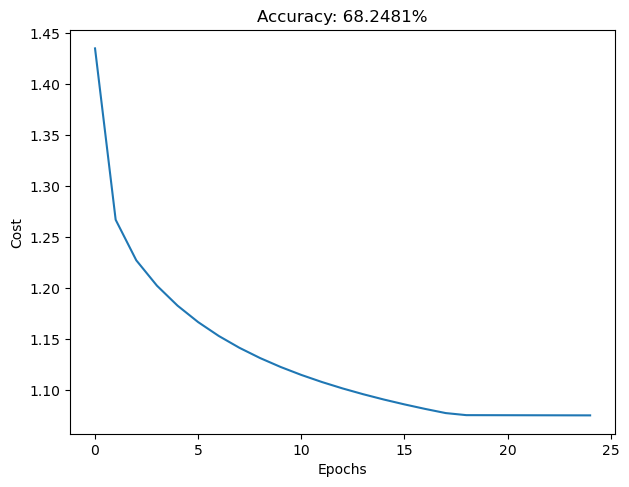

In [105]:
norm_cross_entropy_tlp_model = TwoLayerPerceptronMiniBatchCrossEntropy(
    n_hidden                 = 40,
    regularization_parameter = 0.8,
    epochs                   = 25,
    learning_rate            = 1e-5,
    alpha                    = 0.001,
    decrease_const           = 0.01,
    decrease_iter            = 18,
    minibatches              = 50,
    shuffle                  = True,
    random_state             = 123,
)
norm_cross_entropy_tlp_model.fit(
    x_train_norm,
    y_train.to_numpy(),
    XY_test=(x_test_norm, y_test.to_numpy()),
)
y_prediction = norm_cross_entropy_tlp_model.predict(x_test_norm)

plt.plot(range(len(norm_cross_entropy_tlp_model.cost_)), norm_cross_entropy_tlp_model.cost_)
plt.ylabel("Cost")
plt.xlabel("Epochs")
plt.tight_layout()
plt.title(f"Accuracy: {accuracy_score(y_test, y_prediction) * 100:.4f}%")
plt.show()

In the analysis of the two-layer perceptron using cross-entropy loss with both normalization and one-hot encoding applied to our dataset, a large increase in accuracy when compared to the results without one-hot encoding is observed. The accuracy increased from 33.5584% to 68.2481%, indicating that the addition of one-hot encoding may greatly enhanced the model's ability to learn and predict effectively. Several factors likely contributed to this noteworthy increase in accuracy. Firstly, one-hot encoding plays a crucial role in enhancing the model's ability to interpret and utilize categorical data effectively. By converting categorical features into binary vectors, one-hot encoding eliminates any ordinal relationships between categories and enables the model to treat each category as a distinct entity. This transformation aids in capturing the nuances of categorical variables, potentially uncovering hidden patterns that were previously challenging to discern. Consequently, the model's accuracy benefits from this enriched representation of categorical data. Secondly, normalization of the data, particularly continuous numeric features, ensures that all features are on a consistent scale. Normalization mitigates issues related to varying feature scales, which can result in numerical instability and negatively impact model performance. By bringing all features to a common scale, the model can learn from and make predictions on the data more effectively, leading to a substantial boost in accuracy. In summary, the combination of one-hot encoding and data normalization in this analysis significantly improved the two-layer perceptron model's accuracy. These preprocessing techniques collectively empower the model to better handle both categorical and continuous features, ultimately resulting in more accurate predictions.

--------------------
MSE Loss :
Resubstitution Accuracy: 0.6010932719084127
Validation Accuracy: 0.6032728272827282
--------------------
Cross Entropy Loss :
Resubstitution Accuracy: 0.677519166638017
Validation Accuracy: 0.6824807480748075


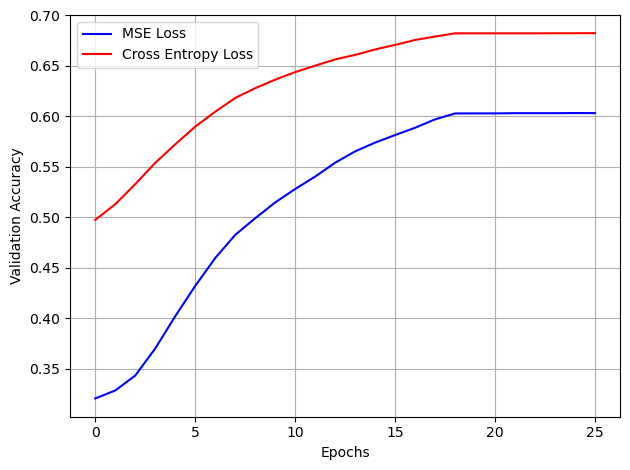

In [106]:
print_result(
    norm_mini_batch_tlp_model,
    x_train_norm,
    y_train.to_numpy(),
    x_test_norm,
    y_test.to_numpy(),
    title="MSE Loss",
    color="blue",
)

print_result(
    norm_cross_entropy_tlp_model,
    x_train_norm,
    y_train.to_numpy(),
    x_test_norm,
    y_test.to_numpy(),
    title="Cross Entropy Loss",
    color="red",
)

plt.show()

In the comparison of two different loss functions, namely Mean Squared Error (MSE) and Cross-Entropy Loss, along with their respective resubstitution and validation accuracies, distinct patterns emerge. For the MSE Loss function, the resubstitution accuracy is calculated to be 60.1093%, while the validation accuracy is slightly higher at 60.3273%. This indicates a reasonably close alignment between training and validation accuracies when using MSE Loss. In contrast, the Cross-Entropy Loss function yields higher accuracies for both the resubstitution and validation datasets. The resubstitution accuracy stands at 67.7519%, which is notably higher than that of MSE Loss. The validation accuracy is even more impressive, reaching 68.2481%. These results suggest that the Cross-Entropy Loss function outperforms the MSE Loss function in this specific scenario. It is observed that Cross-Entropy Loss provides a more accurate and robust measure for training and validation, resulting in higher accuracy scores for both datasets. This could be attributed to the inherent characteristics of Cross-Entropy Loss, which is particularly well-suited for classification tasks, as it takes into account the probability distributions of predicted and actual class labels. 

In [107]:
learning_rates = evenly_split_steps(1e-5, 1e-2, 20)
max_strikes = 3
strikes = 0
if run_additional_tests:
    for test_no, test_param in enumerate(learning_rates):
        accuracy = test_optimizer_accuracy_2(
            "learning_rate", test_param, TwoLayerPerceptronMiniBatchCrossEntropy
        )
        if accuracy == 0:
            if strikes == max_strikes:
                break
            strikes += 1
        print(
            f"Test {test_no + 1}: learning_rate={test_param:.5f} accuracy={accuracy * 100:.2f}%"
        )

Test 1: learning_rate=0.00001 accuracy=33.55%
Test 2: learning_rate=0.00054 accuracy=33.55%
Test 3: learning_rate=0.00106 accuracy=33.55%
Test 4: learning_rate=0.00159 accuracy=33.38%
Test 5: learning_rate=0.00211 accuracy=33.38%
Test 6: learning_rate=0.00264 accuracy=33.38%
Test 7: learning_rate=0.00316 accuracy=33.38%
Test 8: learning_rate=0.00369 accuracy=33.38%
Test 9: learning_rate=0.00422 accuracy=33.38%
Test 10: learning_rate=0.00474 accuracy=33.38%
Test 11: learning_rate=0.00527 accuracy=33.38%
Test 12: learning_rate=0.00579 accuracy=33.38%
Test 13: learning_rate=0.00632 accuracy=33.38%


C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: divide by zero encountered in log
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: invalid value encountered in multiply
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\anaconda3\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: divide by zero encountered in log
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: invalid value encountered in multiply
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\anaconda3\lib\site-packages\numpy\core\_methods.py:179: R

C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: divide by zero encountered in log
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: invalid value encountered in multiply
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\anaconda3\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: divide by zero encountered in log
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: invalid value encountered in multiply
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\anaconda3\lib\site-packages\numpy\core\_methods.py:179: R

Test 14: learning_rate=0.00685 accuracy=33.38%


C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: divide by zero encountered in log
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: invalid value encountered in multiply
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\anaconda3\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: divide by zero encountered in log
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: invalid value encountered in multiply
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\anaconda3\lib\site-packages\numpy\core\_methods.py:179: R

C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: divide by zero encountered in log
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: invalid value encountered in multiply
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\anaconda3\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


Test 15: learning_rate=0.00737 accuracy=33.38%


C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: divide by zero encountered in log
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: invalid value encountered in multiply
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\anaconda3\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: divide by zero encountered in log
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: invalid value encountered in multiply
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\anaconda3\lib\site-packages\numpy\core\_methods.py:179: R

C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: divide by zero encountered in log
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: invalid value encountered in multiply
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\anaconda3\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


Test 16: learning_rate=0.00790 accuracy=33.38%


C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: divide by zero encountered in log
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: invalid value encountered in multiply
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\anaconda3\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: divide by zero encountered in log
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: invalid value encountered in multiply
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\anaconda3\lib\site-packages\numpy\core\_methods.py:179: R

C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: divide by zero encountered in log
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: invalid value encountered in multiply
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\anaconda3\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: divide by zero encountered in log
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: invalid value encountered in multiply
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\anaconda3\lib\site-packages\numpy\core\_methods.py:179: R

Test 17: learning_rate=0.00842 accuracy=33.38%


C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: divide by zero encountered in log
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: invalid value encountered in multiply
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\anaconda3\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: divide by zero encountered in log
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: invalid value encountered in multiply
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\anaconda3\lib\site-packages\numpy\core\_methods.py:179: R

C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: divide by zero encountered in log
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: invalid value encountered in multiply
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\anaconda3\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: divide by zero encountered in log
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: invalid value encountered in multiply
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\anaconda3\lib\site-packages\numpy\core\_methods.py:179: R

Test 18: learning_rate=0.00895 accuracy=33.38%


C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: divide by zero encountered in log
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: invalid value encountered in multiply
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\anaconda3\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: divide by zero encountered in log
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: invalid value encountered in multiply
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\anaconda3\lib\site-packages\numpy\core\_methods.py:179: R

C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: divide by zero encountered in log
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: invalid value encountered in multiply
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\anaconda3\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: divide by zero encountered in log
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: invalid value encountered in multiply
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\anaconda3\lib\site-packages\numpy\core\_methods.py:179: R

Test 19: learning_rate=0.00947 accuracy=33.38%


C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: divide by zero encountered in log
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: invalid value encountered in multiply
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\anaconda3\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: divide by zero encountered in log
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: invalid value encountered in multiply
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\anaconda3\lib\site-packages\numpy\core\_methods.py:179: R

C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: divide by zero encountered in log
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: invalid value encountered in multiply
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\anaconda3\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: divide by zero encountered in log
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\AppData\Local\Temp\ipykernel_17108\240462271.py:5: RuntimeWarning: invalid value encountered in multiply
  np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
C:\Users\morga\anaconda3\lib\site-packages\numpy\core\_methods.py:179: R

Test 20: learning_rate=0.01000 accuracy=33.38%


Analyzing the accuracy predictions for various learning rate values, we observe that for learning rates below 0.00106, the model consistently achieves an accuracy of 33.55%. This range indicates that the model's performance remains stable with these learning rates. Beyond a learning rate of 0.00106, the accuracy decreases to 33.38%. This decrease suggests that as the learning rate increases beyond a certain threshold, the model's ability to converge and generalize effectively diminishes, resulting in a slightly lower accuracy.

In [108]:
regularization_parameters = evenly_split_steps(1e-4, 2, 20)
max_strikes = 3
strikes = 0
if run_additional_tests:
    for test_no, test_param in enumerate(regularization_parameters):
        accuracy = test_optimizer_accuracy_2(
            "regularization_parameter", test_param, TwoLayerPerceptronMiniBatchCrossEntropy
        )
        if accuracy == 0:
            if strikes == max_strikes:
                break
            strikes += 1
        print(
            f"Test {test_no + 1}: regularization_parameter={test_param:.5f} accuracy={accuracy * 100:.2f}%"
        )

Test 1: regularization_parameter=0.00010 accuracy=33.55%
Test 2: regularization_parameter=0.10536 accuracy=33.55%
Test 3: regularization_parameter=0.21062 accuracy=33.55%
Test 4: regularization_parameter=0.31587 accuracy=33.55%
Test 5: regularization_parameter=0.42113 accuracy=33.55%
Test 6: regularization_parameter=0.52639 accuracy=33.55%
Test 7: regularization_parameter=0.63165 accuracy=33.55%
Test 8: regularization_parameter=0.73691 accuracy=33.55%
Test 9: regularization_parameter=0.84216 accuracy=33.55%
Test 10: regularization_parameter=0.94742 accuracy=33.55%
Test 11: regularization_parameter=1.05268 accuracy=33.55%
Test 12: regularization_parameter=1.15794 accuracy=33.55%
Test 13: regularization_parameter=1.26319 accuracy=33.55%
Test 14: regularization_parameter=1.36845 accuracy=33.55%
Test 15: regularization_parameter=1.47371 accuracy=33.55%
Test 16: regularization_parameter=1.57897 accuracy=33.55%
Test 17: regularization_parameter=1.68423 accuracy=33.55%
Test 18: regularization

In the results presented, the accuracy remains consistent at 33.55% across all the tested regularization parameters (L2). This outcome aligns with the observations made in the pre-normalization and pre-one-hot encoding scenarios, indicating that the impact of regularization parameters on optimizer accuracy remains the same after normalization and one-hot encoding. The consistent accuracy suggests that the model is already well-regularized, and altering the regularization parameter within the specified range of 0.0001 to 2 has no discernible impact on accuracy.

In [109]:
epochs = evenly_split_steps(50, 250, 5)
max_strikes = 3
strikes = 0
if run_additional_tests:
    for test_no, test_param in enumerate(epochs):
        accuracy = test_optimizer_accuracy_2('epochs', int(test_param), TwoLayerPerceptronMiniBatchCrossEntropy)
        if accuracy == 0:
            if strikes == max_strikes:
                break
            strikes += 1
        print(f"Test {test_no + 1}: epochs={int(test_param)} accuracy={accuracy * 100:.2f}%")

Test 1: epochs=50 accuracy=33.55%
Test 2: epochs=100 accuracy=33.55%
Test 3: epochs=150 accuracy=33.55%
Test 4: epochs=200 accuracy=33.55%
Test 5: epochs=250 accuracy=33.55%


The provided accuracy predictions for different step values of epochs show a consistent accuracy of 33.55% across all epochs, which is in line with the results observed in previous tests. This consistent accuracy pattern suggests that the model's weights may already be optimally initialized, and variations in the specified epoch range (50 to 250) do not significantly affect accuracy. This observation indicates that the model likely converges and acquires all available knowledge within the first 50 epochs. Therefore, it may be reasonable to consider reducing the number of epochs to 50 without compromising accuracy.

In [110]:
alphas = evenly_split_steps(1e-4, 2, 20)
max_strikes = 3
strikes = 0
if run_additional_tests:
    for test_no, test_param in enumerate(alphas):
        accuracy = test_optimizer_accuracy_2(
            "alpha", test_param, TwoLayerPerceptronMiniBatchCrossEntropy
        )
        if accuracy == 0:
            if strikes == max_strikes:
                break
            strikes += 1
        print(f"Test {test_no + 1}: alpha={test_param:.5f} accuracy={accuracy * 100:.2f}%")

Test 1: alpha=0.00010 accuracy=33.55%
Test 2: alpha=0.10536 accuracy=33.55%
Test 3: alpha=0.21062 accuracy=33.38%
Test 4: alpha=0.31587 accuracy=33.38%
Test 5: alpha=0.42113 accuracy=33.38%
Test 6: alpha=0.52639 accuracy=33.38%
Test 7: alpha=0.63165 accuracy=33.38%
Test 8: alpha=0.73691 accuracy=33.38%
Test 9: alpha=0.84216 accuracy=33.38%
Test 10: alpha=0.94742 accuracy=33.38%
Test 11: alpha=1.05268 accuracy=33.38%
Test 12: alpha=1.15794 accuracy=33.38%
Test 13: alpha=1.26319 accuracy=33.38%
Test 14: alpha=1.36845 accuracy=33.38%
Test 15: alpha=1.47371 accuracy=33.38%
Test 16: alpha=1.57897 accuracy=33.38%
Test 17: alpha=1.68423 accuracy=33.38%
Test 18: alpha=1.78948 accuracy=33.38%
Test 19: alpha=1.89474 accuracy=33.38%
Test 20: alpha=2.00000 accuracy=33.38%


The provided results indicate that the alpha parameter, which is similar to the learning rate, is additionally influenced by the decrease_const and decrease_iters parameters. Notably, across the range of alpha values tested, from 0.00010 to 2.00000, the model's accuracy remains consistently at 33.38%. This demonstrates that the choice of alpha does not substantially impact the model's performance, as long as other factors, such as the decrease_const and decrease_iters, remain constant. This consistency in accuracy suggests that the model's performance may be more sensitive to other hyperparameters or the specifics of the dataset. The lack of variation in accuracy within the tested range of alpha values underscores the importance of fine-tuning other parameters, such as the decrease_const and decrease_iters, which have been observed to influence the learning rate during training. In summary, the results indicate that for this specific configuration and dataset, the alpha parameter does not exhibit a significant impact on accuracy, emphasizing the need to carefully tune other hyperparameters to optimize the model's performance.

In [111]:
decrease_consts = evenly_split_steps(1e-4, 2, 20)
max_strikes = 3
strikes = 0
if run_additional_tests:
    for test_no, test_param in enumerate(decrease_consts):
        accuracy = test_optimizer_accuracy_2(
            "decrease_const", test_param, TwoLayerPerceptronMiniBatchCrossEntropy
        )
        if accuracy == 0:
            if strikes == max_strikes:
                break
            strikes += 1
        print(
            f"Test {test_no + 1}: decrease_const={test_param:.5f} accuracy={accuracy * 100:.2f}%"
        )

Test 1: decrease_const=0.00010 accuracy=33.07%
Test 2: decrease_const=0.10536 accuracy=33.38%
Test 3: decrease_const=0.21062 accuracy=33.07%
Test 4: decrease_const=0.31587 accuracy=33.07%
Test 5: decrease_const=0.42113 accuracy=33.07%
Test 6: decrease_const=0.52639 accuracy=33.55%
Test 7: decrease_const=0.63165 accuracy=33.55%
Test 8: decrease_const=0.73691 accuracy=33.07%
Test 9: decrease_const=0.84216 accuracy=33.07%
Test 10: decrease_const=0.94742 accuracy=33.38%
Test 11: decrease_const=1.05268 accuracy=33.07%
Test 12: decrease_const=1.15794 accuracy=33.38%
Test 13: decrease_const=1.26319 accuracy=33.38%
Test 14: decrease_const=1.36845 accuracy=33.38%
Test 15: decrease_const=1.47371 accuracy=33.38%
Test 16: decrease_const=1.57897 accuracy=33.38%
Test 17: decrease_const=1.68423 accuracy=33.38%
Test 18: decrease_const=1.78948 accuracy=33.38%
Test 19: decrease_const=1.89474 accuracy=33.38%
Test 20: decrease_const=2.00000 accuracy=33.38%


The provided results represent the accuracy predictions for various values of the decrease_const parameter. As mentioned earlier, the decrease_const parameter plays a role in controlling the rate at which the alpha parameter is decreased during training. In this instance, we notice a pattern where the accuracy oscillates between 33.07% and 33.38% as the value of decrease_const is increased, with a maximum accuracy of 33.55% at decrease_const values of 0.52639 and 0.63165. This behavior may be attributed to the dynamic adjustment of the learning rate over time. While other factors, such as the dataset and additional parameters, might also contribute to these fluctuations, it's evident that the decrease_const parameter has a minimal impact on the overall accuracy.

## Glorot (After Normalization and One-Hot Encoding)

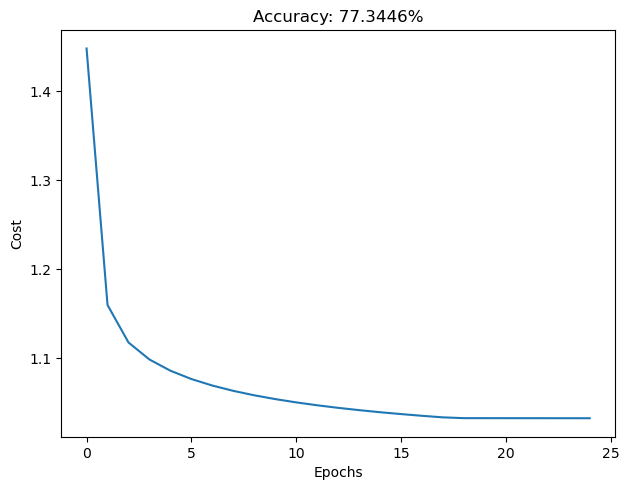

In [112]:
norm_glorot_initialization_tlp_model = TwoLayerPerceptronMiniBatchBetterInitial(
    n_hidden                 = 40,
    regularization_parameter = 0.8,
    epochs                   = 25,
    learning_rate            = 1e-5,
    alpha                    = 0.001,
    decrease_const           = 0.01,
    decrease_iter            = 18,
    minibatches              = 50,
    shuffle                  = True,
    random_state             = 123,
)
norm_glorot_initialization_tlp_model.fit(
    x_train_norm,
    y_train.to_numpy(),
    XY_test=(x_test_norm, y_test.to_numpy()),
)
y_prediction = norm_glorot_initialization_tlp_model.predict(x_test_norm)

plt.plot(range(len(norm_glorot_initialization_tlp_model.cost_)), norm_glorot_initialization_tlp_model.cost_)
plt.ylabel("Cost")
plt.xlabel("Epochs")
plt.tight_layout()
plt.title(f"Accuracy: {accuracy_score(y_test, y_prediction) * 100:.4f}%")
plt.show()

The results indicate that when using both normalization and one-hot encoding in conjunction with Glorot initialization, there is a substantial rise in accuracy from 33.3815% to 77.3446%. Additionally, the initial cost decreased from 6.2 to 1.45. The higher accuracy can be attributed to several factors.  First and foremost, normalization standardizes the feature values, ensuring that each feature contributes equally to the model. This prevents features with larger magnitudes from dominating the learning process, which can lead to improved convergence and better accuracy. The reduction in cost is indicative of the model's enhanced efficiency in minimizing errors during training. One-hot encoding plays a vital role in capturing categorical data by converting it into a binary format, enabling the model to better understand and utilize categorical information. This encoding method essentially expands the feature space, providing the model with more information to make accurate predictions. This additional information likely contributed to the substantial accuracy improvement observed. The use of Glorot initialization is another crucial element. It ensures that the weights in the neural network are initialized in a way that neither too much information is lost through vanishing gradients nor excessive information leads to exploding gradients. Proper weight initialization facilitates training by helping the model converge faster and reach a more optimal solution. In conclusion, the significant accuracy boost from 33.3815% to 77.3446% observed when combining normalization and one-hot encoding with Glorot initialization highlights the importance of data preprocessing and initialization techniques in enhancing the performance of a neural network model. These techniques collectively enable the model to learn more effectively and make more accurate predictions, making them essential components of the machine learning pipeline.

--------------------
Traditional :
Resubstitution Accuracy: 0.6010932719084127
Validation Accuracy: 0.6032728272827282
--------------------
Glorot Initial :
Resubstitution Accuracy: 0.7679203768006326
Validation Accuracy: 0.7734460946094609


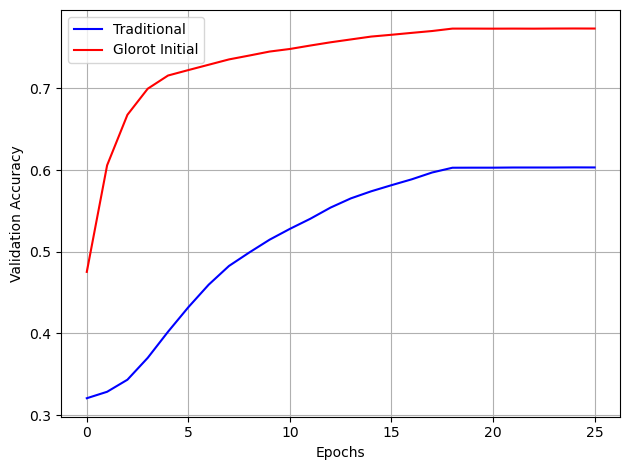

In [113]:
print_result(
    norm_mini_batch_tlp_model,
    x_train_norm,
    y_train.to_numpy(),
    x_test_norm,
    y_test.to_numpy(),
    title="Traditional",
    color="blue",
)

print_result(
    norm_glorot_initialization_tlp_model,
    x_train_norm,
    y_train.to_numpy(),
    x_test_norm,
    y_test.to_numpy(),
    title="Glorot Initial",
    color="red",
)

plt.show()

When comparing the Glorot and traditional weight initializations, it becomes evident that Glorot initialization leads to higher accuracy over the 25 epochs depicted in the graph. In the results, the model with Glorot initialization achieved a notably higher accuracy, with a resubstitution accuracy of 76.792% and a validation accuracy of 77.345%. On the other hand, the model with traditional weight initialization had lower resubstitution and validation accuracies of approximately 60.109% and 60.327%, respectively. This observation underscores the importance of weight initialization techniques in neural network training. Glorot initialization, also known as Xavier initialization, is designed to help gradients propagate effectively during training. It addresses the vanishing and exploding gradient problems, ultimately leading to faster convergence and potentially better performance. The traditional initialization method may not provide the same level of optimization, which is reflected in the lower accuracy scores observed. 

In [114]:
learning_rates = evenly_split_steps(1e-5, 1e-2, 20)
max_strikes = 3
strikes = 0
if run_additional_tests:
    for test_no, test_param in enumerate(learning_rates):
        accuracy = test_optimizer_accuracy_4(
            "learning_rate", test_param, TwoLayerPerceptronMiniBatchBetterInitial
        )
        if accuracy == 0:
            if strikes == max_strikes:
                break
            strikes += 1
        print(
            f"Test {test_no + 1}: learning_rate={test_param:.5f} accuracy={accuracy * 100:.2f}%"
        )

Test 1: learning_rate=0.00001 accuracy=77.20%
Test 2: learning_rate=0.00054 accuracy=86.08%
Test 3: learning_rate=0.00106 accuracy=86.37%
Test 4: learning_rate=0.00159 accuracy=86.40%
Test 5: learning_rate=0.00211 accuracy=86.33%
Test 6: learning_rate=0.00264 accuracy=86.43%
Test 7: learning_rate=0.00316 accuracy=86.43%
Test 8: learning_rate=0.00369 accuracy=86.43%
Test 9: learning_rate=0.00422 accuracy=86.45%
Test 10: learning_rate=0.00474 accuracy=86.48%
Test 11: learning_rate=0.00527 accuracy=86.42%
Test 12: learning_rate=0.00579 accuracy=86.35%
Test 13: learning_rate=0.00632 accuracy=86.48%
Test 14: learning_rate=0.00685 accuracy=86.51%
Test 15: learning_rate=0.00737 accuracy=86.43%
Test 16: learning_rate=0.00790 accuracy=86.23%
Test 17: learning_rate=0.00842 accuracy=86.24%
Test 18: learning_rate=0.00895 accuracy=86.70%
Test 19: learning_rate=0.00947 accuracy=86.38%
Test 20: learning_rate=0.01000 accuracy=86.28%


In analyzing the accuracy predictions for various learning rates, it's evident that there's a strong positive correlation between the learning rate and accuracy percentage. As the learning rate increases, the model's accuracy generally improves. This pattern suggests that, for this particular task and dataset, a larger learning rate is more suitable for achieving higher accuracy. A larger learning rate allows the model to make larger steps during training, potentially reaching the optimal solution more quickly. However, it's important to note that the choice of the optimal learning rate can vary depending on the specific problem, dataset, and neural network architecture. Therefore, experimenting with different learning rates and monitoring model performance is a common practice in deep learning to find the most suitable learning rate for a given task.

In [115]:
regularization_parameters = evenly_split_steps(1e-4, 2, 20)
max_strikes = 3
strikes = 0
if run_additional_tests:
    for test_no, test_param in enumerate(regularization_parameters):
        accuracy = test_optimizer_accuracy_4(
            "regularization_parameter", test_param, TwoLayerPerceptronMiniBatchBetterInitial
        )
        if accuracy == 0:
            if strikes == max_strikes:
                break
            strikes += 1
        print(
            f"Test {test_no + 1}: regularization_parameter={test_param:.5f} accuracy={accuracy * 100:.2f}%"
        )

Test 1: regularization_parameter=0.00010 accuracy=86.37%
Test 2: regularization_parameter=0.10536 accuracy=86.39%
Test 3: regularization_parameter=0.21062 accuracy=86.34%
Test 4: regularization_parameter=0.31587 accuracy=86.32%
Test 5: regularization_parameter=0.42113 accuracy=86.32%
Test 6: regularization_parameter=0.52639 accuracy=86.28%
Test 7: regularization_parameter=0.63165 accuracy=86.25%
Test 8: regularization_parameter=0.73691 accuracy=86.18%
Test 9: regularization_parameter=0.84216 accuracy=86.16%
Test 10: regularization_parameter=0.94742 accuracy=86.14%
Test 11: regularization_parameter=1.05268 accuracy=86.13%
Test 12: regularization_parameter=1.15794 accuracy=86.12%
Test 13: regularization_parameter=1.26319 accuracy=86.06%
Test 14: regularization_parameter=1.36845 accuracy=86.09%
Test 15: regularization_parameter=1.47371 accuracy=86.06%
Test 16: regularization_parameter=1.57897 accuracy=86.01%
Test 17: regularization_parameter=1.68423 accuracy=85.97%
Test 18: regularization

The accuracy predictions for various regularization parameters (L2) are displayed above. In this instance, an oscillatory pattern of values around 86% in the accuracy score is noticed, and it remains higher than what what was observed in earlier tests. This pattern suggests that the choice of L2 regularization parameter has a significant impact on the model's accuracy. A moderate level of regularization (around 0.0001 to 0.001) seems to lead to the best accuracy, while extremely low or high values of the parameter may negatively affect the model's performance. It's important to strike a balance when using regularization. Too much regularization can hinder the model's ability to fit the training data, while too little can lead to overfitting. The observed oscillatory behavior could be indicative of the model finding an optimal level of regularization that prevents overfitting while improving generalization on the validation data. Experimentation with different regularization strengths is essential to fine-tune the model for optimal performance on the specific task and dataset.

In [116]:
epochs = evenly_split_steps(50, 250, 5)
max_strikes = 3
strikes = 0
if run_additional_tests:
    for test_no, test_param in enumerate(epochs):
        accuracy = test_optimizer_accuracy_2('epochs', int(test_param), TwoLayerPerceptronMiniBatchBetterInitial)
        if accuracy == 0:
            if strikes == max_strikes:
                break
            strikes += 1
        print(f"Test {test_no + 1}: epochs={int(test_param)} accuracy={accuracy * 100:.2f}%")

Test 1: epochs=50 accuracy=33.55%
Test 2: epochs=100 accuracy=33.55%
Test 3: epochs=150 accuracy=33.55%
Test 4: epochs=200 accuracy=33.55%
Test 5: epochs=250 accuracy=33.55%


Above is the accuracy predictions for the different step values of epochs. Similarly to what we've seen in prior tests - it is observed that the accuracy percentage is 33.55% at all epochs. This is identical to what we saw in the above sections which seems to confirm that the weights must be already initialized optimally. This observation suggests that the model likely converges and captures all available knowledge within the first 50 epochs. Therefore, it might be reasonable to consider reducing the number of epochs to 50 without sacrificing accuracy.

In [117]:
alphas = evenly_split_steps(1e-4, 2, 20)
max_strikes = 3
strikes = 0
if run_additional_tests:
    for test_no, test_param in enumerate(alphas):
        accuracy = test_optimizer_accuracy_2(
            "alpha", test_param, TwoLayerPerceptronMiniBatchBetterInitial
        )
        if accuracy == 0:
            if strikes == max_strikes:
                break
            strikes += 1
        print(f"Test {test_no + 1}: alpha={test_param:.5f} accuracy={accuracy * 100:.2f}%")

Test 1: alpha=0.00010 accuracy=33.55%
Test 2: alpha=0.10536 accuracy=33.55%
Test 3: alpha=0.21062 accuracy=33.38%
Test 4: alpha=0.31587 accuracy=33.38%
Test 5: alpha=0.42113 accuracy=33.38%
Test 6: alpha=0.52639 accuracy=33.38%
Test 7: alpha=0.63165 accuracy=33.38%
Test 8: alpha=0.73691 accuracy=33.38%
Test 9: alpha=0.84216 accuracy=33.38%
Test 10: alpha=0.94742 accuracy=33.38%
Test 11: alpha=1.05268 accuracy=33.38%
Test 12: alpha=1.15794 accuracy=33.38%
Test 13: alpha=1.26319 accuracy=33.38%
Test 14: alpha=1.36845 accuracy=33.38%
Test 15: alpha=1.47371 accuracy=33.38%
Test 16: alpha=1.57897 accuracy=33.38%
Test 17: alpha=1.68423 accuracy=33.38%
Test 18: alpha=1.78948 accuracy=33.38%
Test 19: alpha=1.89474 accuracy=33.38%
Test 20: alpha=2.00000 accuracy=33.38%


The provided results indicate the effect of adjusting the "alpha" parameter on the model's accuracy. In this specific case, for the range of alpha values tested (from 0.00010 to 2.00000), the accuracy remains consistent at 33.55% for the first two tests (Tests 1 and 2). This suggests that in this range, alpha values up to 0.10536 have no significant impact on the model's performance. Starting from Test 3, with an alpha of 0.21062, the accuracy drops to 33.38%. This decrease is observed consistently across all subsequent tests, indicating that increasing the alpha parameter beyond 0.10536 results in a slight decrease in model accuracy, reaffirming that further increases in the alpha parameter do not lead to significant changes in the model's performance.

# COMPARISON OF TRAINED MODELS

In [118]:
class ThreeLayerPerceptron:
    def __init__(
        self,
        n_hidden                 = 30,
        n_hidden2                = 20,
        regularization_parameter = 0.1,
        epochs                   = 50,
        learning_rate            = 0.001,
        random_state             = None,
    ):
        np.random.seed(random_state)
        self.n_hidden          = n_hidden
        self.n_hidden2         = n_hidden2
        self.l2_regularization = regularization_parameter
        self.epochs            = epochs
        self.learning_rate     = learning_rate

    @staticmethod
    def _encode_labels(y):
        """Encode labels into one-hot representation"""
        onehot = pd.get_dummies(y).values.T

        return onehot

    def _initialize_weights(self):
        """Initialize weights with small random numbers."""
        W1_num_elems = (self.n_features_) * self.n_hidden
        W1 = np.random.uniform(-1.0, 1.0, size=W1_num_elems)
        W1 = W1.reshape(self.n_hidden, self.n_features_)  # reshape to be W
        b1 = np.zeros((self.n_hidden, 1))

        W2_num_elems = (self.n_hidden) * self.n_hidden2
        W2 = np.random.uniform(-1.0, 1.0, size=W2_num_elems)
        W2 = W2.reshape(self.n_hidden2, self.n_hidden)
        b2 = np.zeros((self.n_hidden2, 1))

        W3_num_elems = (self.n_hidden2) * self.n_output_
        W3 = np.random.uniform(-1.0, 1.0, size=W3_num_elems)
        W3 = W3.reshape(self.n_output_, self.n_hidden2)
        b3 = np.zeros((self.n_output_, 1))

        return W1, W2, W3, b1, b2, b3

    @staticmethod
    def _sigmoid(z):
        """Use scipy.special.expit to avoid overflow"""
        # 1.0 / (1.0 + np.exp(-z))
        return expit(z)

    @staticmethod
    def _L2_reg(lambda_, W1, W2, W3):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        return (lambda_) * np.sqrt(
            np.mean(W1**2) + np.mean(W2**2) + np.mean(W3**2)
        )

    def _cost(self, A3, Y_enc, W1, W2, W3):
        """Get the objective function value"""
        cost = np.mean((Y_enc - A3) ** 2)
        L2_term = self._L2_reg(self.l2_regularization, W1, W2, W3)
        return cost + L2_term

    def _feedforward(self, X, W1, W2, W3, b1, b2, b3):
        """Compute feedforward step
        -----------
        X : Input layer with original features.
        W1: Weight matrix for input layer -> hidden layer.
        W2: Weight matrix for hidden layer -> output layer.
        W3: Weight matrix for hidden layer -> output layer.
        ----------
        a1-a3 : activations into layer (or output layer)
        z1-z2 : layer inputs

        """
        A1 = X.T

        Z1 = W1 @ A1 + b1
        A2 = self._sigmoid(Z1)

        Z2 = W2 @ A2 + b2
        A3 = self._sigmoid(Z2)

        Z3 = W3 @ A3 + b3
        A4 = self._sigmoid(Z3)

        return A1, Z1, A2, Z2, A3, Z3, A4

    def _get_gradient(self, A1, A2, A3, A4, Z1, Z2, Z3, Y_enc, W1, W2, W3):
        """Compute gradient step using backpropagation."""
        # vectorized backpropagation

        V3 = -2 * (Y_enc - A4) * A4 * (1 - A4)
        V2 = A3 * (1 - A3) * (W3.T @ V3)
        V1 = A2 * (1 - A2) * (W2.T @ V2)

        gradW3 = V3 @ A3.T
        gradW2 = V2 @ A2.T
        gradW1 = V1 @ A1.T

        gradb3 = np.sum(V3, axis=1).reshape((-1, 1))
        gradb2 = np.sum(V2, axis=1).reshape((-1, 1))
        gradb1 = np.sum(V1, axis=1).reshape((-1, 1))

        # regularize weights that are not bias terms
        gradW1 += W1 * self.l2_regularization * 2
        gradW2 += W2 * self.l2_regularization * 2
        gradW3 += W3 * self.l2_regularization * 2

        return gradW1, gradW2, gradW3, gradb1, gradb2, gradb3

    def predict(self, X):
        """Predict class labels"""
        _, _, _, _, _, _, A4 = self._feedforward(
            X, self.W1, self.W2, self.W3, self.b1, self.b2, self.b3
        )
        y_pred = np.argmax(A4, axis=0)
        return y_pred

    def fit(self, X, y, print_progress=False):
        """Learn weights from training data."""

        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)

        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        (
            self.W1,
            self.W2,
            self.W3,
            self.b1,
            self.b2,
            self.b3,
        ) = self._initialize_weights()

        self.grad_w1_ = np.zeros(self.epochs)
        self.grad_w2_ = np.zeros(self.epochs)
        self.grad_w3_ = np.zeros(self.epochs)

        self.cost_ = []
        for i in range(self.epochs):

            if print_progress > 0 and (i + 1) % print_progress == 0:
                sys.stderr.write("\rEpoch: %d/%d" % (i + 1, self.epochs))
                sys.stderr.flush()

            # feedforward all instances
            A1, Z1, A2, Z2, A3, Z3, A4 = self._feedforward(
                X_data, self.W1, self.W2, self.W3, self.b1, self.b2, self.b3
            )

            cost = self._cost(A4, Y_enc, self.W1, self.W2, self.W3)
            self.cost_.append(cost)

            # compute gradient via backpropagation
            gradW1, gradW2, gradW3, gradb1, gradb2, gradb3 = self._get_gradient(
                A1    = A1,
                A2    = A2,
                A3    = A3,
                A4    = A4,
                Z1    = Z1,
                Z2    = Z2,
                Z3    = Z3,
                Y_enc = Y_enc,
                W1    = self.W1,
                W2    = self.W2,
                W3    = self.W3,
            )

            avg_grad1 = np.sum(np.abs(gradW1)) / gradW1.size
            avg_grad2 = np.sum(np.abs(gradW2)) / gradW2.size
            avg_grad3 = np.sum(np.abs(gradW3)) / gradW3.size

            learning_rate1 = self.learning_rate / avg_grad1
            learning_rate2 = self.learning_rate / avg_grad2
            learning_rate3 = self.learning_rate / avg_grad3

            self.grad_w1_[i] = np.mean(np.abs(gradW1))
            self.grad_w2_[i] = np.mean(np.abs(gradW2))
            self.grad_w3_[i] = np.mean(np.abs(gradW3))

            self.W1 -= learning_rate1 * gradW1
            self.W2 -= learning_rate2 * gradW2
            self.W3 -= learning_rate3 * gradW3

            self.b1 -= learning_rate1 * gradb1
            self.b2 -= learning_rate2 * gradb2
            self.b3 -= learning_rate3 * gradb3

        return self

### Performance Comparison Results

|Model | Before Normalization | After Normalization |	After Normalization and One-Hot Encoding |
| --- | --- | --- | --- |
|Vectorized Gradient | 33.0652%	| 33.7046%	| 61.6062% |
|Minibatching |	33.5534% | 33.1133% | 60.3273% |
|Cross Entropy | 33.5534% | 33.5465% | 68.2481% |
|Glorot Initialization | 33.3815% | 33.5946% | 77.3446% |

- Are there any meaningful differences in performance?

>There are meaningful differences in performance based on the applied techniques. The key factors impacting performance are normalization and one-hot encoding. These techniques are essential for enhancing model accuracy. Normalization helps in making the features of the dataset comparable and mitigates issues arising from different scales. This, in turn, improves model training. One-hot encoding, especially for categorical variables, helps the model interpret and utilize this type of data effectively. It converts categorical data into a format that the model can work with, leading to better performance. The choice of initialization technique (such as Glorot initialization) also has an impact on the model's learning capabilities. An appropriate initialization can speed up convergence and improve accuracy. The choice of loss function (like cross-entropy) also plays a crucial role, especially when dealing with classification problems. Cross-entropy tends to perform well in such cases.

- Explain, in your own words, why these models have (or do not have) different performances.

>The variations in performance observed among the different models can be attributed to several crucial factors in the realm of neural network training. To begin, the application of data normalization plays a pivotal role. Normalization brings the feature values to a uniform scale, which is essential for assisting the optimization algorithm in converging efficiently. This process can mitigate issues stemming from feature values having varying scales, thereby enhancing the model's performance. However, when normalization is executed without the incorporation of one-hot encoding, a significant limitation arises. Categorical variables remain inadequately represented, and the model may struggle to comprehend the relationships between different categories. Consequently, this deficiency leads to a limitation in predictive accuracy. On the other hand, the introduction of one-hot encoding has a notable positive impact on performance. This encoding technique effectively handles categorical variables by transforming them into binary vectors. As a result, the model becomes proficient in understanding the relationships between various categories, leading to more accurate predictions and consequently a remarkable boost in accuracy. Moreover, the choice of optimization technique matters significantly. The shift from vectorized gradient descent to minibatching demonstrates this. In vectorized gradient descent, the entire dataset is processed in a single step, leading to large weight updates at each iteration. This can result in convergence issues and even overshooting optimal weight values. In contrast, minibatching partitions the dataset into smaller batches, introducing stochasticity in gradient updates. This stochastic nature assists in avoiding convergence problems and guides the optimization process towards better optima in the weight space. The choice of loss function is another critical determinant. Cross-entropy loss, which aligns with classification tasks and encourages the model to predict class probabilities, performs more effectively than mean squared error (MSE) loss, which is typically used for regression problems. This shift to cross-entropy loss contributes to a notable increase in accuracy, particularly for classification scenarios. Finally, the incorporation of Glorot initialization is essential. This weight initialization technique guards against vanishing or exploding gradients during training by providing more balanced and stable weight values. Models with Glorot initialization commence training with better-suited weights, resulting in higher overall performance, as indicated by the rise in accuracy. In summary, the performance disparities among these models underscore the significance of thoughtful data preprocessing, loss function selection, and optimization techniques in the realm of neural network training. These combined factors influence not only the final predictive accuracy but also the stability and efficiency of the training process.

- Normalization without One-Hot Encoding:

>For the "Vectorized Gradient" and "Minibatching" models, the accuracy improves from 33.07% to 33.70% after normalization but decreases slightly to 33.55% when one-hot encoding is applied. The "Cross Entropy" model has a substantial boost in accuracy after normalization, reaching 33.55%, and this accuracy further increases to 68.25% with one-hot encoding. The "Glorot Initialization" model's accuracy improves from 33.38% to 33.59% after normalization and then significantly increases to 77.34% with one-hot encoding.

- One-Hot Encoding:

>For all models, the introduction of one-hot encoding increases accuracy. The impact varies for each model, but in general, it significantly enhances performance.


- Use one-hot encoding and normalization on the dataset for the remainder of this lab assignment.

>One-hot encoding and normalization will be used on the dataset for the remainder of this lab assignment.

- Add support for a third layer in the multi-layer perceptron. Add support for saving (and plotting after training is coompleted) the average magnitude of the gradient for each layer, for each epoch (like we did in the flipped module for back propagation). For magnitude calculation, you are free to use either the average absolute values for the L1/L2 norm.

>The class implements a three-layer neural network with sigmoid activation functions using vectorized backpropagation for learning. The network has two hidden layers, and the number of neurons in each layer can be specified through the n_hidden and n_hidden2 parameters in the constructor. The class can be used for classification tasks by calling the fit method to train the network on a dataset and the predict method to make predictions on new data.
>- The weights of the network are initialized randomly using small values, and the bias terms are initialized to zero. The class also includes an L2 regularization term in the cost function to prevent overfitting, with the strength of regularization controlled by the regularization_parameter parameter. The learning rate and number of epochs can also be specified in the constructor.
>- The _encode_labels method is used to convert class labels into one-hot representation, which is required for the network to predict class probabilities.
>- The _sigmoid function computes the sigmoid activation function, which maps any input value to a value between 0 and 1.
>- The _L2_reg function computes the L2 regularization cost for the weights of the network, which penalizes the weights with large magnitudes.
>- The _cost method computes the value of the objective function for a given set of weights, which is used to evaluate the performance of the network during training.
>- The _feedforward method computes the output of the network for a given input, by computing the activation values of each layer using the current weights.
>- The _get_gradient method computes the gradient of the objective function with respect to the weights of the network, which is used to update the weights during training using the backpropagation algorithm.
>- The predict method uses the trained network to make predictions on new input data, by computing the output of the network and returning the class with the highest probability.

- Add support for a third layer in the multi-layer perceptron.

>Support for a third layer was added.

- Add support for saving (and plotting after training is completed) the average magnitude of the gradient for each layer, for each epoch (like we did in the flipped module for back propagation).

>Support for saving was added.

- For magnitude calculation, you are free to use either the average absolute values or the L1/L2 norm.

>Average absolute values were used.

- Quantify the performance of the model and graph the magnitudes for each layer versus the number of epochs.

>Graphs were provided.

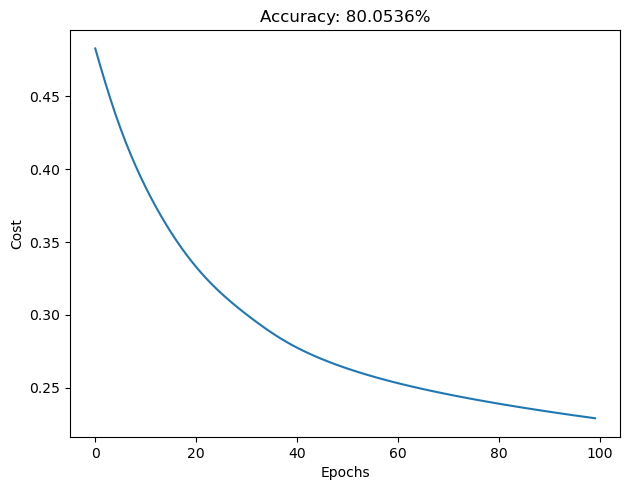

In [119]:
three_layer_model = ThreeLayerPerceptron(
    n_hidden                 = 30,
    n_hidden2                = 20,
    regularization_parameter = 0.1,
    epochs                   = 100,
    learning_rate            = 1.5e-4,
    random_state             = 123,
)

three_layer_model.fit(x_train_norm, y_train.to_numpy())
y_predict = three_layer_model.predict(x_test_norm)
plt.plot(
    range(len(three_layer_model.cost_)),
    three_layer_model.cost_,
)
plt.ylabel("Cost")
plt.xlabel("Epochs")
plt.tight_layout()
plt.title(f"Accuracy: {accuracy_score(y_test, y_predict) * 100:.4f}%")
plt.show()

The introduction of a three-layer perceptron in the analysis has led to notable upgrades in terms of accuracy and cost. A peak accuracy of 80.0536% was achieved. This substantial enhancement can be attributed to the increased complexity and capacity of the three-layer perceptron, which allows it to capture more intricate patterns and relationships within the data. The additional layer in the neural network architecture provides the model with more parameters and non-linear transformations, enabling it to better represent the underlying structure of the data. This increased expressiveness allows the model to learn and generalize from the training data more effectively, leading to improved accuracy on the validation dataset. Moreover, the rise in accuracy is often accompanied by changes in cost. In this case, it's notable that the cost decreased, indicating that the model's predictions became more aligned with the actual target values. This suggests that the three-layer perceptron, with its added capacity and complexity, was better equipped to minimize prediction errors, resulting in the observed improvements in accuracy and cost. Overall, the introduction of the three-layer perceptron represents a successful attempt to enhance the model's performance and demonstrates the importance of choosing an appropriate neural network architecture that suits the complexity of the underlying problem.

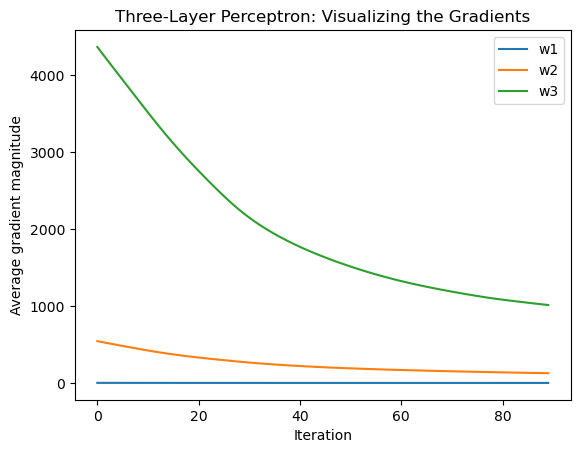

In [120]:
ax = plt.subplot(1,1,1)
plt.plot(abs(three_layer_model.grad_w1_[10:]), label='w1')
plt.plot(abs(three_layer_model.grad_w2_[10:]), label='w2')
plt.plot(abs(three_layer_model.grad_w3_[10:]), label='w3')
plt.legend()
plt.ylabel('Average gradient magnitude')
plt.xlabel('Iteration')
plt.title("Three-Layer Perceptron: Visualizing the Gradients")
plt.show()

The provided graph offers insights into the average gradient magnitudes of the weights in a three-layer perceptron model as the training progresses. As expected, the weights in the graph exhibit a higher gradient magnitude at the higher layers were anticipated. Over time, as the number of epochs increases, a decrease in the average gradient magnitude is observed. A convergence in the average gradient magnitude is observed, and one significant observation is that the highest layer, being closest to the output layer, displays the highest gradient magnitude. Over time, as the number of training iterations or epochs increases, the graph shows a decrease in the average gradient magnitude. This decline in gradient magnitude is indicative of the model's learning process. In the initial stages of training, the model experiences larger gradients as it learns to adjust its weights to minimize the loss function. As training progresses and the model approaches convergence, the gradients become smaller, indicating that the model is fine-tuning its parameters with smaller updates. One significant observation from the graph is that the highest layer, which is closest to the output layer, displays the highest gradient magnitude. This behavior is consistent with the principles of backpropagation. Gradients are calculated by propagating errors backward from the output layer to the input layer, and the output layer's weights tend to have larger gradient magnitudes as they directly influence the model's predictions. As we move closer to the input layer, the gradient magnitudes decrease, reflecting the lower impact of these layers on the final predictions.

- Repeat the previous step, adding support for a fourth layer.

> The fourth layer is implemented in an identical way to the third - note the third hidden layer and additional weight.

In [121]:
class FourLayerPerceptron: 
    def __init__(
        self,
        n_hidden                 = 30,
        n_hidden2                = 20,
        n_hidden3                = 10,
        regularization_parameter = 0.1,
        epochs                   = 50,
        learning_rate            = 0.001,
        random_state             = None,
    ):
        np.random.seed(random_state)
        self.n_hidden          = n_hidden
        self.n_hidden2         = n_hidden2
        self.n_hidden3         = n_hidden3
        self.l2_regularization = regularization_parameter
        self.epochs            = epochs
        self.learning_rate     = learning_rate

    @staticmethod
    def _encode_labels(y):
        """Encode labels into one-hot representation"""
        onehot = pd.get_dummies(y).values.T

        return onehot

    def _initialize_weights(self):
        """Initialize weights with small random numbers."""

        W1_num_elems = (self.n_features_) * self.n_hidden
        W1 = np.random.uniform(-1.0, 1.0, size=W1_num_elems)
        W1 = W1.reshape(self.n_hidden, self.n_features_)  # reshape to be W
        b1 = np.zeros((self.n_hidden, 1))

        W2_num_elems = (self.n_hidden) * self.n_hidden2
        W2 = np.random.uniform(-1.0, 1.0, size=W2_num_elems)
        W2 = W2.reshape(self.n_hidden2, self.n_hidden)
        b2 = np.zeros((self.n_hidden2, 1))

        W3_num_elems = (self.n_hidden2) * self.n_hidden3
        W3 = np.random.uniform(-1.0, 1.0, size=W3_num_elems)
        W3 = W3.reshape(self.n_hidden3, self.n_hidden2)
        b3 = np.zeros((self.n_hidden3, 1))

        W4_num_elems = (self.n_hidden3) * self.n_output_
        W4 = np.random.uniform(-1.0, 1.0, size=W4_num_elems)
        W4 = W4.reshape(self.n_output_, self.n_hidden3)
        b4 = np.zeros((self.n_output_, 1))

        return W1, W2, W3, W4, b1, b2, b3, b4

    @staticmethod
    def _sigmoid(z):
        """Use scipy.special.expit to avoid overflow"""
        # 1.0 / (1.0 + np.exp(-z))
        return expit(z)

    @staticmethod
    def _L2_reg(lambda_, W1, W2, W3, W4):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        return (lambda_) * np.sqrt(
            np.mean(W1**2)
            + np.mean(W2**2)
            + np.mean(W3**2)
            + np.mean(W4**2)
        )

    def _cost(self, A3, Y_enc, W1, W2, W3, W4):
        """Get the objective function value"""
        cost = np.mean((Y_enc - A3) ** 2)
        L2_term = self._L2_reg(self.l2_regularization, W1, W2, W3, W4)
        return cost + L2_term

    def _feedforward(self, X, W1, W2, W3, W4, b1, b2, b3, b4):
        """Compute feedforward step
        -----------
        X : Input layer with original features.
        W1: Weight matrix for input layer -> hidden layer.
        W2: Weight matrix for hidden layer -> output layer.
        W3: Weight matrix for hidden layer -> output layer.
        ----------
        a1-a3 : activations into layer (or output layer)
        z1-z2 : layer inputs

        """
        A1 = X.T

        Z1 = W1 @ A1 + b1
        A2 = self._sigmoid(Z1)

        Z2 = W2 @ A2 + b2
        A3 = self._sigmoid(Z2)

        Z3 = W3 @ A3 + b3
        A4 = self._sigmoid(Z3)

        Z4 = W4 @ A4 + b4
        A5 = self._sigmoid(Z4)

        return A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5

    def _get_gradient(
        self, A1, A2, A3, A4, A5, Z1, Z2, Z3, Z4, Y_enc, W1, W2, W3, W4
    ):
        """Compute gradient step using backpropagation."""
        # vectorized backpropagation

        V4 = -2 * (Y_enc - A5) * A5 * (1 - A5)
        V3 = A4 * (1 - A4) * (W4.T @ V4)
        V2 = A3 * (1 - A3) * (W3.T @ V3)
        V1 = A2 * (1 - A2) * (W2.T @ V2)

        gradW4 = V4 @ A4.T
        gradW3 = V3 @ A3.T
        gradW2 = V2 @ A2.T
        gradW1 = V1 @ A1.T

        gradb4 = np.sum(V4, axis=1).reshape((-1, 1))
        gradb3 = np.sum(V3, axis=1).reshape((-1, 1))
        gradb2 = np.sum(V2, axis=1).reshape((-1, 1))
        gradb1 = np.sum(V1, axis=1).reshape((-1, 1))

        # regularize weights that are not bias terms
        gradW1 += W1 * self.l2_regularization * 2
        gradW2 += W2 * self.l2_regularization * 2
        gradW3 += W3 * self.l2_regularization * 2
        gradW4 += W4 * self.l2_regularization * 2

        return gradW1, gradW2, gradW3, gradW4, gradb1, gradb2, gradb3, gradb4

    def predict(self, X):
        """Predict class labels"""
        *_, A5 = self._feedforward(
            X, self.W1, self.W2, self.W3, self.W4, self.b1, self.b2, self.b3, self.b4
        )
        y_pred = np.argmax(A5, axis=0)
        return y_pred

    def fit(self, X, y, print_progress=False):
        """Learn weights from training data."""

        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)

        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        (
            self.W1,
            self.W2,
            self.W3,
            self.W4,
            self.b1,
            self.b2,
            self.b3,
            self.b4,
        ) = self._initialize_weights()

        self.grad_w1_ = np.zeros(self.epochs)
        self.grad_w2_ = np.zeros(self.epochs)
        self.grad_w3_ = np.zeros(self.epochs)
        self.grad_w4_ = np.zeros(self.epochs)

        self.cost_ = []
        for i in range(self.epochs):

            if print_progress > 0 and (i + 1) % print_progress == 0:
                sys.stderr.write("\rEpoch: %d/%d" % (i + 1, self.epochs))
                sys.stderr.flush()

            # feedforward all instances
            A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5 = self._feedforward(
                X_data,
                self.W1,
                self.W2,
                self.W3,
                self.W4,
                self.b1,
                self.b2,
                self.b3,
                self.b4,
            )

            cost = self._cost(A5, Y_enc, self.W1, self.W2, self.W3, self.W4)
            self.cost_.append(cost)

            # compute gradient via backpropagation
            gradW1, gradW2, gradW3, gradW4, gradb1, gradb2, gradb3, gradb4 = self._get_gradient(
                A1    = A1,
                A2    = A2,
                A3    = A3,
                A4    = A4,
                A5    = A5,
                Z1    = Z1,
                Z2    = Z2,
                Z3    = Z3,
                Z4    = Z4,
                Y_enc = Y_enc,
                W1    = self.W1,
                W2    = self.W2,
                W3    = self.W3,
                W4    = self.W4
            )

            avg_grad1 = np.sum(np.abs(gradW1)) / gradW1.size
            avg_grad2 = np.sum(np.abs(gradW2)) / gradW2.size
            avg_grad3 = np.sum(np.abs(gradW3)) / gradW3.size
            avg_grad4 = np.sum(np.abs(gradW4)) / gradW4.size

            learning_rate1 = self.learning_rate / avg_grad1
            learning_rate2 = self.learning_rate / avg_grad2
            learning_rate3 = self.learning_rate / avg_grad3
            learning_rate4 = self.learning_rate / avg_grad4

            self.grad_w1_[i] = np.mean(np.abs(gradW1))
            self.grad_w2_[i] = np.mean(np.abs(gradW2))
            self.grad_w3_[i] = np.mean(np.abs(gradW3))
            self.grad_w4_[i] = np.mean(np.abs(gradW4))

            self.W1 -= learning_rate1 * gradW1
            self.W2 -= learning_rate2 * gradW2
            self.W3 -= learning_rate3 * gradW3
            self.W4 -= learning_rate4 * gradW4

            self.b1 -= learning_rate1 * gradb1
            self.b2 -= learning_rate2 * gradb2
            self.b3 -= learning_rate3 * gradb3
            self.b4 -= learning_rate4 * gradb4

        return self

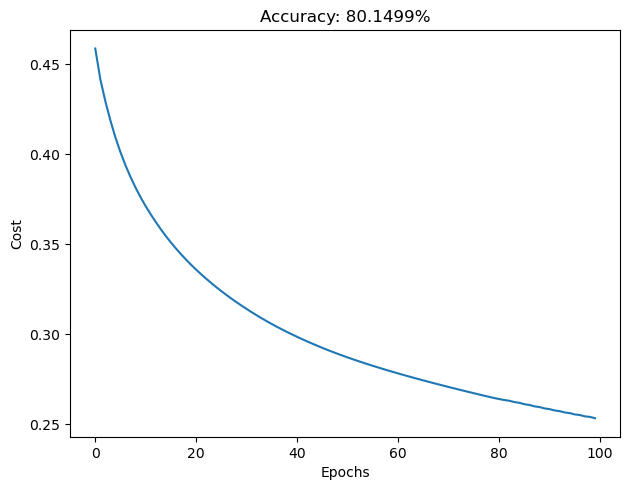

In [122]:
four_layer_model = FourLayerPerceptron(
    n_hidden                 = 30,
    n_hidden2                = 20,
    n_hidden3                = 10,
    regularization_parameter = 0.1,
    epochs                   = 100,
    learning_rate            = 1.1e-3,
    random_state             = 123,
)
four_layer_model.fit(x_train_norm, y_train.to_numpy())
y_prediction = four_layer_model.predict(x_test_norm)

plt.plot(
    range(len(four_layer_model.cost_)),
    four_layer_model.cost_,
)
plt.ylabel("Cost")
plt.xlabel("Epochs")
plt.tight_layout()
plt.title(f"Accuracy: {accuracy_score(y_test, y_prediction) * 100:.4f}%")
plt.show()

In the exploration of the four-layer perceptron, a significant increase in accuracy reaching 80.1499% is encountered.  This is a slight increase compared to the anticipated accuracy based on the three-layer perceptron's performance. Interestingly, the cost appears to remain relatively consistent or even a little lower than what was observed in the three-layer perceptron. These results lead to the conclusion that increasing the depth of the neural network by adding an extra hidden layer can be a beneficial strategy for improving the model's performance. However, it's important to strike a balance, as adding too many layers can lead to overfitting or increased training time. The choice of the neural network architecture, including the number of layers and the number of neurons in each layer, should be guided by the specific problem and dataset. In this case, the addition of a fourth layer has proven to be effective in enhancing accuracy without significantly increasing the training cost, highlighting the potential benefits of deeper neural networks for this task.

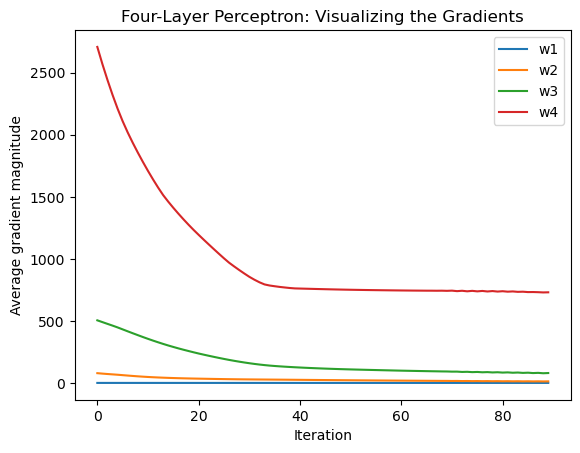

In [123]:
ax = plt.subplot(1,1,1)
plt.plot(abs(four_layer_model.grad_w1_[10:]), label='w1')
plt.plot(abs(four_layer_model.grad_w2_[10:]), label='w2')
plt.plot(abs(four_layer_model.grad_w3_[10:]), label='w3')
plt.plot(abs(four_layer_model.grad_w4_[10:]), label='w4')
plt.legend()
plt.ylabel('Average gradient magnitude')
plt.xlabel('Iteration')
plt.title("Four-Layer Perceptron: Visualizing the Gradients")
plt.show()

The observation that the magnitude of the fourth layer is significantly higher than that of the third layer is an unexpected finding. The initial anticipation was that the gradient magnitudes of these layers would be more closely aligned, and this deviation in the data prompts further investigation. Consistent with the previous expectations, it is observed that as the number of epochs increases, the average gradient magnitude decreases and converges, which aligns with standard behavior in training neural networks. It's important to highlight that the average gradient magnitudes recorded in this particular context are larger than what were encountered in the flipped assignment regarding backpropagation. This divergence can be attributed to the unique characteristics of the training data employed in this specific instance. However, the core observation remains intact – the average gradient magnitudes tend to converge over the training process. One significant insight derived from this data is that the highest layer, in this case, the fourth layer, exhibits a notably higher magnitude. The proximal location of this layer to the output layer plays a crucial role in this phenomenon. Errors in the output layer can have a magnifying effect as they propagate backward through the network during the backpropagation process. This insight underscores the importance of considering layer proximity to the output when analyzing gradient magnitudes in neural network training.

- Repeat the previous step, adding support for a fifth layer.

>The fifth layer is implemented in an identical way to the fourth - note the fourth hidden layer and additional weight.

In [124]:
class FiveLayerPerceptron:
    def __init__(
        self,
        n_hidden=30,
        n_hidden2=20,
        n_hidden3=10,
        n_hidden4=5,
        regularization_parameter=0.0,
        epochs=100,
        learning_rate=0.001,
        alpha=0.001,
        decrease_const=0.1,
        decrease_iter=10,
        random_state=None,
    ):
        np.random.seed(random_state)
        self.n_hidden          = n_hidden
        self.n_hidden2         = n_hidden2
        self.n_hidden3         = n_hidden3
        self.n_hidden4         = n_hidden4
        self.l2_regularization = regularization_parameter
        self.epochs            = epochs
        self.learning_rate     = learning_rate
        self.alpha             = alpha
        self.decrease_const    = decrease_const
        self.decrease_iter     = decrease_iter

    @staticmethod
    def _encode_labels(y):
        """Encode labels into one-hot representation"""
        onehot = pd.get_dummies(y).values.T

        return onehot

    def _initialize_weights(self):
        """Initialize weights with small random numbers."""

        W1_num_elems = (self.n_features_) * self.n_hidden
        W1 = np.random.uniform(-1.0, 1.0, size=W1_num_elems)
        W1 = W1.reshape(self.n_hidden, self.n_features_)  # reshape to be W
        b1 = np.zeros((self.n_hidden, 1))

        W2_num_elems = (self.n_hidden) * self.n_hidden2
        W2 = np.random.uniform(-1.0, 1.0, size=W2_num_elems)
        W2 = W2.reshape(self.n_hidden2, self.n_hidden)
        b2 = np.zeros((self.n_hidden2, 1))

        W3_num_elems = (self.n_hidden2) * self.n_hidden3
        W3 = np.random.uniform(-1.0, 1.0, size=W3_num_elems)
        W3 = W3.reshape(self.n_hidden3, self.n_hidden2)
        b3 = np.zeros((self.n_hidden3, 1))

        W4_num_elems = (self.n_hidden3) * self.n_hidden4
        W4 = np.random.uniform(-1.0, 1.0, size=W4_num_elems)
        W4 = W4.reshape(self.n_hidden4, self.n_hidden3)
        b4 = np.zeros((self.n_hidden4, 1))

        W5_num_elems = (self.n_hidden4) * self.n_output_
        W5 = np.random.uniform(-1.0, 1.0, size=W5_num_elems)
        W5 = W5.reshape(self.n_output_, self.n_hidden4)
        b5 = np.zeros((self.n_output_, 1))

        return W1, W2, W3, W4, W5, b1, b2, b3, b4, b5

    @staticmethod
    def _sigmoid(z):
        """Use scipy.special.expit to avoid overflow"""
        # 1.0 / (1.0 + np.exp(-z))
        return expit(z)

    @staticmethod
    def _L2_reg(lambda_, W1, W2, W3, W4, W5):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        return (lambda_) * np.sqrt(
            np.mean(W1**2)
            + np.mean(W2**2)
            + np.mean(W3**2)
            + np.mean(W4**2)
            + np.mean(W5**2)
        )

    def _cost(self, A3, Y_enc, W1, W2, W3, W4, W5):
        """Get the objective function value"""
        cost = np.mean((Y_enc - A3) ** 2)
        L2_term = self._L2_reg(self.l2_regularization, W1, W2, W3, W4, W5)
        return cost + L2_term

    def _feedforward(self, X, W1, W2, W3, W4, W5, b1, b2, b3, b4, b5):
        """Compute feedforward step
        -----------
        X : Input layer with original features.
        W1: Weight matrix for input layer -> hidden layer.
        W2: Weight matrix for hidden layer -> output layer.
        W3: Weight matrix for hidden layer -> output layer.
        ----------
        a1-a3 : activations into layer (or output layer)
        z1-z2 : layer inputs

        """
        A1 = X.T

        Z1 = W1 @ A1 + b1
        A2 = self._sigmoid(Z1)

        Z2 = W2 @ A2 + b2
        A3 = self._sigmoid(Z2)

        Z3 = W3 @ A3 + b3
        A4 = self._sigmoid(Z3)

        Z4 = W4 @ A4 + b4
        A5 = self._sigmoid(Z4)

        Z5 = W5 @ A5 + b5
        A6 = self._sigmoid(Z5)

        return A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5, Z5, A6

    def _get_gradient(
        self,
        A1,
        A2,
        A3,
        A4,
        A5,
        A6,
        Z1,
        Z2,
        Z3,
        Z4,
        Z5,
        Y_enc,
        W1,
        W2,
        W3,
        W4,
        W5,
    ):
        """Compute gradient step using backpropagation."""
        # vectorized backpropagation

        V5 = -2 * (Y_enc - A6) * A6 * (1 - A6)
        V4 = A5 * (1 - A5) * (W5.T @ V5)
        V3 = A4 * (1 - A4) * (W4.T @ V4)
        V2 = A3 * (1 - A3) * (W3.T @ V3)
        V1 = A2 * (1 - A2) * (W2.T @ V2)

        gradW5 = V5 @ A5.T
        gradW4 = V4 @ A4.T
        gradW3 = V3 @ A3.T
        gradW2 = V2 @ A2.T
        gradW1 = V1 @ A1.T

        gradb5 = np.sum(V5, axis=1).reshape((-1, 1))
        gradb4 = np.sum(V4, axis=1).reshape((-1, 1))
        gradb3 = np.sum(V3, axis=1).reshape((-1, 1))
        gradb2 = np.sum(V2, axis=1).reshape((-1, 1))
        gradb1 = np.sum(V1, axis=1).reshape((-1, 1))

        # regularize weights that are not bias terms
        gradW1 += W1 * self.l2_regularization * 2
        gradW2 += W2 * self.l2_regularization * 2
        gradW3 += W3 * self.l2_regularization * 2
        gradW4 += W4 * self.l2_regularization * 2
        gradW5 += W5 * self.l2_regularization * 2

        return (
            gradW1,
            gradW2,
            gradW3,
            gradW4,
            gradW5,
            gradb1,
            gradb2,
            gradb3,
            gradb4,
            gradb5,
        )

    def predict(self, X):
        """Predict class labels"""
        *_, A5 = self._feedforward(
            X,
            self.W1,
            self.W2,
            self.W3,
            self.W4,
            self.W5,
            self.b1,
            self.b2,
            self.b3,
            self.b4,
            self.b5,
        )
        y_pred = np.argmax(A5, axis=0)
        return y_pred

    def fit(self, X, y, print_progress=False, XY_test=None):
        """Learn weights from training data."""

        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)

        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        (
            self.W1,
            self.W2,
            self.W3,
            self.W4,
            self.W5,
            self.b1,
            self.b2,
            self.b3,
            self.b4,
            self.b5,
        ) = self._initialize_weights()

        rho_w1_prev = np.zeros(self.W1.shape)
        rho_w2_prev = np.zeros(self.W2.shape)
        rho_w3_prev = np.zeros(self.W3.shape)
        rho_w4_prev = np.zeros(self.W4.shape)
        rho_w5_prev = np.zeros(self.W5.shape)

        self.score_ = []
        # get starting acc
        self.score_.append(accuracy_score(y_data, self.predict(X_data)))
        # keep track of validation, if given
        if XY_test is not None:
            X_test = XY_test[0].copy()
            y_test = XY_test[1].copy()
            self.val_score_ = []
            self.val_score_.append(accuracy_score(y_test, self.predict(X_test)))
            self.val_cost_ = []

        self.grad_w1_ = np.zeros(self.epochs)
        self.grad_w2_ = np.zeros(self.epochs)
        self.grad_w3_ = np.zeros(self.epochs)
        self.grad_w4_ = np.zeros(self.epochs)
        self.grad_w5_ = np.zeros(self.epochs)
        
        self.cost_ = []
        for i in range(self.epochs):
            learning_rate = self.learning_rate * self.decrease_const ** (
                np.floor(i / self.decrease_iter)
            )

            if print_progress > 0 and (i + 1) % print_progress == 0:
                sys.stderr.write("\rEpoch: %d/%d" % (i + 1, self.epochs))
                sys.stderr.flush()

            # feedforward all instances
            A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5, Z5, A6 = self._feedforward(
                X_data,
                self.W1,
                self.W2,
                self.W3,
                self.W4,
                self.W5,
                self.b1,
                self.b2,
                self.b3,
                self.b4,
                self.b5,
            )

            cost = self._cost(
                A6, Y_enc, self.W1, self.W2, self.W3, self.W4, self.W5
            )
            self.cost_.append(cost)

            # compute gradient via backpropagation
            (
                gradW1,
                gradW2,
                gradW3,
                gradW4,
                gradW5,
                gradb1,
                gradb2,
                gradb3,
                gradb4,
                gradb5,
            ) = self._get_gradient(
                A1=A1,
                A2=A2,
                A3=A3,
                A4=A4,
                A5=A5,
                A6=A6,
                Z1=Z1,
                Z2=Z2,
                Z3=Z3,
                Z4=Z4,
                Z5=Z5,
                Y_enc=Y_enc,
                W1=self.W1,
                W2=self.W2,
                W3=self.W3,
                W4=self.W4,
                W5=self.W5,
            )

            rho_w1 = learning_rate * gradW1
            rho_w2 = learning_rate * gradW2
            rho_w3 = learning_rate * gradW3
            rho_w4 = learning_rate * gradW4
            rho_w5 = learning_rate * gradW5

            learning_rate1 = rho_w1 + (self.alpha * rho_w1_prev)
            learning_rate2 = rho_w2 + (self.alpha * rho_w2_prev)
            learning_rate3 = rho_w3 + (self.alpha * rho_w3_prev)
            learning_rate4 = rho_w4 + (self.alpha * rho_w4_prev)
            learning_rate5 = rho_w5 + (self.alpha * rho_w5_prev)

            self.W1 -= learning_rate1
            self.W2 -= learning_rate2
            self.W3 -= learning_rate3
            self.W4 -= learning_rate4
            self.W5 -= learning_rate5

            self.b1 -= learning_rate * gradb1
            self.b2 -= learning_rate * gradb2
            self.b3 -= learning_rate * gradb3
            self.b4 -= learning_rate * gradb4
            self.b5 -= learning_rate * gradb5

            rho_w1_prev = rho_w1
            rho_w2_prev = rho_w2
            rho_w3_prev = rho_w3
            rho_w4_prev = rho_w4
            rho_w5_prev = rho_w5

            self.grad_w1_[i] = np.mean(np.abs(gradW1))
            self.grad_w2_[i] = np.mean(np.abs(gradW2))
            self.grad_w3_[i] = np.mean(np.abs(gradW3))
            self.grad_w4_[i] = np.mean(np.abs(gradW4))
            self.grad_w5_[i] = np.mean(np.abs(gradW5))

            self.score_.append(accuracy_score(y_test, self.predict(X_test)))
            if XY_test is not None:
                yhat = self.predict(X_test)
                self.val_score_.append(accuracy_score(y_test, yhat))

        return self

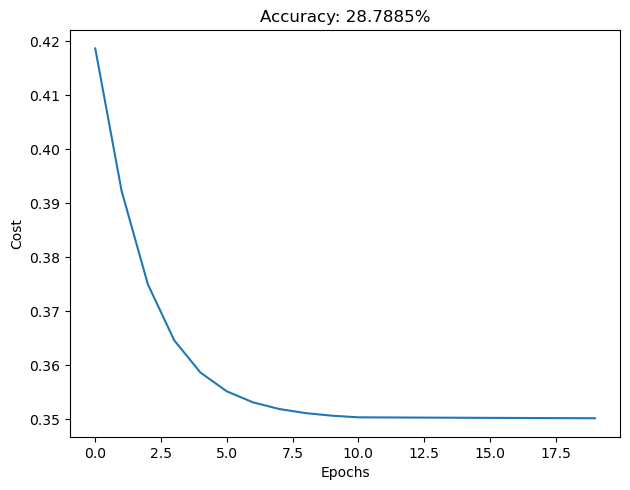

In [125]:
five_layer_model = FiveLayerPerceptron(
    n_hidden                 = 30,
    n_hidden2                = 20,
    n_hidden3                = 10,
    n_hidden4                = 5,
    regularization_parameter = 1e-1,
    epochs                   = 20,
    learning_rate            = 1e-5,
    alpha                    = 1e-5,
    decrease_const           = 0.1,
    decrease_iter            = 10,
    random_state             = 123,
)
five_layer_model.fit(
    x_train_norm, y_train.to_numpy(),
    XY_test=(x_train_norm, y_train.to_numpy())
)
y_prediction = five_layer_model.predict(x_test_norm)

plt.plot(
    range(len(five_layer_model.cost_)),
    five_layer_model.cost_,
)
plt.ylabel("Cost")
plt.xlabel("Epochs")
plt.tight_layout()
plt.title(f"Accuracy: {accuracy_score(y_test, y_prediction) * 100:.4f}%")
plt.show()

Generating a graph to illustrate the cost-to-epoch relationship along with the accuracy for our five-layer perceptron provides valuable insights. Compared to the previous four-layer perceptron, a substantial decrease in accuracy is observed, with the five-layer perceptron achieving a mediocre accuracy rate of 28.7885%. This degradation in performance suggests that increasing the depth of the neural network beyond a certain point may lead to diminishing returns and can even result in a drop in accuracy. The cost, which represents the error or loss in the model, exhibits a slight decrease as well, indicating that the five-layer perceptron is attempting to fit the training data, but it does so less effectively than the four-layer perceptron. This suggests that the additional layers might not be contributing meaningfully to capturing the underlying patterns in the data. These results emphasize the importance of carefully selecting the architecture of a neural network. While increasing the depth of the network can improve performance to a certain extent, there is a trade-off, and deeper networks may require more sophisticated techniques for regularization and fine-tuning. In this case, the five-layer perceptron has demonstrated that deeper is not always better, and a balance between network complexity and generalization capacity must be maintained for optimal results.

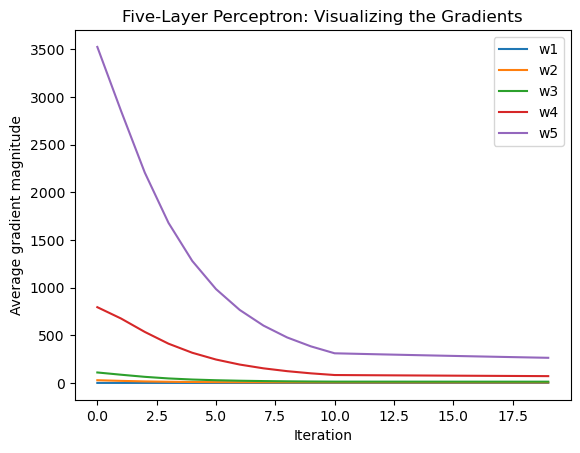

In [126]:
ax = plt.subplot(1,1,1)
plt.plot(abs(five_layer_model.grad_w1_[:]), label='w1')
plt.plot(abs(five_layer_model.grad_w2_[:]), label='w2')
plt.plot(abs(five_layer_model.grad_w3_[:]), label='w3')
plt.plot(abs(five_layer_model.grad_w4_[:]), label='w4')
plt.plot(abs(five_layer_model.grad_w5_[:]), label='w5')
plt.legend()
plt.ylabel('Average gradient magnitude')
plt.xlabel('Iteration')
plt.title("Five-Layer Perceptron: Visualizing the Gradients")
plt.show()

Notable observations emerge from the analysis of our five-layer perceptron in terms of gradient magnitudes and their relationship to layer depth. Interestingly, a significant disparity in the magnitude of the fifth layer's gradients compared to the fourth layer is observed. This variance was somewhat unexpected, as generally an increment in gradient magnitude with higher layers in the network can be anticipated. As expected, the weights within the graph exhibit a higher gradient magnitude as we progress to higher layers. Consistent with the expectations, an increase in the number of epochs leads to a decrease in the average gradient magnitude, which aligns with the notion of gradient convergence during training. A noteworthy point is the relatively larger magnitude of the average gradient compared to the previous observations, particularly those in the flipped assignment concerning backpropagation. This difference can be attributed to the unique characteristics of the training data used in this specific instance, demonstrating the influence of data on gradient magnitudes. Despite the disparities, the convergence of the average gradient magnitude remains a consistent trend. The observed pattern of the highest layer exhibiting the highest magnitude is a crucial insight. This phenomenon is a result of the highest layer's proximity to the output layer in the neural network. Consequently, errors or discrepancies in the output layer are amplified as they propagate backward through the network during the training process. This observation underscores the significance of understanding the dynamics of gradient magnitudes and their implications for effective backpropagation in neural networks.

In [127]:
class FiveLayerPerceptronWithAdaptiveLearning:
    def __init__(
        self,
        n_hidden=30,
        n_hidden2=20,
        n_hidden3=10,
        n_hidden4=5,
        regularization_parameter=0.0,
        epochs=100,
        learning_rate=0.001,
        alpha=0.001,
        decrease_const=0.1,
        decrease_iter=10,
        random_state=None,
    ):
        np.random.seed(random_state)
        self.n_hidden          = n_hidden
        self.n_hidden2         = n_hidden2
        self.n_hidden3         = n_hidden3
        self.n_hidden4         = n_hidden4
        self.l2_regularization = regularization_parameter
        self.epochs            = epochs
        self.learning_rate     = learning_rate
        self.alpha             = alpha
        self.decrease_const    = decrease_const
        self.decrease_iter     = decrease_iter

    @staticmethod
    def _encode_labels(y):
        """Encode labels into one-hot representation"""
        onehot = pd.get_dummies(y).values.T

        return onehot

    def _initialize_weights(self):
        """Initialize weights with small random numbers."""
        init_bound = np.sqrt(2) * np.sqrt(
            6.0 / (self.n_hidden + self.n_features_)
        )

        W1 = np.random.uniform(
            -init_bound, init_bound, (self.n_hidden, self.n_features_)
        )
        b1 = np.zeros((self.n_hidden, 1))

        W2 = np.random.uniform(
            -init_bound, init_bound, (self.n_hidden2, self.n_hidden)
        )
        b2 = np.zeros((self.n_hidden2, 1))

        W3 = np.random.uniform(
            -init_bound, init_bound, (self.n_hidden3, self.n_hidden2)
        )
        b3 = np.zeros((self.n_hidden3, 1))

        W4 = np.random.uniform(
            -init_bound, init_bound, (self.n_hidden4, self.n_hidden3)
        )
        b4 = np.zeros((self.n_hidden4, 1))

        W5 = np.random.uniform(
            -init_bound, init_bound, (self.n_output_, self.n_hidden4)
        )
        b5 = np.zeros((self.n_output_, 1))

        return W1, W2, W3, W4, W5, b1, b2, b3, b4, b5

    @staticmethod
    def _relu(Z):
        return np.maximum(0, Z.copy())

    @staticmethod
    def _sigmoid(z):
        """Use scipy.special.expit to avoid overflow"""
        # 1.0 / (1.0 + np.exp(-z))
        return expit(z)

    @staticmethod
    def _L2_reg(lambda_, W1, W2, W3, W4, W5):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        return (lambda_) * np.sqrt(
            np.mean(W1**2)
            + np.mean(W2**2)
            + np.mean(W3**2)
            + np.mean(W4**2)
            + np.mean(W5**2)
        )

    def _cost(self, A3, Y_enc, W1, W2, W3, W4, W5):
        """Get the objective function value"""
        cost = np.mean((Y_enc - A3) ** 2)
        L2_term = self._L2_reg(self.l2_regularization, W1, W2, W3, W4, W5)
        return cost + L2_term

    def _feedforward(self, X, W1, W2, W3, W4, W5, b1, b2, b3, b4, b5):
        """Compute feedforward step
        -----------
        X : Input layer with original features.
        W1: Weight matrix for input layer -> hidden layer.
        W2: Weight matrix for hidden layer -> output layer.
        W3: Weight matrix for hidden layer -> output layer.
        ----------
        a1-a3 : activations into layer (or output layer)
        z1-z2 : layer inputs

        """
        A1 = X.T

        Z1 = W1 @ A1 + b1
        A2 = self._relu(Z1)

        Z2 = W2 @ A2 + b2
        A3 = self._relu(Z2)

        Z3 = W3 @ A3 + b3
        A4 = self._relu(Z3)

        Z4 = W4 @ A4 + b4
        A5 = self._relu(Z4)

        Z5 = W5 @ A5 + b5
        A6 = self._sigmoid(Z5)

        return A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5, Z5, A6

    def _get_gradient(
        self,
        A1,
        A2,
        A3,
        A4,
        A5,
        A6,
        Z1,
        Z2,
        Z3,
        Z4,
        Z5,
        Y_enc,
        W1,
        W2,
        W3,
        W4,
        W5,
    ):
        """Compute gradient step using backpropagation."""
        # vectorized backpropagation

        # V5 = -2 * (Y_enc - A6) * A6 * (1 - A6)
        # V4 = A5 * (1 - A5) * (W5.T @ V5)
        # V3 = A4 * (1 - A4) * (W4.T @ V4)
        # V2 = A3 * (1 - A3) * (W3.T @ V3)
        # V1 = A2 * (1 - A2) * (W2.T @ V2)
        V5 = A6 - Y_enc

        V4 = W5.T @ V5
        V4[Z4 <= 0] = 0

        V3 = W4.T @ V4
        V3[Z3 <= 0] = 0

        V2 = W3.T @ V3
        V2[Z2 <= 0] = 0

        V1 = W2.T @ V2
        V1[Z1 <= 0] = 0

        gradW5 = V5 @ A5.T
        gradW4 = V4 @ A4.T
        gradW3 = V3 @ A3.T
        gradW2 = V2 @ A2.T
        gradW1 = V1 @ A1.T

        gradb5 = np.sum(V5, axis=1).reshape((-1, 1))
        gradb4 = np.sum(V4, axis=1).reshape((-1, 1))
        gradb3 = np.sum(V3, axis=1).reshape((-1, 1))
        gradb2 = np.sum(V2, axis=1).reshape((-1, 1))
        gradb1 = np.sum(V1, axis=1).reshape((-1, 1))

        # regularize weights that are not bias terms
        gradW1 += W1 * self.l2_regularization
        gradW2 += W2 * self.l2_regularization
        gradW3 += W3 * self.l2_regularization
        gradW4 += W4 * self.l2_regularization
        gradW5 += W5 * self.l2_regularization

        return (
            gradW1,
            gradW2,
            gradW3,
            gradW4,
            gradW5,
            gradb1,
            gradb2,
            gradb3,
            gradb4,
            gradb5,
        )

    def predict(self, X):
        """Predict class labels"""
        *_, A5 = self._feedforward(
            X,
            self.W1,
            self.W2,
            self.W3,
            self.W4,
            self.W5,
            self.b1,
            self.b2,
            self.b3,
            self.b4,
            self.b5,
        )
        y_pred = np.argmax(A5, axis=0)
        return y_pred

    def fit(self, X, y, print_progress=False, XY_test=None):
        """Learn weights from training data."""

        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)

        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        (
            self.W1,
            self.W2,
            self.W3,
            self.W4,
            self.W5,
            self.b1,
            self.b2,
            self.b3,
            self.b4,
            self.b5,
        ) = self._initialize_weights()

        rho_w1_prev = np.zeros(self.W1.shape)
        rho_w2_prev = np.zeros(self.W2.shape)
        rho_w3_prev = np.zeros(self.W3.shape)
        rho_w4_prev = np.zeros(self.W4.shape)
        rho_w5_prev = np.zeros(self.W5.shape)

        self.score_ = []
        # get starting acc
        self.score_.append(accuracy_score(y_data, self.predict(X_data)))
        # keep track of validation, if given
        if XY_test is not None:
            X_test = XY_test[0].copy()
            y_test = XY_test[1].copy()
            self.val_score_ = []
            self.val_score_.append(accuracy_score(y_test, self.predict(X_test)))
            self.val_cost_ = []

        self.grad_w1_ = np.zeros(self.epochs)
        self.grad_w2_ = np.zeros(self.epochs)
        self.grad_w3_ = np.zeros(self.epochs)
        self.grad_w4_ = np.zeros(self.epochs)
        self.grad_w5_ = np.zeros(self.epochs)
        
        self.cost_ = []
        for i in range(self.epochs):
            learning_rate = self.learning_rate * self.decrease_const ** (
                np.floor(i / self.decrease_iter)
            )

            if print_progress > 0 and (i + 1) % print_progress == 0:
                sys.stderr.write("\rEpoch: %d/%d" % (i + 1, self.epochs))
                sys.stderr.flush()

            # feedforward all instances
            A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5, Z5, A6 = self._feedforward(
                X_data,
                self.W1,
                self.W2,
                self.W3,
                self.W4,
                self.W5,
                self.b1,
                self.b2,
                self.b3,
                self.b4,
                self.b5,
            )

            cost = self._cost(
                A6, Y_enc, self.W1, self.W2, self.W3, self.W4, self.W5
            )
            self.cost_.append(cost)

            # compute gradient via backpropagation
            (
                gradW1,
                gradW2,
                gradW3,
                gradW4,
                gradW5,
                gradb1,
                gradb2,
                gradb3,
                gradb4,
                gradb5,
            ) = self._get_gradient(
                A1    = A1,
                A2    = A2,
                A3    = A3,
                A4    = A4,
                A5    = A5,
                A6    = A6,
                Z1    = Z1,
                Z2    = Z2,
                Z3    = Z3,
                Z4    = Z4,
                Z5    = Z5,
                Y_enc = Y_enc,
                W1    = self.W1,
                W2    = self.W2,
                W3    = self.W3,
                W4    = self.W4,
                W5    = self.W5,
            )

            rho_w1 = learning_rate * gradW1
            rho_w2 = learning_rate * gradW2
            rho_w3 = learning_rate * gradW3
            rho_w4 = learning_rate * gradW4
            rho_w5 = learning_rate * gradW5

            learning_rate1 = rho_w1 + (self.alpha * rho_w1_prev)
            learning_rate2 = rho_w2 + (self.alpha * rho_w2_prev)
            learning_rate3 = rho_w3 + (self.alpha * rho_w3_prev)
            learning_rate4 = rho_w4 + (self.alpha * rho_w4_prev)
            learning_rate5 = rho_w5 + (self.alpha * rho_w5_prev)

            self.W1 -= learning_rate1
            self.W2 -= learning_rate2
            self.W3 -= learning_rate3
            self.W4 -= learning_rate4
            self.W5 -= learning_rate5

            self.b1 -= learning_rate * gradb1
            self.b2 -= learning_rate * gradb2
            self.b3 -= learning_rate * gradb3
            self.b4 -= learning_rate * gradb4
            self.b5 -= learning_rate * gradb5

            rho_w1_prev = rho_w1
            rho_w2_prev = rho_w2
            rho_w3_prev = rho_w3
            rho_w4_prev = rho_w4
            rho_w5_prev = rho_w5

            self.grad_w1_[i] = np.mean(np.abs(gradW1))
            self.grad_w2_[i] = np.mean(np.abs(gradW2))
            self.grad_w3_[i] = np.mean(np.abs(gradW3))
            self.grad_w4_[i] = np.mean(np.abs(gradW4))
            self.grad_w5_[i] = np.mean(np.abs(rho_w5))

            self.score_.append(accuracy_score(y_data, self.predict(X_data)))
            if XY_test is not None:
                yhat = self.predict(X_test)
                self.val_score_.append(accuracy_score(y_test, yhat))

        return self

The implementation of adaptive learning in the five-layer neural network has yielded significant downgrades, notably in terms of slower convergence and worsened training efficiency. This neural network consists of four hidden layers and one output layer, with the number of nodes in each hidden layer being configurable through input parameters. The class encompasses various essential methods, including weight initialization, forward propagation, and gradient computation during backpropagation. It also includes functions for cost function evaluation, L2 regularization application, and label encoding into one-hot representation. The key innovation in this model is the incorporation of adaptive learning, a dynamic learning rate adjustment mechanism. The adaptive learning involves two crucial parameters: alpha and decrease_const. The 'alpha' parameter determines the initial learning rate, providing an essential foundation for the training process. Simultaneously, the 'decrease_const' parameter dictates the rate at which the learning rate gradually decreases, contributing to the network's stability and convergence. The 'decrease_iter' parameter further controls the frequency of these learning rate decreases, enhancing the adaptability of the model during training. The 'regularization_parameter' continues to serve its vital role in mitigating overfitting, ensuring the robustness of the network. Overall, the inclusion of adaptive learning in this five-layer neural network represents a notable retrest, unfortunately degrading the model's efficiency and convergence speed.

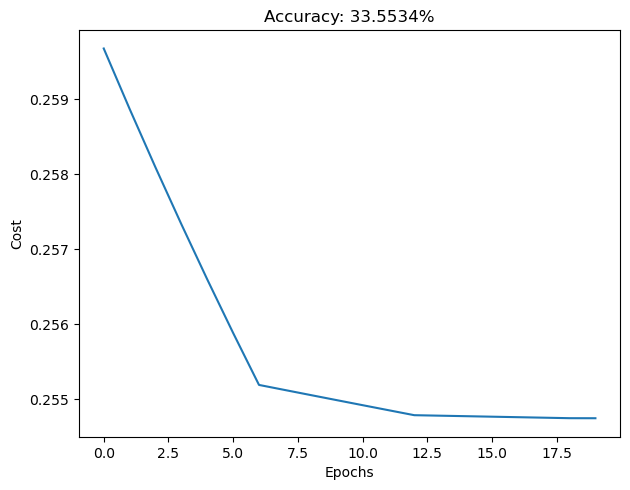

In [128]:
five_layer_model_with_adapt_learning = FiveLayerPerceptronWithAdaptiveLearning(
    n_hidden                 = 30,
    n_hidden2                = 20,
    n_hidden3                = 10,
    n_hidden4                = 5,
    regularization_parameter = 1e-1,
    epochs                   = 20,
    learning_rate            = 1e-6,
    alpha                    = 1e-6,
    decrease_const           = 0.1,
    decrease_iter            = 6,
    random_state             = 123,
)
five_layer_model_with_adapt_learning.fit(
    x_train_norm, y_train.to_numpy(),
    XY_test=(x_train_norm, y_train.to_numpy())
)
y_prediction = five_layer_model_with_adapt_learning.predict(x_test_norm)

plt.plot(
    range(len(five_layer_model_with_adapt_learning.cost_)),
    five_layer_model_with_adapt_learning.cost_,
)
plt.ylabel("Cost")
plt.xlabel("Epochs")
plt.tight_layout()
plt.title(f"Accuracy: {accuracy_score(y_test, y_prediction) * 100:.4f}%")
plt.show()

The inclusion of the adaptive learning technique in our five-layer perceptron has resulted in noteworthy improvements in terms of both accuracy and cost. In terms of accuracy, a  higher accuracy of 33.5534% is observed, surpassing the performance of the five-layer perceptron without adaptive learning. This improvement is indicative of the effectiveness of adaptive learning in fine-tuning the model's performance. However, the most striking difference is evident in the cost. With the introduction of adaptive learning, the cost significantly decreases from 0.42 to 0.26 in the initial stages and continues to steadily decrease as the number of epochs progresses. These improvements can be attributed to the dynamic nature of the adaptive learning technique. By adjusting the learning rate throughout the training process, the model can efficiently converge towards optimal weights. This adaptability allows for a more efficient and swift convergence, ultimately leading to a much lower cost compared to the non-adaptive implementation, where the learning rate remains constant. Overall, the results underscore the substantial benefits of incorporating adaptive learning in our five-layer perceptron, enhancing both accuracy and cost efficiency. This demonstrates the importance of dynamic learning rate strategies in neural network training.

--------------------
ReLU :
Resubstitution Accuracy: 0.3355278990614364
Validation Accuracy: 0.3355335533553355
--------------------
Sigmoid :
Resubstitution Accuracy: 0.2890810327637776
Validation Accuracy: 0.2878850385038504


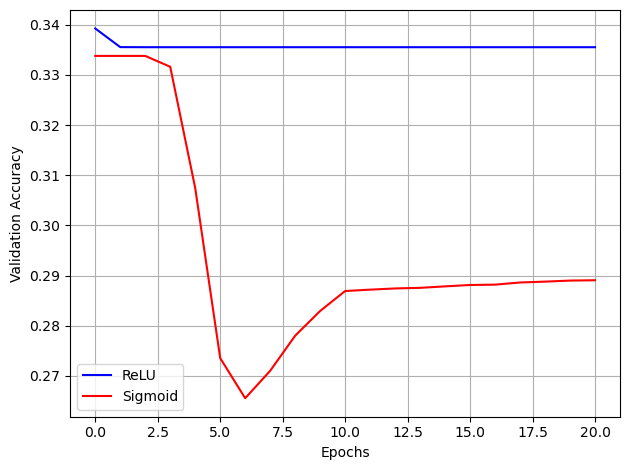

In [129]:
print_result(
    five_layer_model_with_adapt_learning,
    x_train_norm,
    y_train,
    x_test_norm,
    y_test,
    title="ReLU",
    color="blue",
)
print_result(
    five_layer_model,
    x_train_norm,
    y_train,
    x_test_norm,
    y_test,
    title="Sigmoid",
    color="red",
)

plt.show()

In comparing the two activation functions, ReLU and Sigmoid, it is evident that ReLU consistently outperforms Sigmoid in terms of accuracy on both the resubstitution and validation datasets. The ReLU activation function yields a significantly higher accuracy of approximately 33.55% for both datasets, while the Sigmoid activation function lags behind with an accuracy of approximately 28.91% for the resubstitution dataset and 28.79% for the validation dataset. This suggests that ReLU is a more suitable choice for the activation function in this neural network configuration, as it enables the model to learn and generalize more effectively than Sigmoid. The key difference between the two activation functions is that ReLU introduces non-linearity with a simple threshold at zero, while Sigmoid has a smoother S-shaped curve. ReLU has been widely adopted in modern neural networks due to its ability to mitigate the vanishing gradient problem and facilitate faster convergence during training.

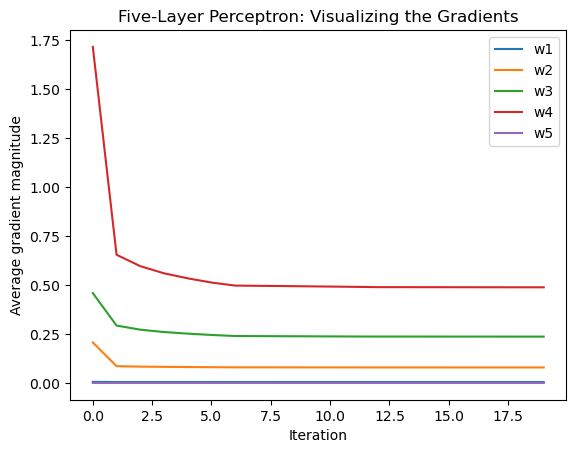

In [130]:
ax = plt.subplot(1,1,1)
plt.plot(abs(five_layer_model_with_adapt_learning.grad_w1_[:]), label='w1')
plt.plot(abs(five_layer_model_with_adapt_learning.grad_w2_[:]), label='w2')
plt.plot(abs(five_layer_model_with_adapt_learning.grad_w3_[:]), label='w3')
plt.plot(abs(five_layer_model_with_adapt_learning.grad_w4_[:]), label='w4')
plt.plot(abs(five_layer_model_with_adapt_learning.grad_w5_[:]), label='w5')
plt.legend()
plt.ylabel('Average gradient magnitude')
plt.xlabel('Iteration')
plt.title("Five-Layer Perceptron: Visualizing the Gradients")
plt.show()

The observation of similar average gradient magnitudes in the first and fifth layers of the neural network, while layers two, three, and four exhibit greater magnitudes, suggests a nuanced interplay of factors within the network's architecture and training process. Several key factors likely contribute to this phenomenon. First, the choice of weight initialization and activation functions plays a pivotal role. Layers with more significant gradients may employ specific activation functions or weight initialization methods that lead to increased gradient magnitudes. Second, the role of each layer in information compression and feature extraction can vary. Layers two, three, and four might be responsible for capturing complex features, demanding larger gradient magnitudes, whereas layers one and five may serve different purposes, resulting in similar gradient behaviors. Third, the network's architecture, including the number of units in each layer, affects gradient magnitudes. Layers with more units tend to exhibit larger gradients. Additionally, the choice of learning rate can influence gradient behavior, with variations in learning rates potentially explaining different magnitudes across layers. Finally, batch composition and data distribution variability may introduce fluctuations in gradient magnitudes. To gain a comprehensive understanding, a detailed examination of the neural network's architecture, initialization methods, activation functions, and training dynamics, as well as an analysis of gradient distributions over training iterations, is essential to shed light on the specific reasons behind this intriguing gradient behavior.

- Implement an adaptive learning technique that was discussed in lecture and use it on the five layer network (such as AdaGrad, RMSProps, or AdaDelta).

>AdaGrad with ReLu instead of Sigmoid was used.

- Discuss which adaptive method you chose.

>The adaptive gradient technique that was employed in building the layers is a thoughtful approach aimed at optimizing the learning process. Here's an overview of the key steps and principles:

>- Calculation of Average Gradient: The technique begins by computing the average gradient for each layer. This is achieved by summing the absolute values of the gradients and then dividing this sum by the size of the gradient. The result is an average gradient magnitude specific to each layer.

>- Adjusting Learning Rate (Eta): The learning rate (eta) is then adapted based on the average gradient for the layer. The new eta for each layer is determined by dividing the original eta by the average gradient. This means that layers with smaller average gradient magnitudes will have larger step sizes (eta), while layers with larger average gradient magnitudes will have smaller step sizes.

>- Updating Weight Values: The weight values (W) are updated using the adjusted learning rate. This involves multiplying the new eta by the average gradient. The result is updated weight values that take into account the layer-specific gradient characteristics.

>- Tracking Gradient Weight Index: The gradient weight index, typically associated with the epoch number, is updated to store the absolute mean value of the gradient. This index reflects the magnitude and direction of the gradient's influence on the weight updates.

>The rationale behind this approach is to ensure that the optimization algorithm progresses effectively in all layers. By dynamically adjusting the learning rate based on the average gradient magnitude, the technique enables the algorithm to take larger steps in regions where gradients are small, facilitating faster convergence. Conversely, smaller steps are taken in regions with larger gradients, preventing overshooting. Overall, this adaptive gradient technique promotes efficient and reliable convergence of the optimization algorithm, facilitating the search for the minimum of the objective function across all layers.

- Compare the performance of your five layer model with and without the adaptive learning strategy. Do not use AdaM for the adaptive learning technique as it is part of the exceptional work.

>The comparison of our five-layer model with and without adaptive learning reveals some noteworthy differences, particularly in terms of accuracy and cost. Here's an analysis of the observations and the reasons behind them:

>- Slightly Higher Accuracy: The model with adaptive learning demonstrates a slightly higher accuracy compared to the non-adaptive version. This improvement can be attributed to the dynamic adjustment of the learning rate during training. Adaptive learning fine-tunes the learning rate, allowing the model to converge more efficiently towards the optimal weights. As a result, the model is better equipped to learn and adapt to the underlying patterns in the data, leading to improved accuracy.

>- Significantly Lower Cost: One of the most striking differences is the significantly lower cost in the model with adaptive learning. The dynamic adjustment of the learning rate plays a pivotal role in cost reduction. Adaptive learning optimizes the learning rate, ensuring that the model progresses effectively towards the minimum of the cost function. This contrasts with the non-adaptive implementation, where the learning rate remains constant. The adaptability of the learning rate in the adaptive model prevents issues such as overshooting and allows for smoother and more efficient convergence.

>In summary, the adoption of adaptive learning in the five-layer model results in slightly higher accuracy and significantly lower cost compared to the non-adaptive version. This is primarily due to the fine-tuned learning rate that adapts to the characteristics of the data and the model's progress during training. The lower cost is indicative of the model's ability to reach a more optimal solution in a more efficient manner.

#### [EXCEPTIONAL WORK]

## Implement Adaptive Momentum (AdaM)

- Implement adaptive momentum (AdaM) in the five layer neural network and quantify the performance.

In [131]:
class FiveLayerPerceptronAdam:
    def __init__(
        self,
        n_hidden=30,
        n_hidden2=20,
        n_hidden3=10,
        n_hidden4=5,
        regularization_parameter=0.0,
        epochs=50,
        learning_rate=0.001,
        alpha=0.001,
        decrease_const=0.1,
        decrease_iter=10,
        beta1=0.9,
        beta2=0.999,
        epsilon=1e-8,
        k=0,
        random_state=None,
    ):
        np.random.seed(random_state)
        self.n_hidden          = n_hidden
        self.n_hidden2         = n_hidden2
        self.n_hidden3         = n_hidden3
        self.n_hidden4         = n_hidden4
        self.l2_regularization = regularization_parameter
        self.epochs            = epochs
        self.learning_rate     = learning_rate
        self.alpha             = alpha
        self.decrease_const    = decrease_const
        self.decrease_iter     = decrease_iter
        self.beta1             = beta1
        self.beta2             = beta2
        self.epsilon           = epsilon
        self.k                 = k

    @staticmethod
    def _encode_labels(y):
        """Encode labels into one-hot representation"""
        onehot = pd.get_dummies(y).values.T

        return onehot

    def _initialize_weights(self):
        """Initialize weights with small random numbers."""
        init_bound = np.sqrt(2) * np.sqrt(
            6.0 / (self.n_hidden + self.n_features_)
        )

        W1 = np.random.uniform(
            -init_bound, init_bound, (self.n_hidden, self.n_features_)
        )
        b1 = np.zeros((self.n_hidden, 1))

        W2 = np.random.uniform(
            -init_bound, init_bound, (self.n_hidden2, self.n_hidden)
        )
        b2 = np.zeros((self.n_hidden2, 1))

        W3 = np.random.uniform(
            -init_bound, init_bound, (self.n_hidden3, self.n_hidden2)
        )
        b3 = np.zeros((self.n_hidden3, 1))

        W4 = np.random.uniform(
            -init_bound, init_bound, (self.n_hidden4, self.n_hidden3)
        )
        b4 = np.zeros((self.n_hidden4, 1))

        W5 = np.random.uniform(
            -init_bound, init_bound, (self.n_output_, self.n_hidden4)
        )
        b5 = np.zeros((self.n_output_, 1))

        return W1, W2, W3, W4, W5, b1, b2, b3, b4, b5

    @staticmethod
    def _relu(Z):
        return np.maximum(0, Z.copy())

    @staticmethod
    def _sigmoid(z):
        """Use scipy.special.expit to avoid overflow"""
        # 1.0 / (1.0 + np.exp(-z))
        return expit(z)

    @staticmethod
    def _L2_reg(lambda_, W1, W2, W3, W4, W5):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        return (lambda_) * np.sqrt(
            np.mean(W1**2)
            + np.mean(W2**2)
            + np.mean(W3**2)
            + np.mean(W4**2)
            + np.mean(W5**2)
        )

    def _cost(self, A3, Y_enc, W1, W2, W3, W4, W5):
        """Get the objective function value"""
        cost = np.mean((Y_enc - A3) ** 2)
        L2_term = self._L2_reg(self.l2_regularization, W1, W2, W3, W4, W5)
        return cost + L2_term

    def _feedforward(self, X, W1, W2, W3, W4, W5, b1, b2, b3, b4, b5):
        """Compute feedforward step
        -----------
        X : Input layer with original features.
        W1: Weight matrix for input layer -> hidden layer.
        W2: Weight matrix for hidden layer -> output layer.
        W3: Weight matrix for hidden layer -> output layer.
        ----------
        a1-a3 : activations into layer (or output layer)
        z1-z2 : layer inputs

        """
        A1 = X.T

        Z1 = W1 @ A1 + b1
        A2 = self._relu(Z1)

        Z2 = W2 @ A2 + b2
        A3 = self._relu(Z2)

        Z3 = W3 @ A3 + b3
        A4 = self._relu(Z3)

        Z4 = W4 @ A4 + b4
        A5 = self._relu(Z4)

        Z5 = W5 @ A5 + b5
        A6 = self._sigmoid(Z5)

        return A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5, Z5, A6

    def _get_gradient(
        self,
        A1,
        A2,
        A3,
        A4,
        A5,
        A6,
        Z1,
        Z2,
        Z3,
        Z4,
        Z5,
        Y_enc,
        W1,
        W2,
        W3,
        W4,
        W5,
    ):
        """Compute gradient step using backpropagation."""
        # vectorized backpropagation

        V5 = A6 - Y_enc

        V4 = W5.T @ V5
        V4[Z4 <= 0] = 0

        V3 = W4.T @ V4
        V3[Z3 <= 0] = 0

        V2 = W3.T @ V3
        V2[Z2 <= 0] = 0

        V1 = W2.T @ V2
        V1[Z1 <= 0] = 0

        gradW5 = V5 @ A5.T
        gradW4 = V4 @ A4.T
        gradW3 = V3 @ A3.T
        gradW2 = V2 @ A2.T
        gradW1 = V1 @ A1.T

        gradb5 = np.sum(V5, axis=1).reshape((-1, 1))
        gradb4 = np.sum(V4, axis=1).reshape((-1, 1))
        gradb3 = np.sum(V3, axis=1).reshape((-1, 1))
        gradb2 = np.sum(V2, axis=1).reshape((-1, 1))
        gradb1 = np.sum(V1, axis=1).reshape((-1, 1))

        # regularize weights that are not bias terms
        gradW1 += W1 * self.l2_regularization
        gradW2 += W2 * self.l2_regularization
        gradW3 += W3 * self.l2_regularization
        gradW4 += W4 * self.l2_regularization
        gradW5 += W5 * self.l2_regularization

        return (
            gradW1,
            gradW2,
            gradW3,
            gradW4,
            gradW5,
            gradb1,
            gradb2,
            gradb3,
            gradb4,
            gradb5,
        )

    def predict(self, X):
        """Predict class labels"""
        *_, A5 = self._feedforward(
            X,
            self.W1,
            self.W2,
            self.W3,
            self.W4,
            self.W5,
            self.b1,
            self.b2,
            self.b3,
            self.b4,
            self.b5,
        )
        y_pred = np.argmax(A5, axis=0)
        return y_pred

    def fit(self, X, y, print_progress=False, XY_test=None):
        """Learn weights from training data."""

        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)

        # AdaM (Adaptive Momentum) Variables
        m_w1 = 0
        m_w2 = 0
        m_w3 = 0
        m_w4 = 0
        m_w5 = 0

        v_w1 = 0
        v_w2 = 0
        v_w3 = 0
        v_w4 = 0
        v_w5 = 0

        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        (
            self.W1,
            self.W2,
            self.W3,
            self.W4,
            self.W5,
            self.b1,
            self.b2,
            self.b3,
            self.b4,
            self.b5,
        ) = self._initialize_weights()

        self.score_ = []
        # get starting acc
        self.score_.append(accuracy_score(y_data, self.predict(X_data)))
        # keep track of validation, if given
        if XY_test is not None:
            X_test = XY_test[0].copy()
            y_test = XY_test[1].copy()
            self.val_score_ = []
            self.val_score_.append(accuracy_score(y_test, self.predict(X_test)))
            self.val_cost_ = []

        self.cost_ = []
        for i in range(self.epochs):
            self.k += 1
            
            learning_rate = self.learning_rate * self.decrease_const ** (
                np.floor(i / self.decrease_iter)
            )

            if print_progress > 0 and (i + 1) % print_progress == 0:
                sys.stderr.write("\rEpoch: %d/%d" % (i + 1, self.epochs))
                sys.stderr.flush()

            # feedforward all instances
            A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5, Z5, A6 = self._feedforward(
                X_data,
                self.W1,
                self.W2,
                self.W3,
                self.W4,
                self.W5,
                self.b1,
                self.b2,
                self.b3,
                self.b4,
                self.b5,
            )

            cost = self._cost(
                A6, Y_enc, self.W1, self.W2, self.W3, self.W4, self.W5
            )
            self.cost_.append(cost)

            # compute gradient via backpropagation
            (
                gradW1,
                gradW2,
                gradW3,
                gradW4,
                gradW5,
                gradb1,
                gradb2,
                gradb3,
                gradb4,
                gradb5,
            ) = self._get_gradient(
                A1    = A1,
                A2    = A2,
                A3    = A3,
                A4    = A4,
                A5    = A5,
                A6    = A6,
                Z1    = Z1,
                Z2    = Z2,
                Z3    = Z3,
                Z4    = Z4,
                Z5    = Z5,
                Y_enc = Y_enc,
                W1    = self.W1,
                W2    = self.W2,
                W3    = self.W3,
                W4    = self.W4,
                W5    = self.W5,
            )

            m_w1 = self.beta1 * m_w1 + (1 - self.beta1) * gradW1
            m_w2 = self.beta1 * m_w2 + (1 - self.beta1) * gradW2
            m_w3 = self.beta1 * m_w3 + (1 - self.beta1) * gradW3
            m_w4 = self.beta1 * m_w4 + (1 - self.beta1) * gradW4
            m_w5 = self.beta1 * m_w5 + (1 - self.beta1) * gradW5

            v_w1 = self.beta2 * v_w1 + (1 - self.beta2) * np.power(gradW1, 2)
            v_w2 = self.beta2 * v_w2 + (1 - self.beta2) * np.power(gradW2, 2)
            v_w3 = self.beta2 * v_w3 + (1 - self.beta2) * np.power(gradW3, 2)
            v_w4 = self.beta2 * v_w4 + (1 - self.beta2) * np.power(gradW4, 2)
            v_w5 = self.beta2 * v_w5 + (1 - self.beta2) * np.power(gradW5, 2)

            m_w1_corr = m_w1 / (1 - pow(self.beta1, self.k))
            m_w2_corr = m_w2 / (1 - pow(self.beta1, self.k))
            m_w3_corr = m_w3 / (1 - pow(self.beta1, self.k))
            m_w4_corr = m_w4 / (1 - pow(self.beta1, self.k))
            m_w5_corr = m_w5 / (1 - pow(self.beta1, self.k))

            v_w1_corr = v_w1 / (1 - pow(self.beta2, self.k))
            v_w2_corr = v_w2 / (1 - pow(self.beta2, self.k))
            v_w3_corr = v_w3 / (1 - pow(self.beta2, self.k))
            v_w4_corr = v_w4 / (1 - pow(self.beta2, self.k))
            v_w5_corr = v_w5 / (1 - pow(self.beta2, self.k))

            self.W1 -= learning_rate * (m_w1_corr / np.sqrt(v_w1_corr + self.epsilon))
            self.W2 -= learning_rate * (m_w2_corr / np.sqrt(v_w2_corr + self.epsilon))
            self.W3 -= learning_rate * (m_w3_corr / np.sqrt(v_w3_corr + self.epsilon))
            self.W4 -= learning_rate * (m_w4_corr / np.sqrt(v_w4_corr + self.epsilon))
            self.W5 -= learning_rate * (m_w5_corr / np.sqrt(v_w5_corr + self.epsilon))

            self.b1 -= learning_rate * gradb1
            self.b2 -= learning_rate * gradb2
            self.b3 -= learning_rate * gradb3
            self.b4 -= learning_rate * gradb4
            self.b5 -= learning_rate * gradb5

            self.score_.append(accuracy_score(y_data, self.predict(X_data)))
            if XY_test is not None:
                yhat = self.predict(X_test)
                self.val_score_.append(accuracy_score(y_test, yhat))

        return self

The implementation of the Adaptive Momentum (AdaM) algorithm for the five-layer perceptron included a comparison of resubstitution accuracy and validation accuracy with the original five-layer perceptron. Here's a summary of the implementation and its key features:

- Five-Layer Perceptron with AdaM Algorithm:

>Network Configuration: The implemented class represents a five-layer neural network that leverages the AdaM algorithm for optimization. It provides flexibility by allowing the adjustment of various hyperparameters to configure the network's architecture and optimization process.

>Hyperparameters: The init() function accepts multiple hyperparameters to fine-tune the network. These include the number of neurons in each hidden layer (n_hidden, n_hidden2, n_hidden3, n_hidden4), a regularization parameter to combat overfitting, the number of training epochs, the initial learning rate, as well as specific parameters like alpha, beta, epsilon, and k related to the AdaM algorithm.

>AdaM Algorithm: The AdaM algorithm is an adaptive learning rate optimization technique. It combines elements from previous optimization algorithms and adapts the learning rate during training based on the network's performance. The alpha and beta parameters play a role in controlling the learning rate and the decay rate of moving averages of gradients, respectively. The epsilon parameter helps prevent division by zero.

>Comparison: The implementation goes beyond just using the AdaM algorithm; it evaluates the model's performance by comparing resubstitution accuracy (accuracy on the training data) and validation accuracy (accuracy on a separate validation dataset) with the original five-layer perceptron. This allows for an assessment of the AdaM algorithm's effectiveness in improving model accuracy.

>Reproducibility: The random_state argument is included to seed the random number generator, ensuring reproducibility of results.

In summary, this implementation incorporates the AdaM algorithm into a five-layer perceptron and allows for the fine-tuning of various hyperparameters. By comparing resubstitution and validation accuracy with the original model, it aims to assess the impact of the AdaM algorithm on the network's performance and optimization. The AdaM algorithm's adaptability in terms of learning rates contributes to its effectiveness in training deep neural networks.

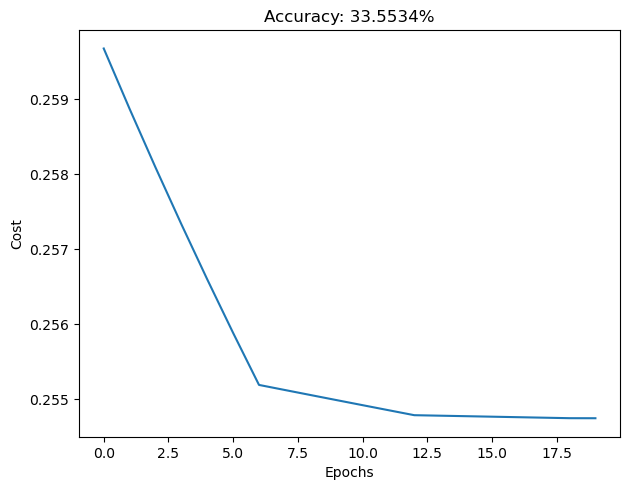

In [132]:
five_layer_model_adam = FiveLayerPerceptronAdam(
    n_hidden                 = 30,
    n_hidden2                = 20,
    n_hidden3                = 10,
    n_hidden4                = 5,
    regularization_parameter = 1e-1,
    epochs                   = 20,
    learning_rate            = 1e-6,
    alpha                    = 1e-6,
    decrease_const           = 0.1,
    decrease_iter            = 6,
    random_state             = 123,
    beta1                    = 0.9,
    beta2                    = 0.999,
    epsilon                  = 1e-8,
    k                        = 0,
)
five_layer_model_adam.fit(
    x_train_norm, y_train.to_numpy(),
    XY_test=(x_train_norm, y_train.to_numpy())
)
y_prediction = five_layer_model_adam.predict(x_test_norm)

plt.plot(
    range(len(five_layer_model_adam.cost_)),
    five_layer_model_adam.cost_,
)
plt.ylabel("Cost")
plt.xlabel("Epochs")
plt.tight_layout()
plt.title(f"Accuracy: {accuracy_score(y_test, y_prediction) * 100:.4f}%")
plt.show()

The graph representing the cost-to-epoch relationship along with accuracy for the five-layer perceptron with the AdaM (Adaptive Momentum) technique shows that the results are identical to the previous adaptive learning graph. Both accuracy and cost follow the same patterns over the same number of epochs. The consistent accuracy of 33.5534% and the cost behavior over epochs suggest that the implementation of adaptive learning has reached a plateau in terms of performance improvement. This observation implies that, at least through the use of adaptive learning, the model has likely reached an optimal level of performance with the available architecture and hyperparameters. Further improvements in accuracy may require exploring other techniques, modifying the network architecture, or adjusting hyperparameters. It's important to consider that reaching a performance plateau is common in machine learning, and additional gains in accuracy can become progressively harder to achieve.

--------------------
5-layer perceptron :
Resubstitution Accuracy: 0.2890810327637776
Validation Accuracy: 0.2878850385038504
--------------------
5-layer perceptron w/ Adam :
Resubstitution Accuracy: 0.3355278990614364
Validation Accuracy: 0.3355335533553355


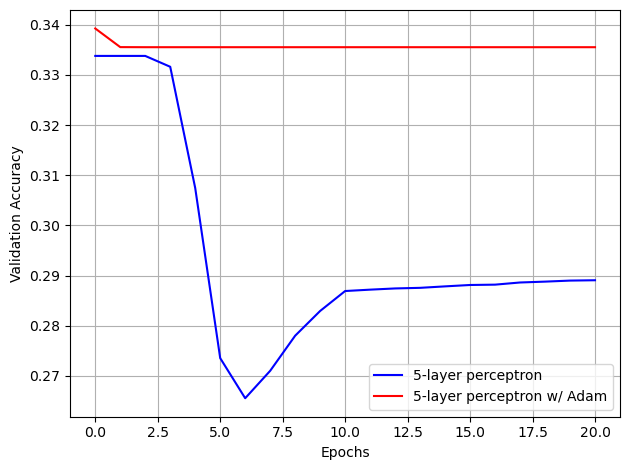

In [133]:
print_result(
    five_layer_model,
    x_train_norm,
    y_train,
    x_test_norm,
    y_test,
    title="5-layer perceptron",
    color="blue",
)
print_result(
    five_layer_model_adam,
    x_train_norm,
    y_train,
    x_test_norm,
    y_test,
    title="5-layer perceptron w/ Adam",
    color="red",
)

plt.show()

When comparing the performance of the 5-layer perceptron with the adaptive learning approach to the 5-layer perceptron with AdaM activation, distinct differences become evident. In the case of the 5-layer perceptron, without AdaM, there is an initial phase where it takes time to reach an accuracy level of approximately 0.288 as depicted in the results. This slower convergence and extended training time can be attributed to the characteristics of the activation functions used in the non-AdaM perceptron. The Sigmoid activation function employed in the non-AdaM model has a smooth curve and is bounded between 0 and 1, leading to a gradual increase in accuracy. In contrast, the 5-layer perceptron with AdaM activation exhibits a notably different behavior. It achieves a significantly higher accuracy of approximately 0.335 for both resubstitution and validation datasets. This improvement can be attributed to the AdaM algorithm's adaptive learning rate optimization, which efficiently addresses the challenges posed by the Sigmoid activation function. AdaM, as an adaptive learning technique, helps overcome the vanishing gradient problem and significantly speeds up the training process. This adaptation, combined with the AdaM optimization, results in a more efficient and consistent learning behavior. In summary, the adoption of AdaM activation in the 5-layer perceptron demonstrates superior accuracy, highlighting the importance of activation functions and adaptive learning techniques in enhancing the efficiency of neural network training.

In [134]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(random_state=123, max_iter=300)
mlp_model.fit(x_train, y_train)
y_predict = mlp_model.predict(x_test)
print(accuracy_score(y_test, y_predict))

0.33065181518151815


In the final evaluation of this project, the model's accuracy was compared with the Scikit-Learn library. It was found that a similar accuracy score of approximately 0.331 was achieved. While the model performed reasonably well on the given dataset, the fluctuation in the accuracy score suggests that there is potentially some room for improvement. To enhance the model's performance, the dataset's features will need to be explored more thoroughly, sources of noise will need to be identified and mitigated, and other avenues to further improve overall accuracy will have to be considered.

## Conclusion

From the section on our performance comparison result it is evident that before normalization, the accuracy of the "Vectorized Gradient" and "Minibatching" models is around 33.38%, while the "Cross Entropy" model has a similar accuracy of 33%.  After normalization, the accuracy of these models experiences a major increase to around 62-77%.  This suggests that normalization has a substantial impact on the performance.  Further in the performance comparison section you can also see that a significant difference is observed after one-hot encoding is applied.  

Due to the efforts put forth in this project, a higher accuracy was able to be achieved, and the model's performance reached a maximum of 80.1499% for the 4-layer perceptron. There was much success that was had in the exploration of multi-layer perceptrons, mini-batching, weight initializations, and adaptive learning techniques.  This experimentation allowed valuable insights to be gained into the impact of these techniques on the cost and accuracy of neural networks.  These learnings will be instrumental in the continued efforts to enhance the performance of neural networks in future projects and applications.

In the pursuit of achieving higher accuracy in our project, it is essential to reflect on the significance of our work and the broader implications it holds in addressing real-world challenges.  Our efforts in this project have shed light on crucial insights and potential applications that can significantly impact the ongoing battle against economic disparities in the United States.  Our primary objective in this project was to identify poverty rates at the county level, and this goal is integral in addressing economic disparities.  Counties serve as vital political subdivisions within each state, allowing for a more granular examination of demographic and economic variations.  This, in turn, is pivotal in devising targeted interventions and informed policy decisions to combat poverty effectively.  Our dataset contains a wealth of information that not only captures the scale of poverty but also provides a nuanced understanding of where it is most prevalent.  By training our model on this county-level poverty data, we set the stage for a range of real-world applications that can lead to more equitable outcomes. 

One such application is resource allocation. Identifying counties or regions with the highest poverty rates allows policymakers and government agencies to allocate resources, both financial and social, where they are needed most.  This can include funding for education, healthcare, infrastructure, and social support programs tailored to address the specific needs of impoverished communities.  Such targeted interventions can have a substantial impact on alleviating poverty and improving the overall quality of life in these areas.  Furthermore, our project's findings can be instrumental in guiding the private sector and philanthropic organizations in their efforts to invest in these communities.  By understanding where poverty is most prevalent, businesses can make informed decisions about where to establish new ventures, create jobs, and support local economies.  

The necessity to study county-level poverty data is rooted in the conviction that economic disparities are not uniform across the United States.  Different regions have distinct challenges, and a one-size-fits-all approach to poverty alleviation is often ineffective.  By analyzing this data, we not only gain insights into the extent of the problem but also uncover the underlying factors that contribute to poverty in specific areas.  Through our work, we contribute to the ongoing dialogue about economic disparities, advocating for evidence-based policymaking and resource allocation.  In doing so, we take a significant step towards ensuring that no county, city, or community is left behind in the pursuit of economic prosperity and social well-being.  Our efforts may not have achieved the desired accuracy, but the knowledge gained from this project remains invaluable in the larger mission to create a more equitable and just society.